# Performance trial Figure 4a

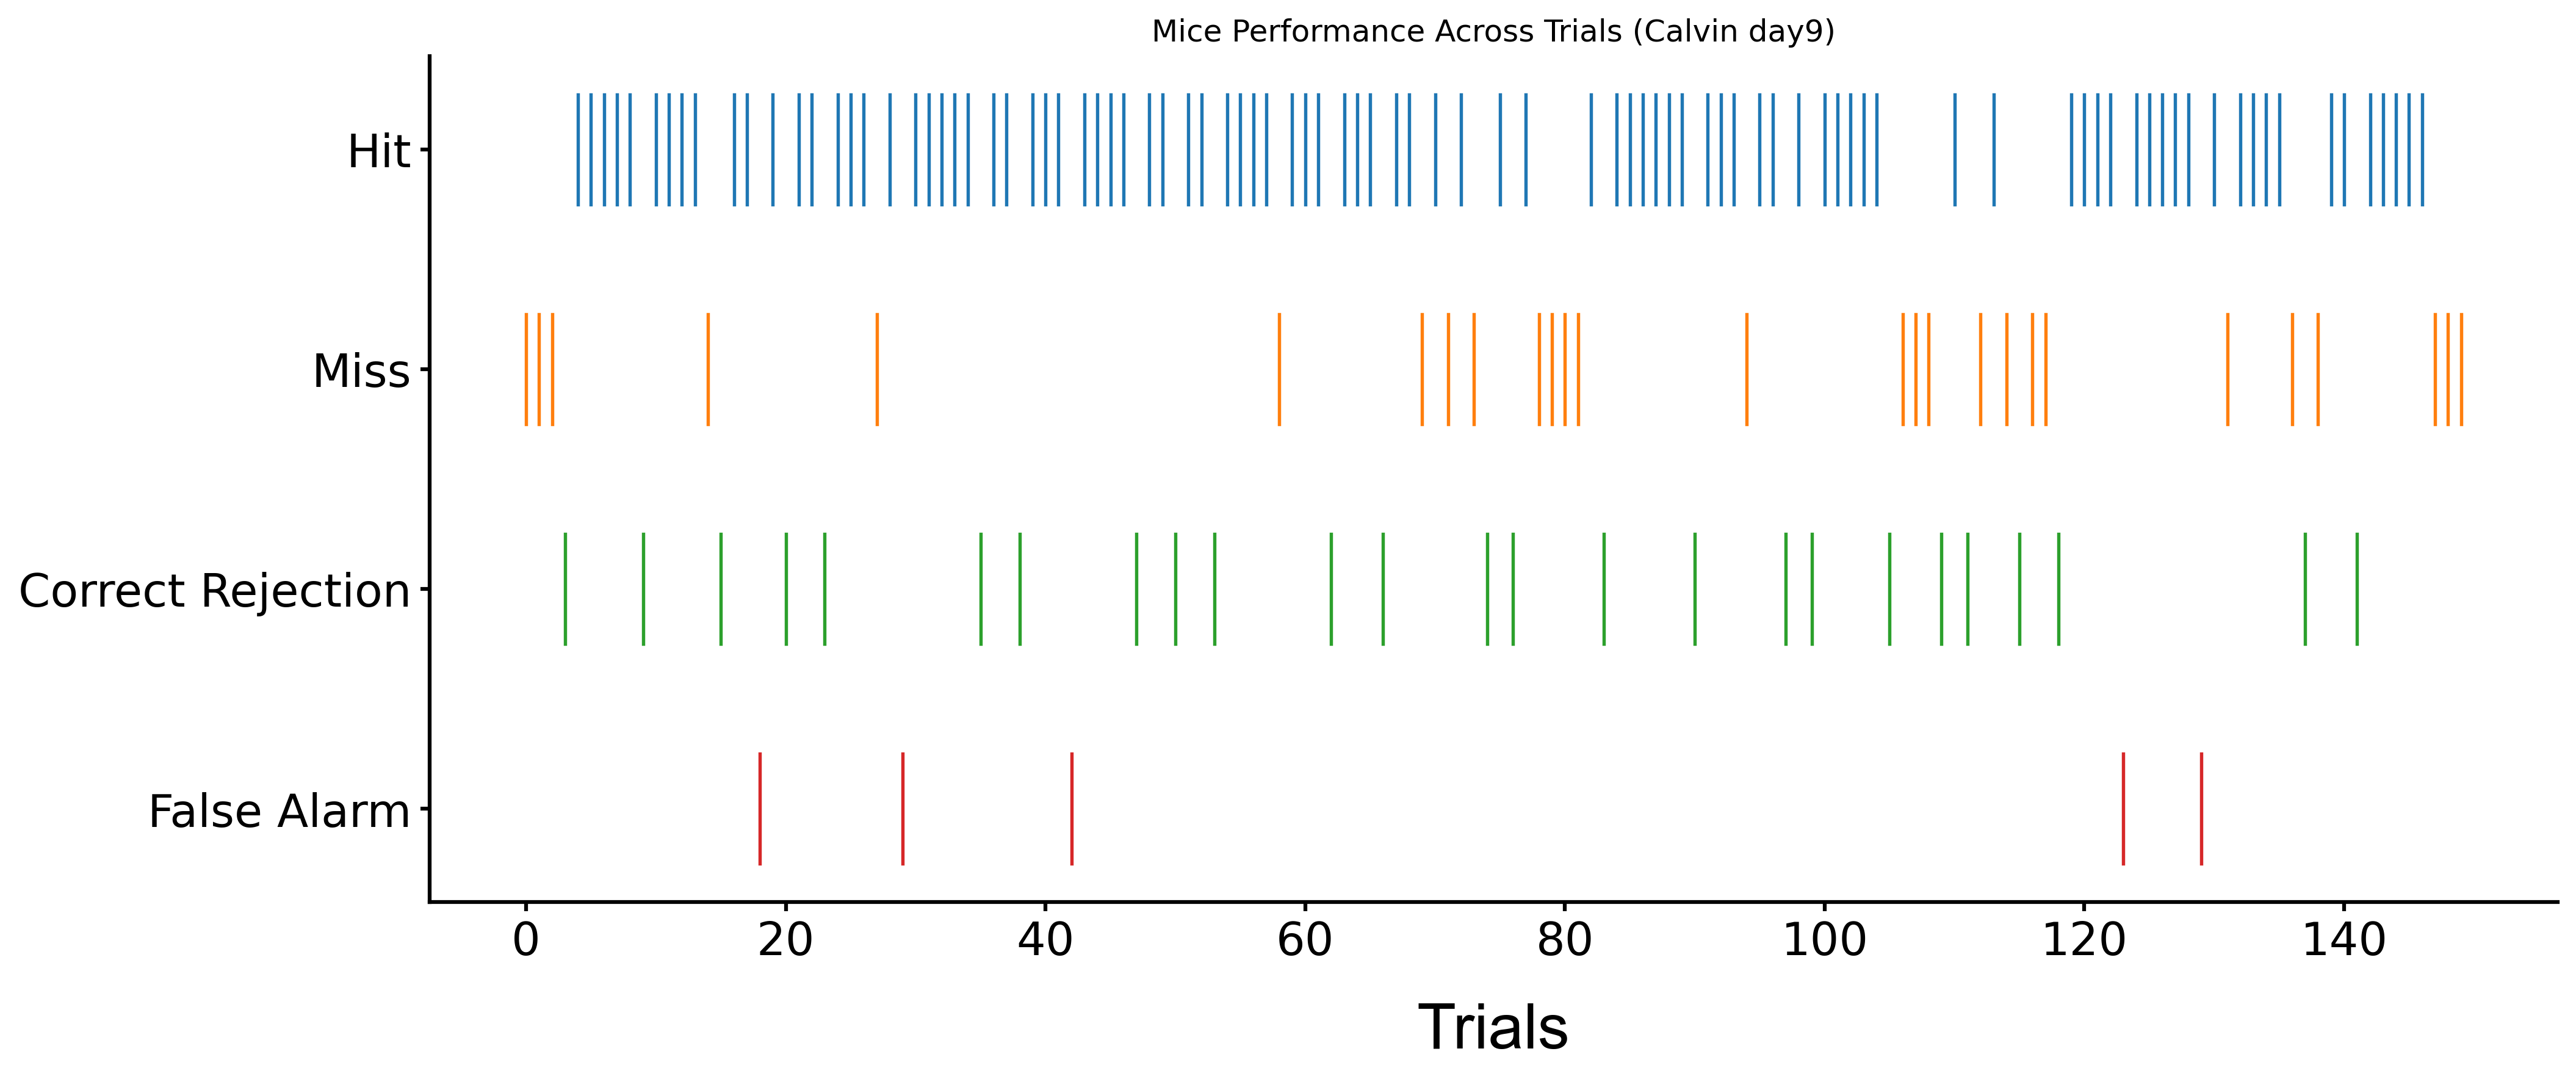

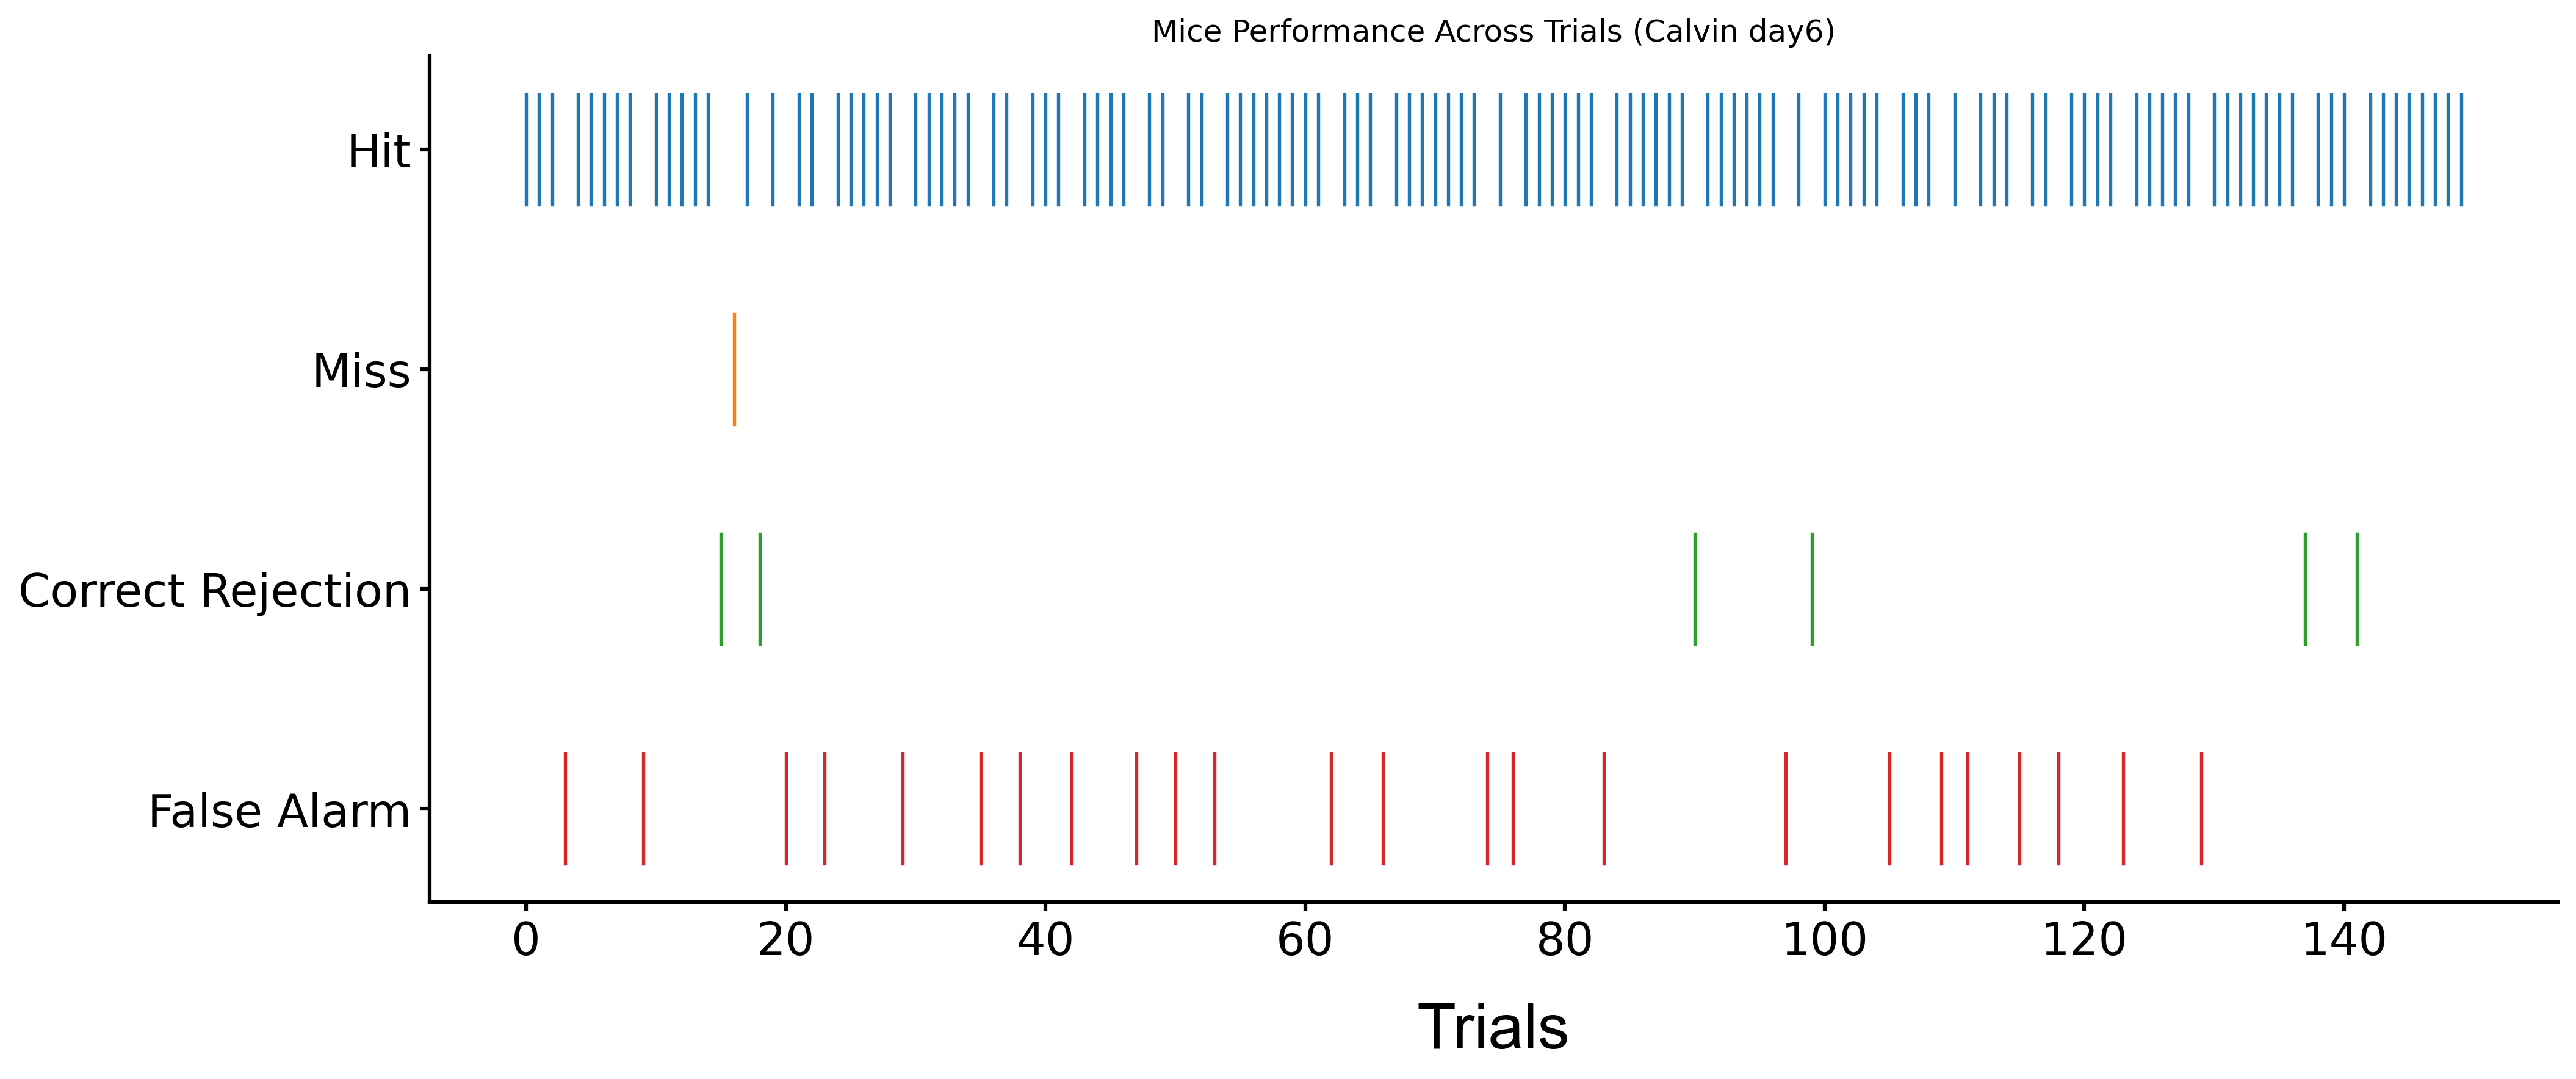

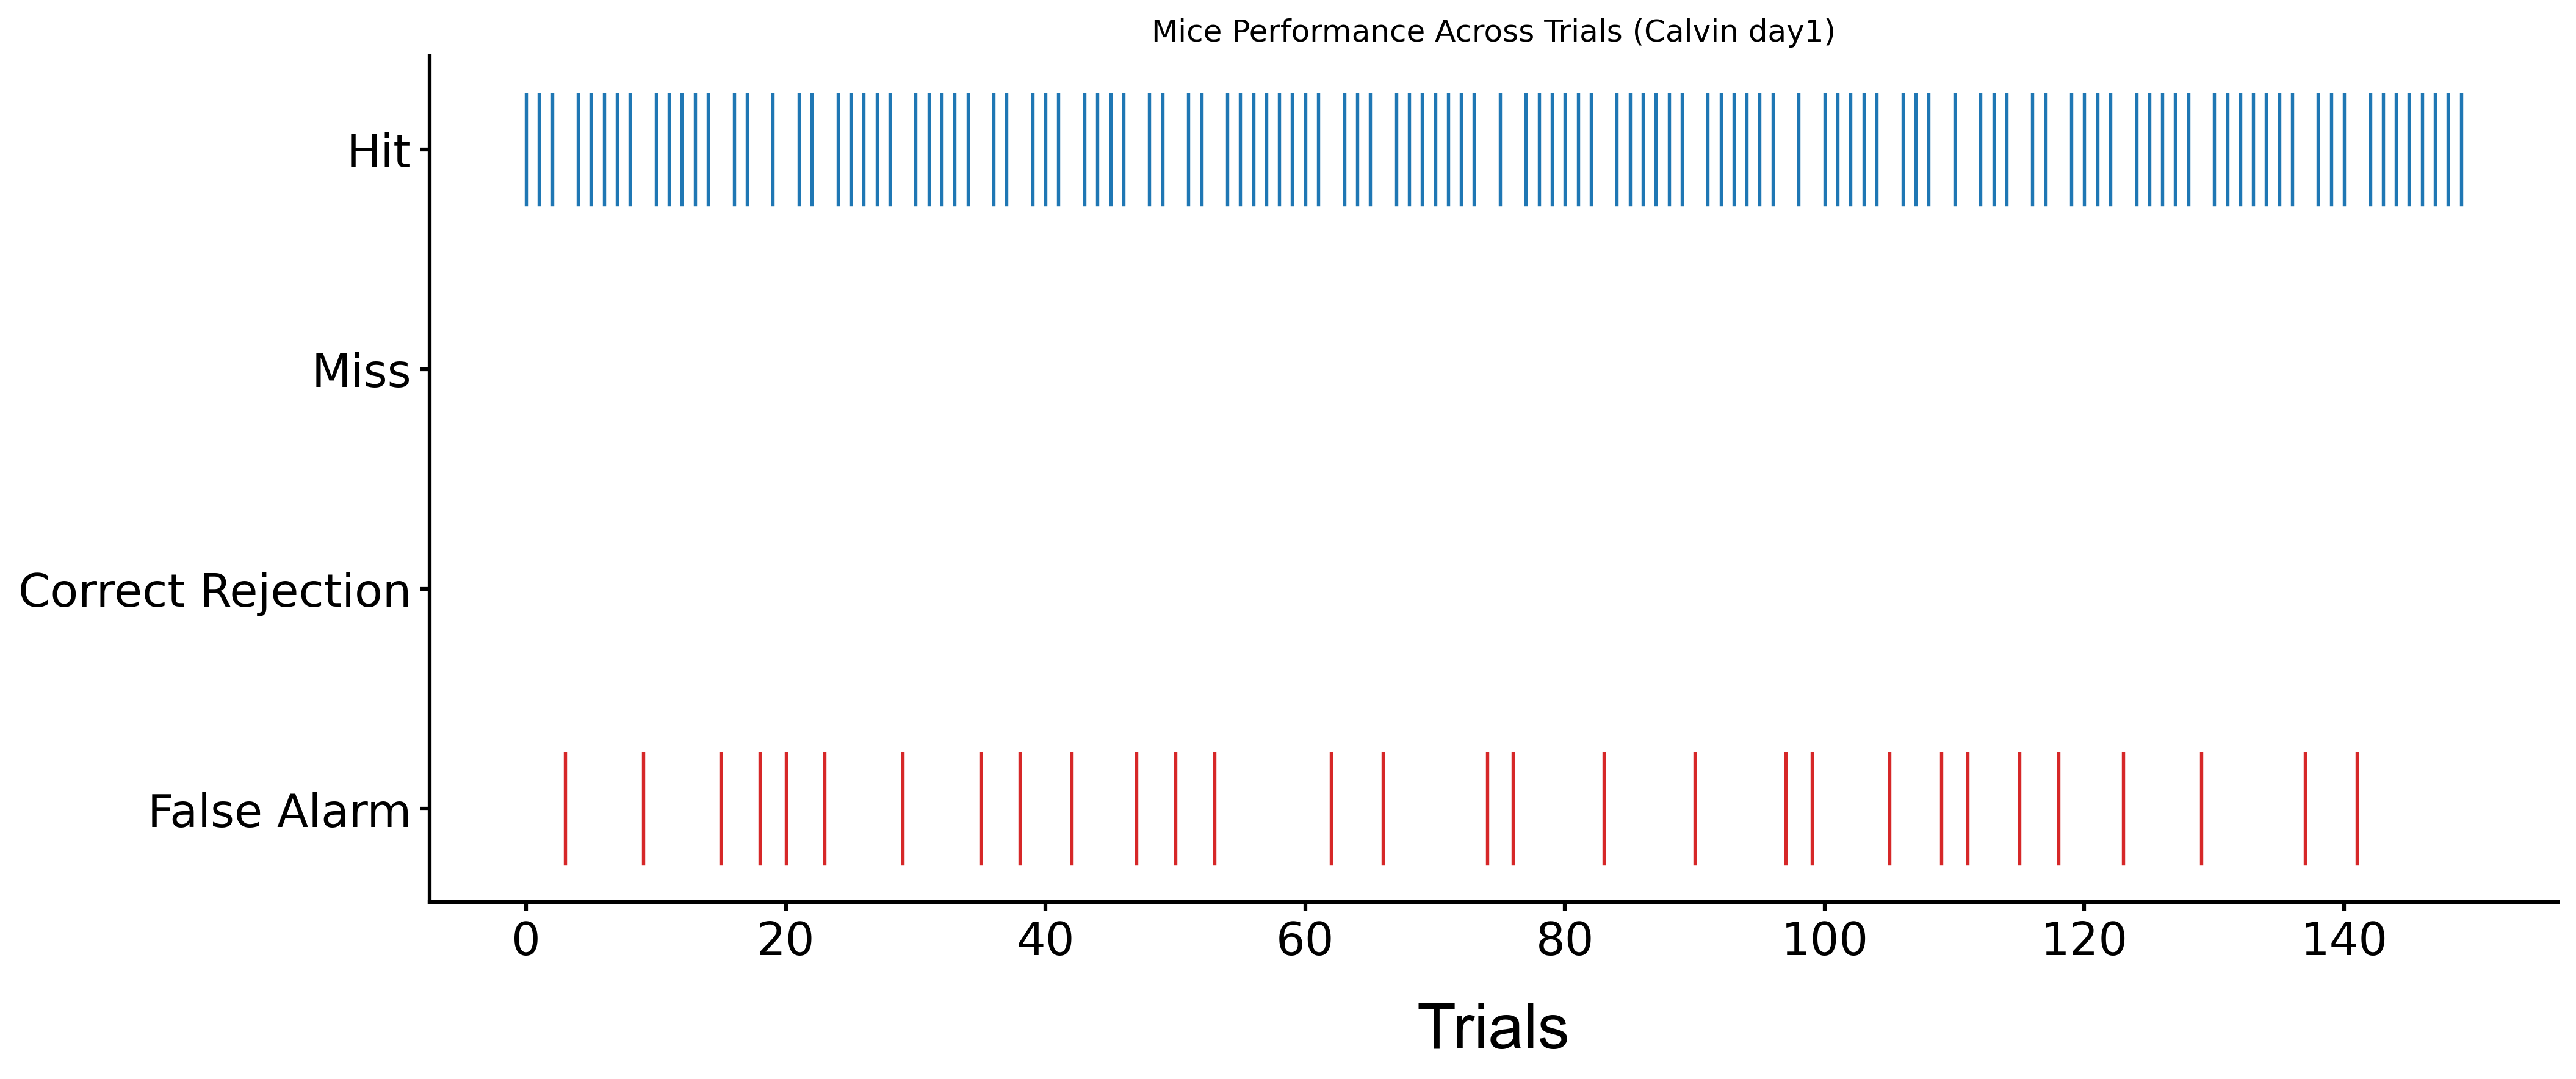

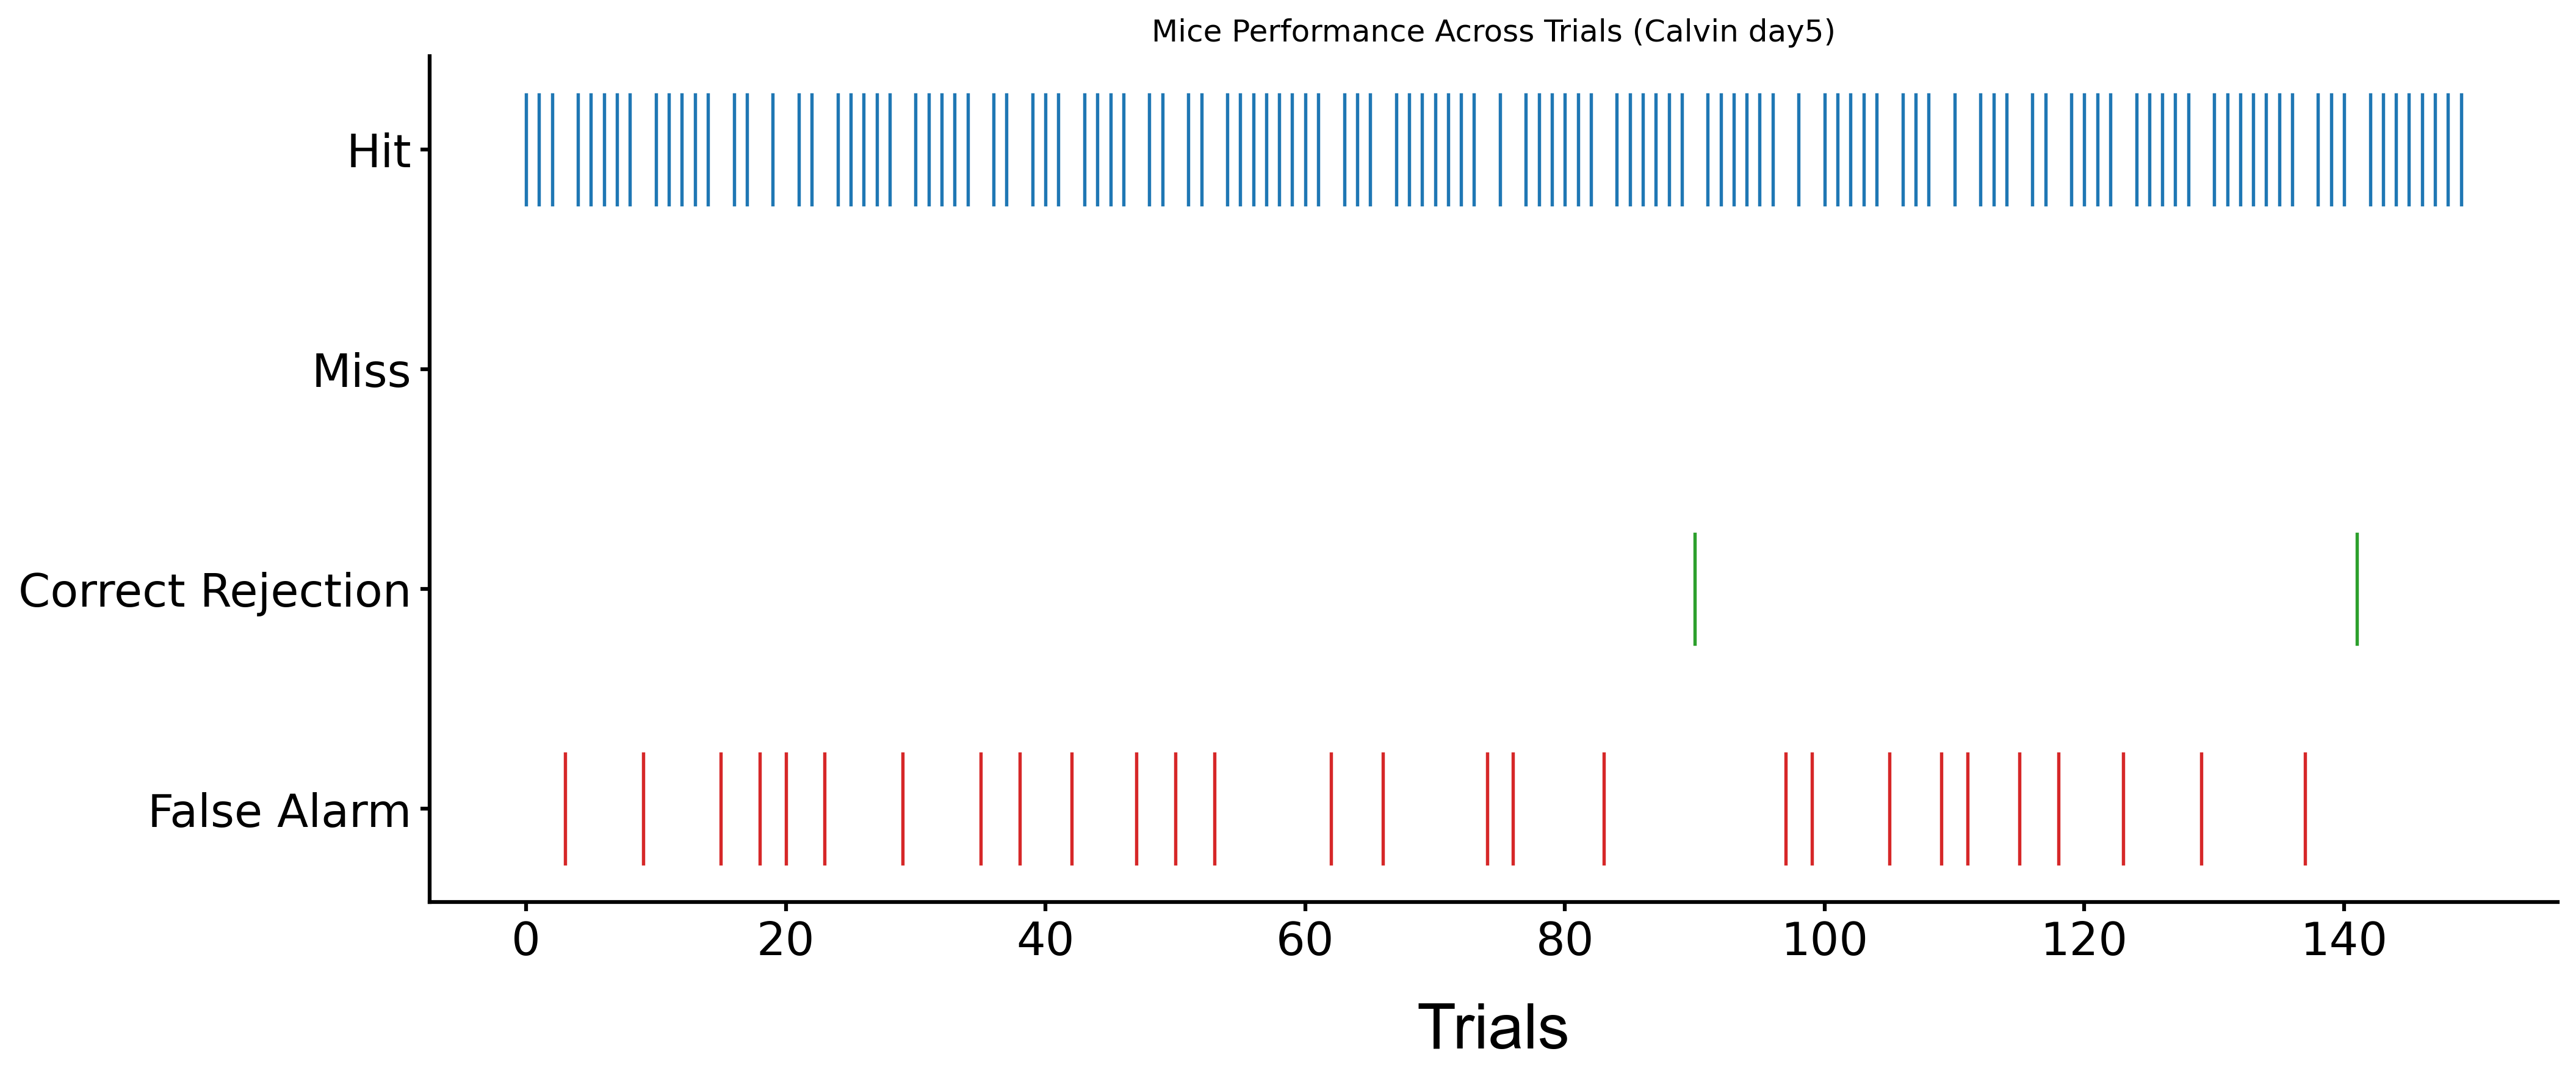

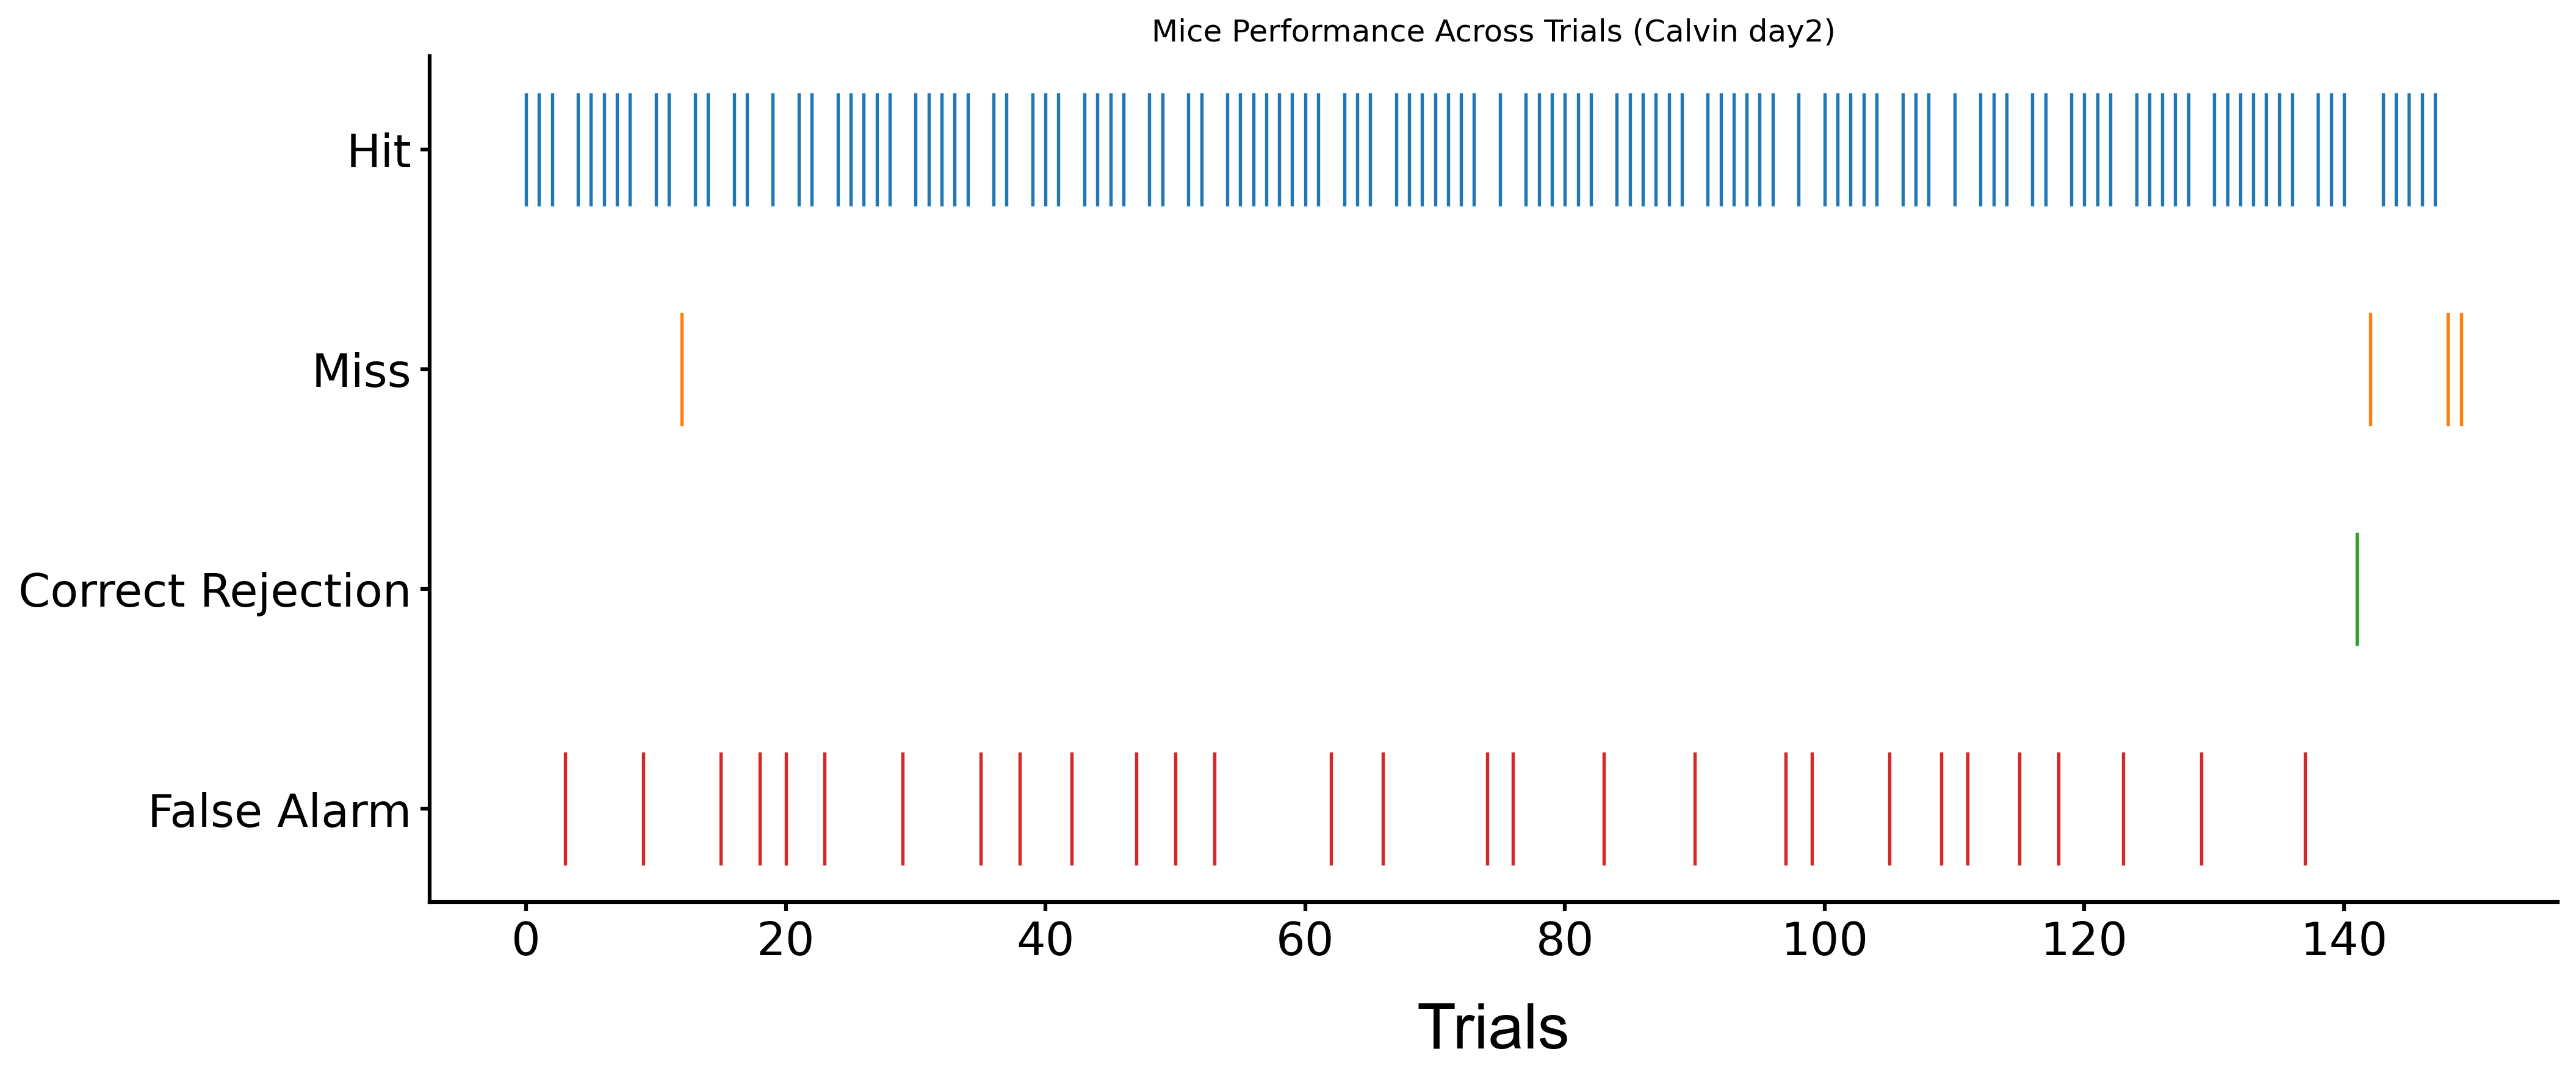

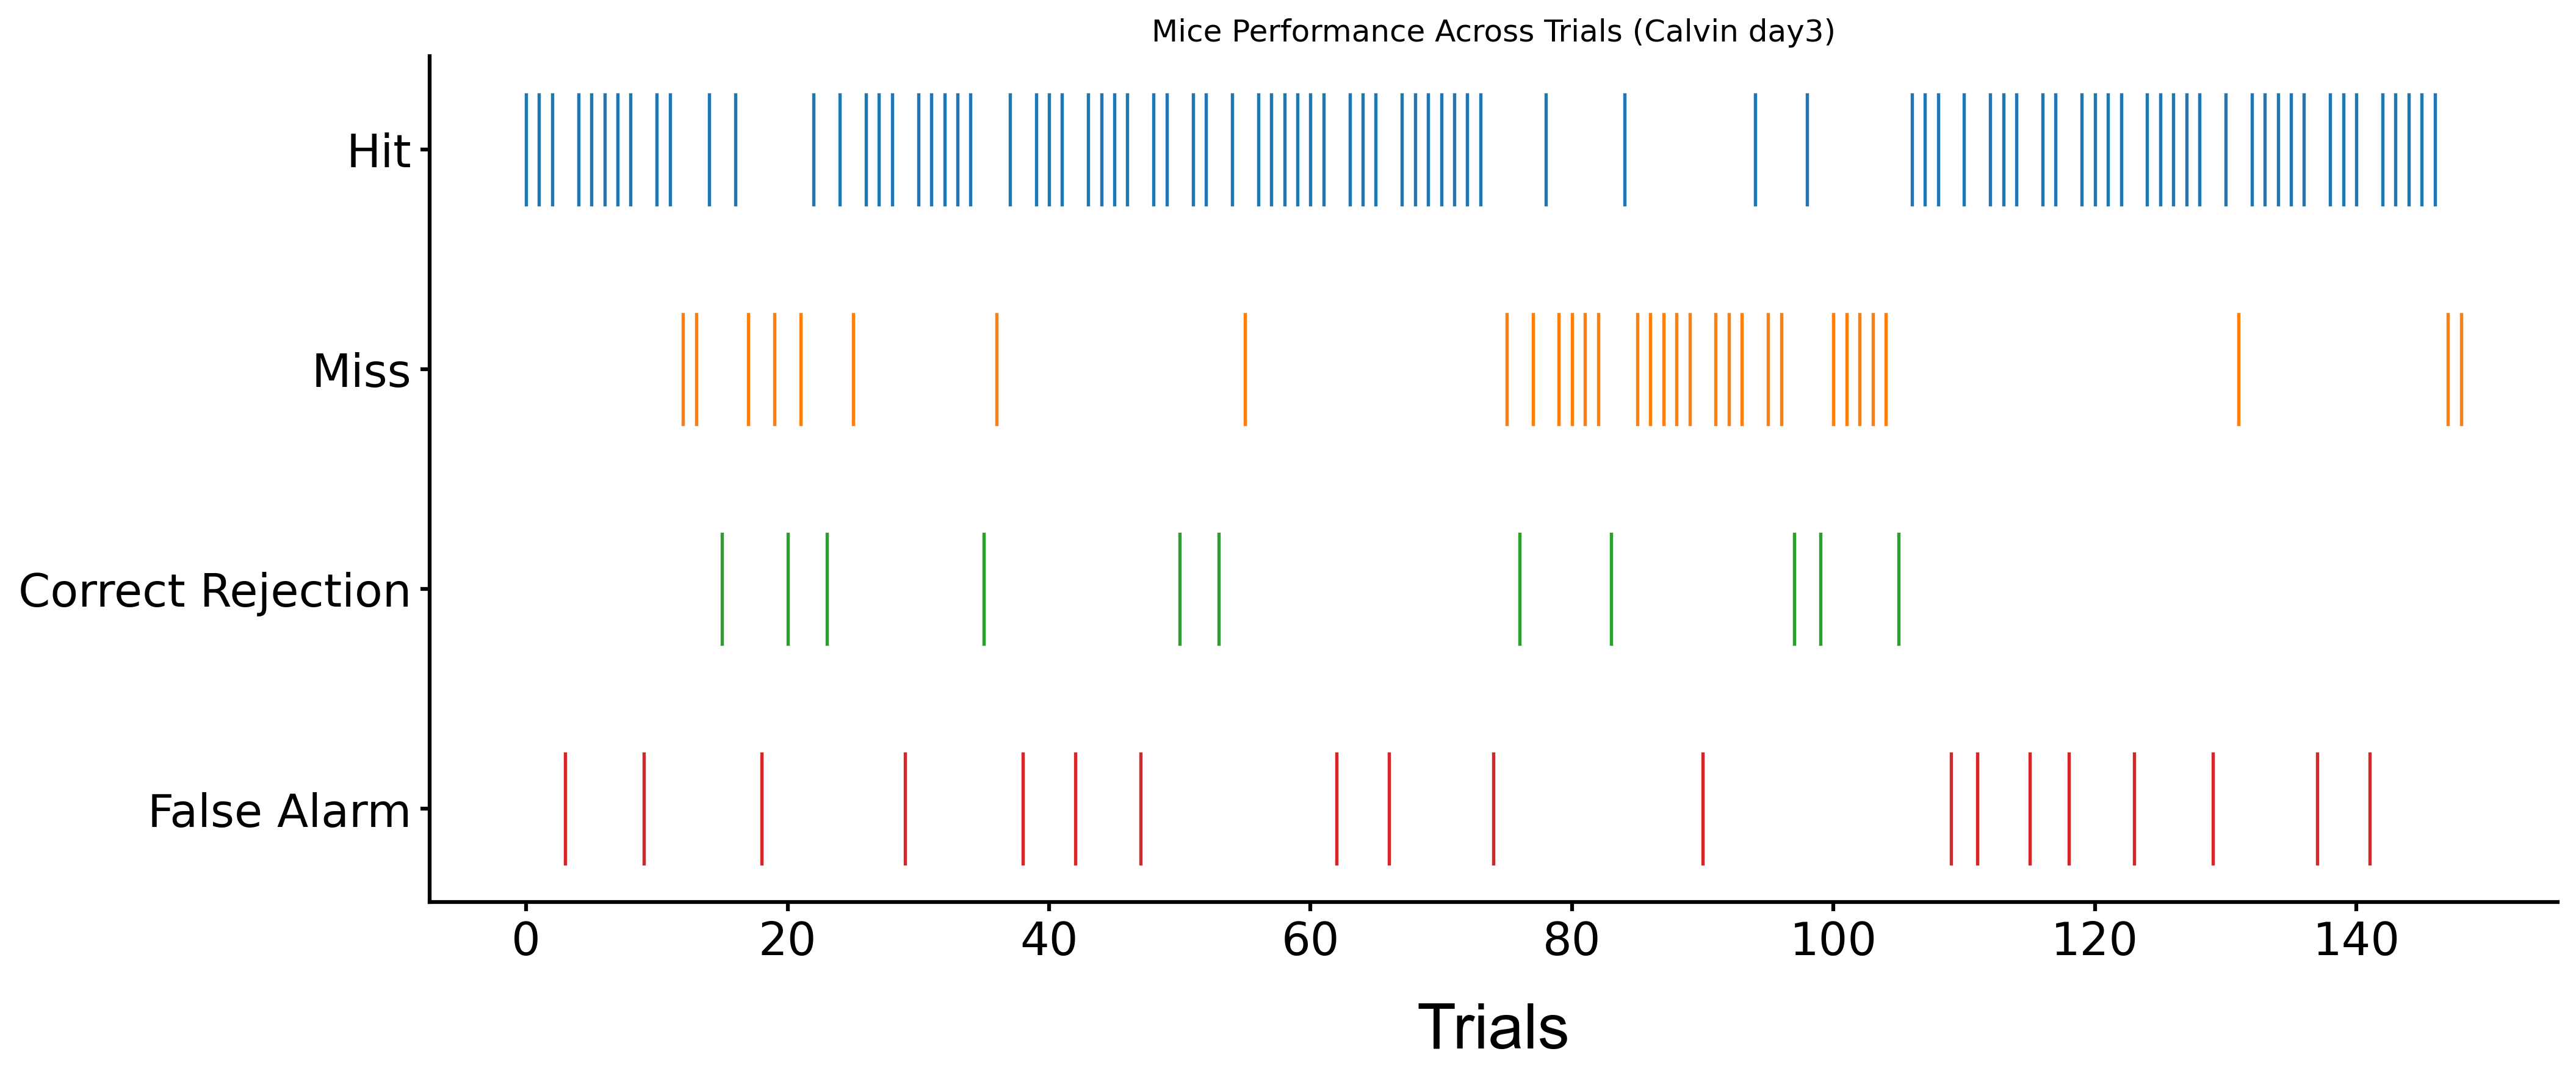

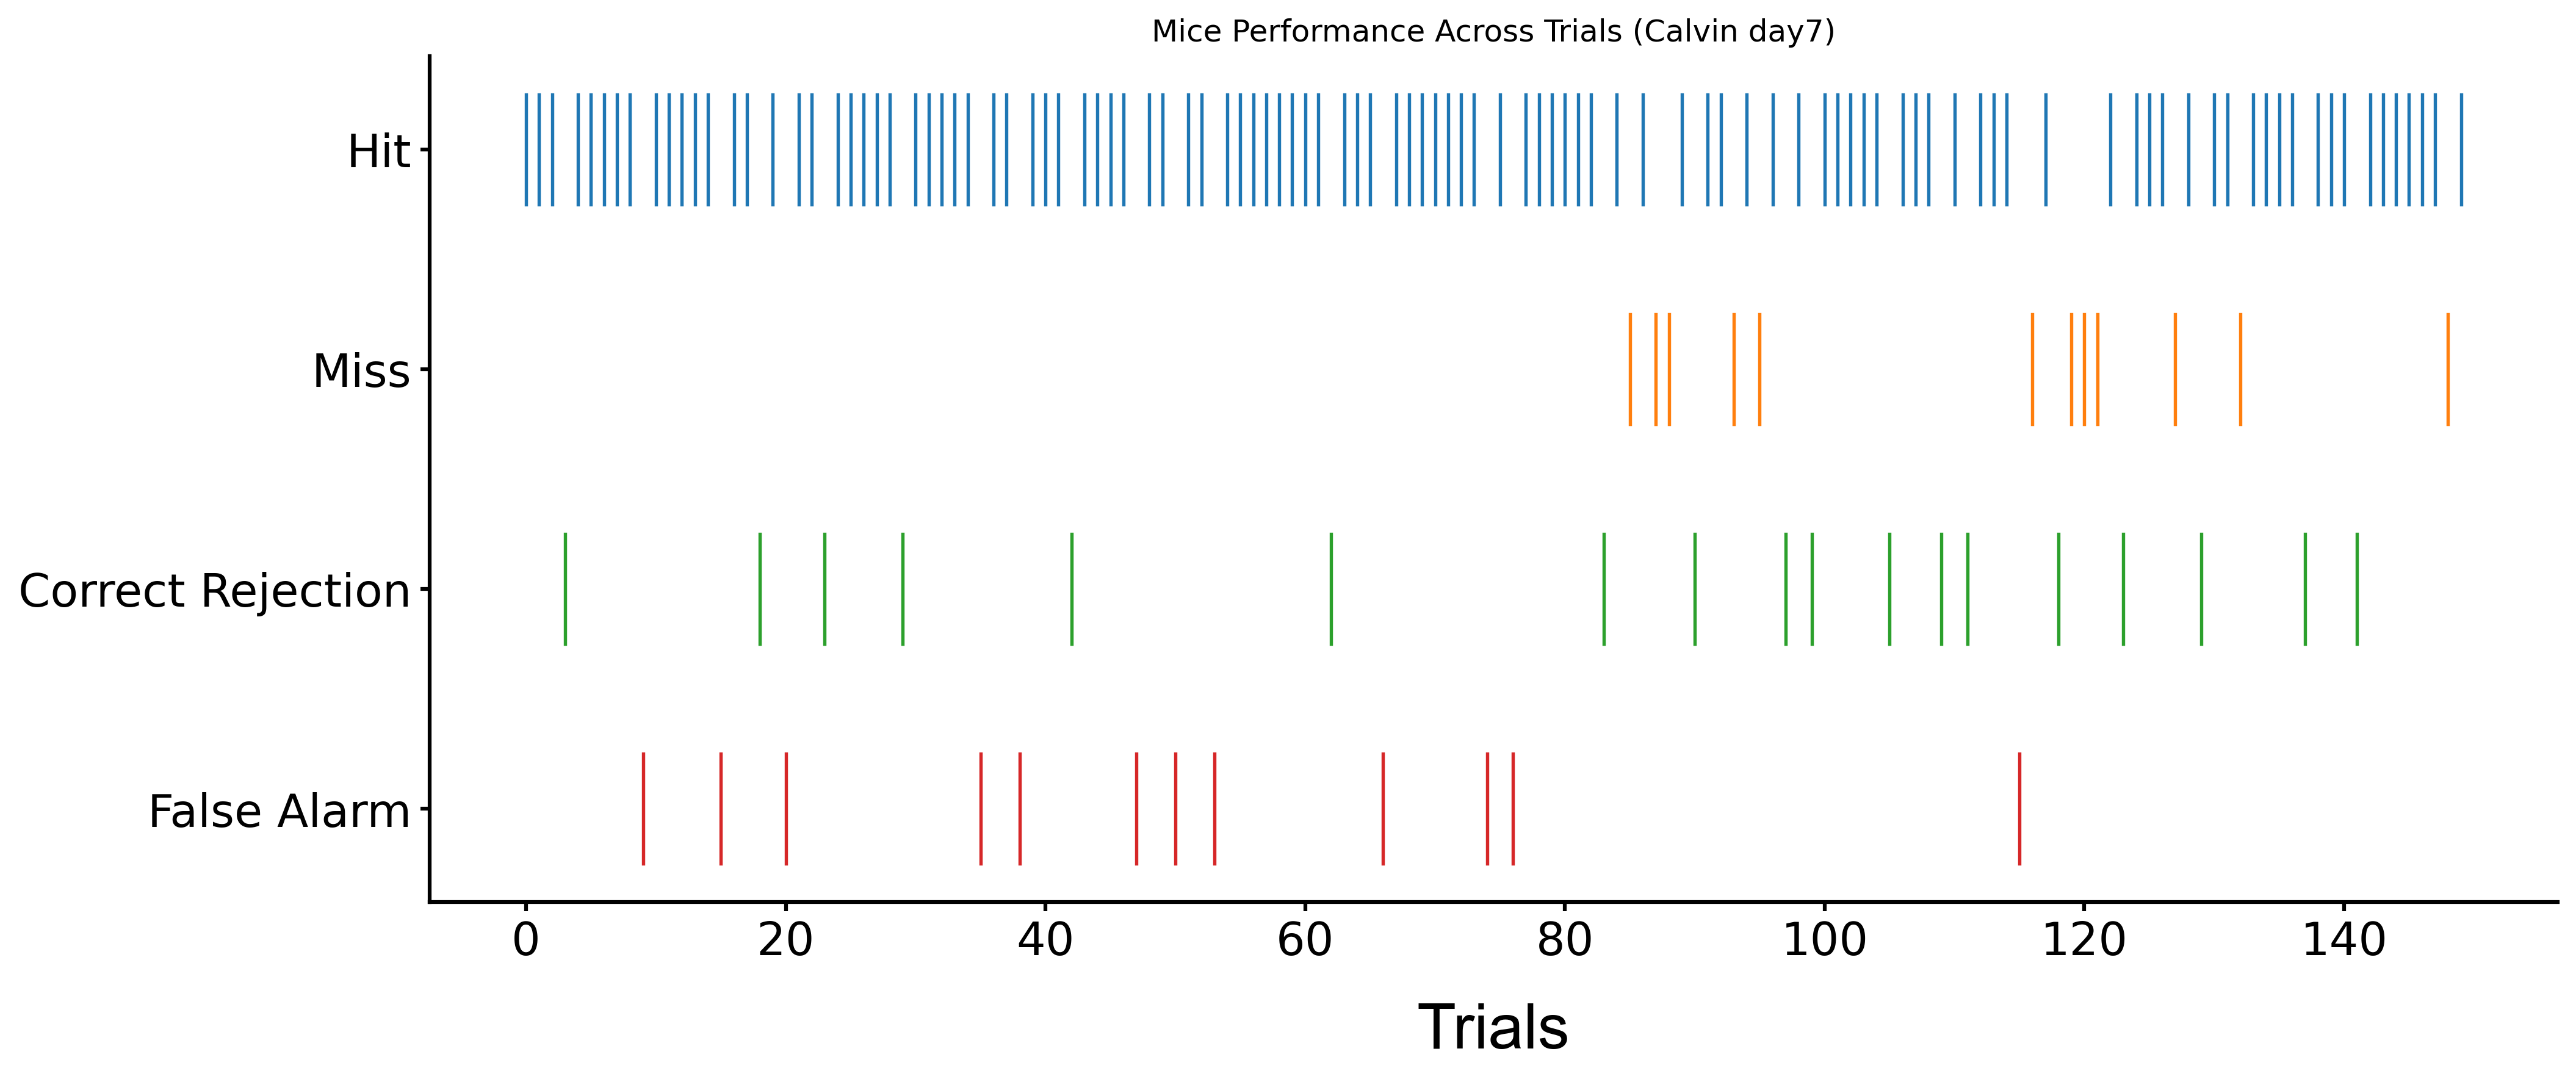

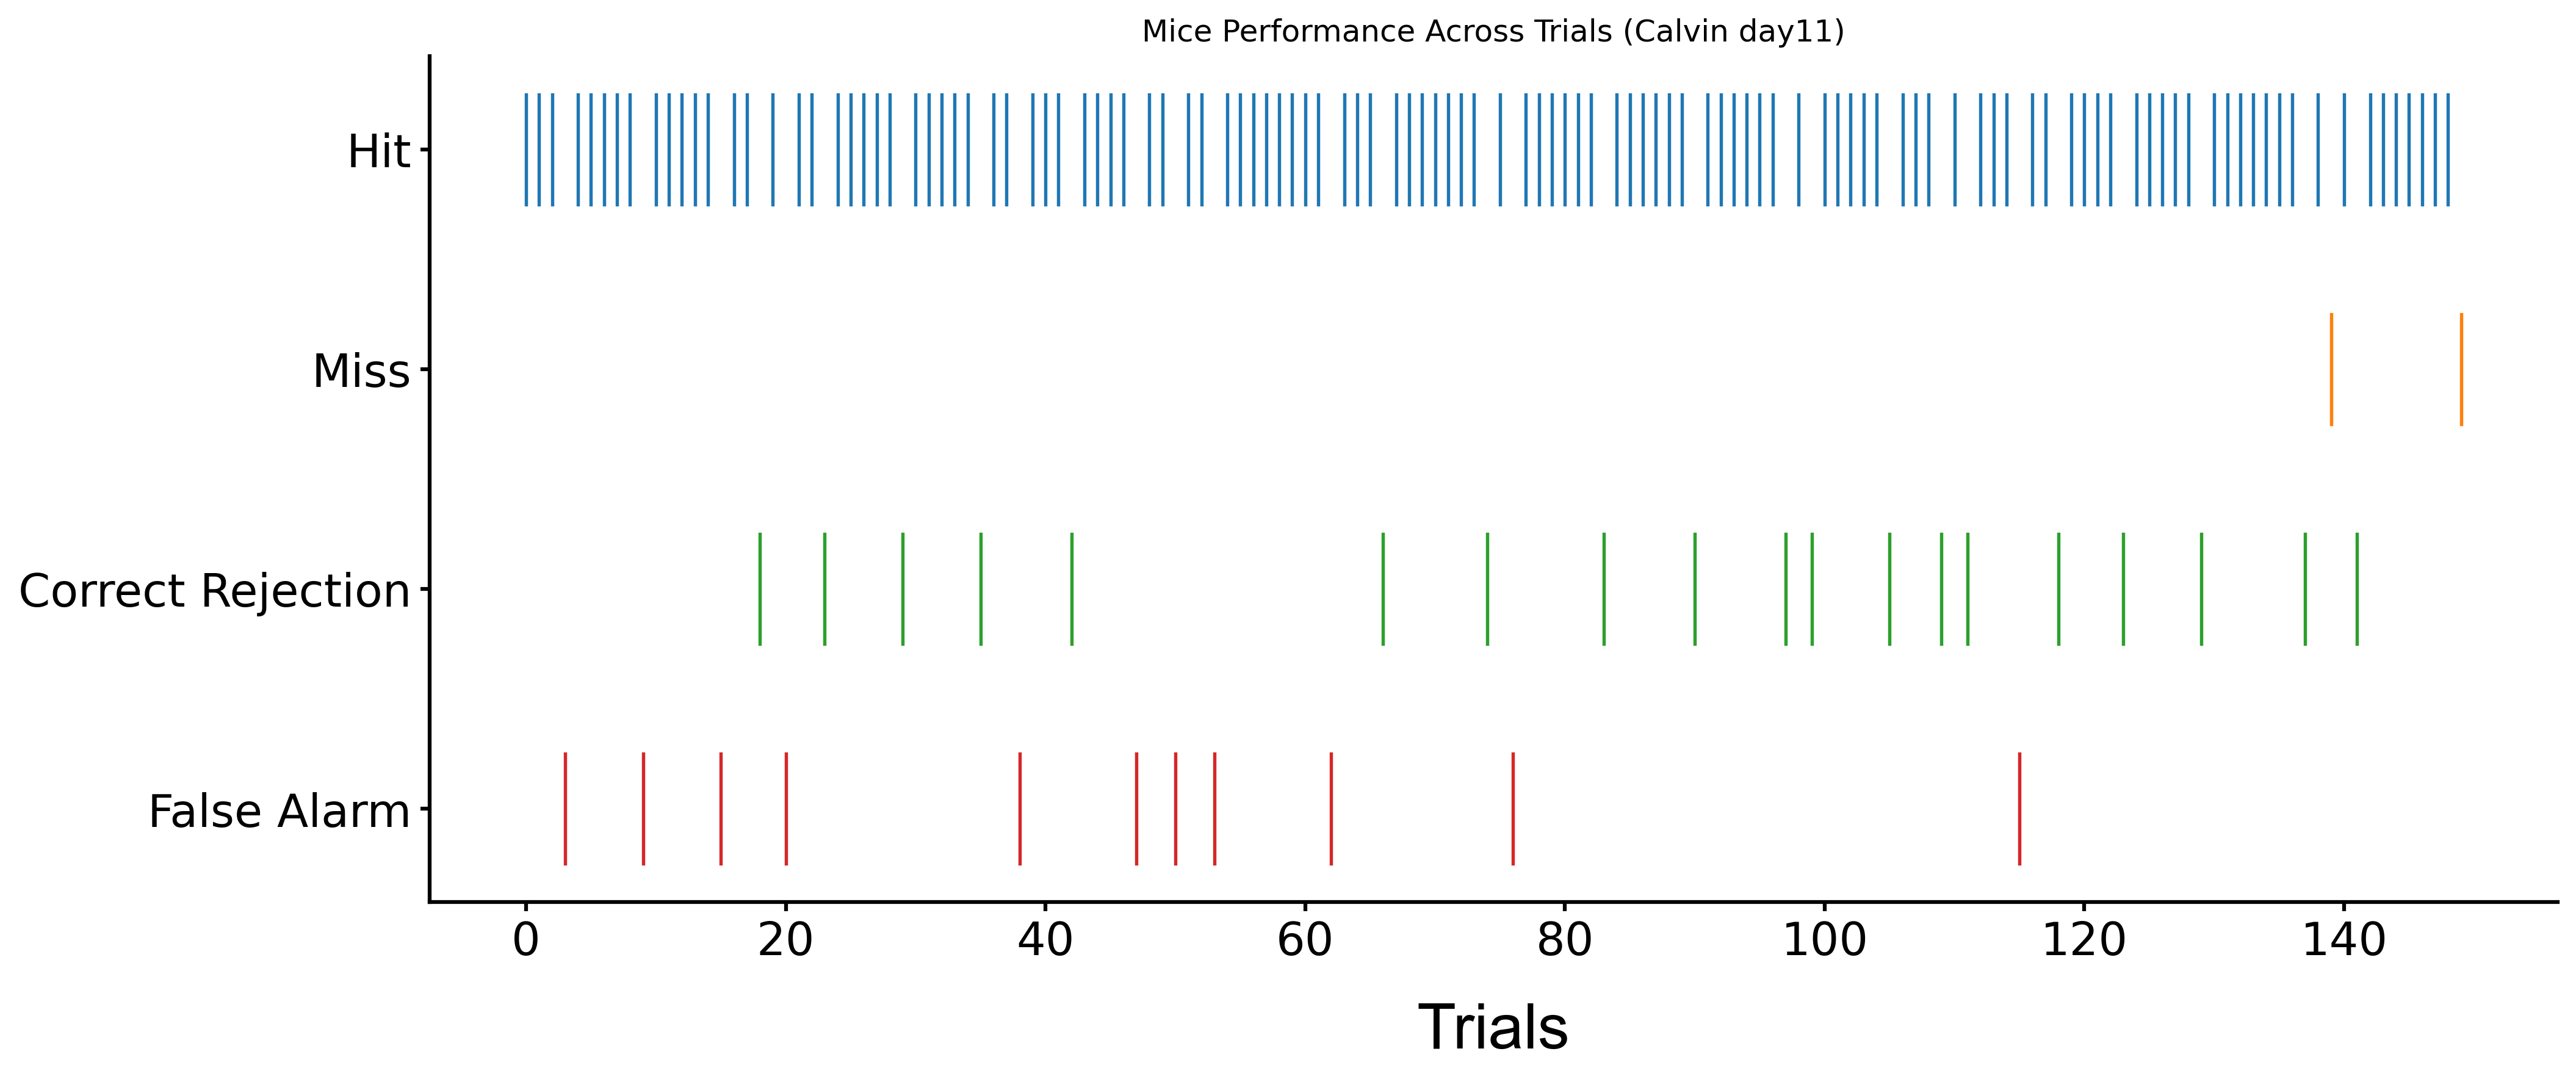

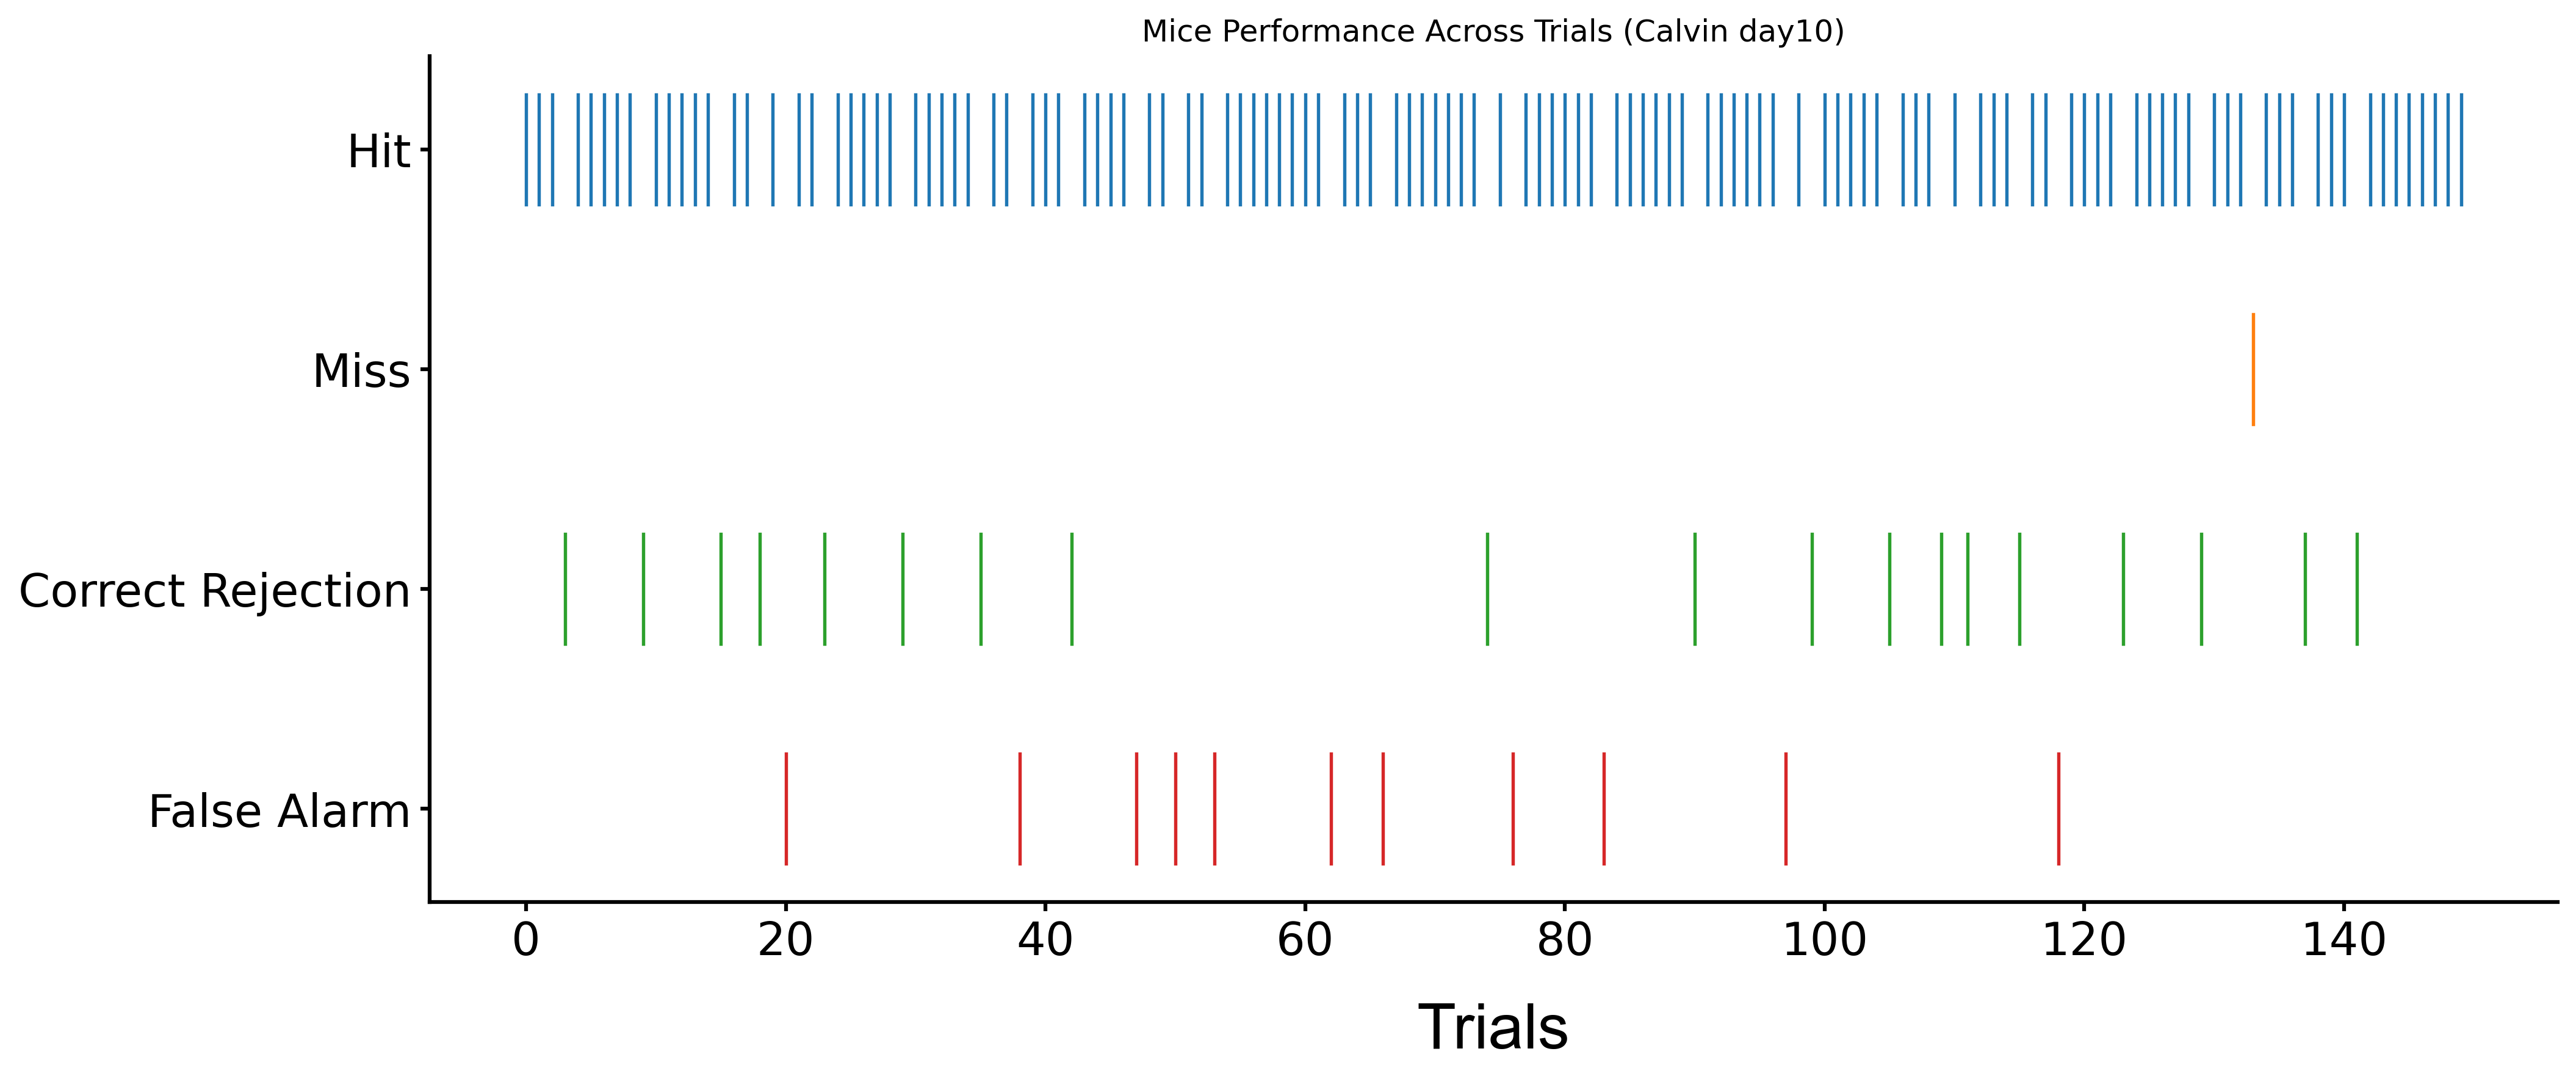

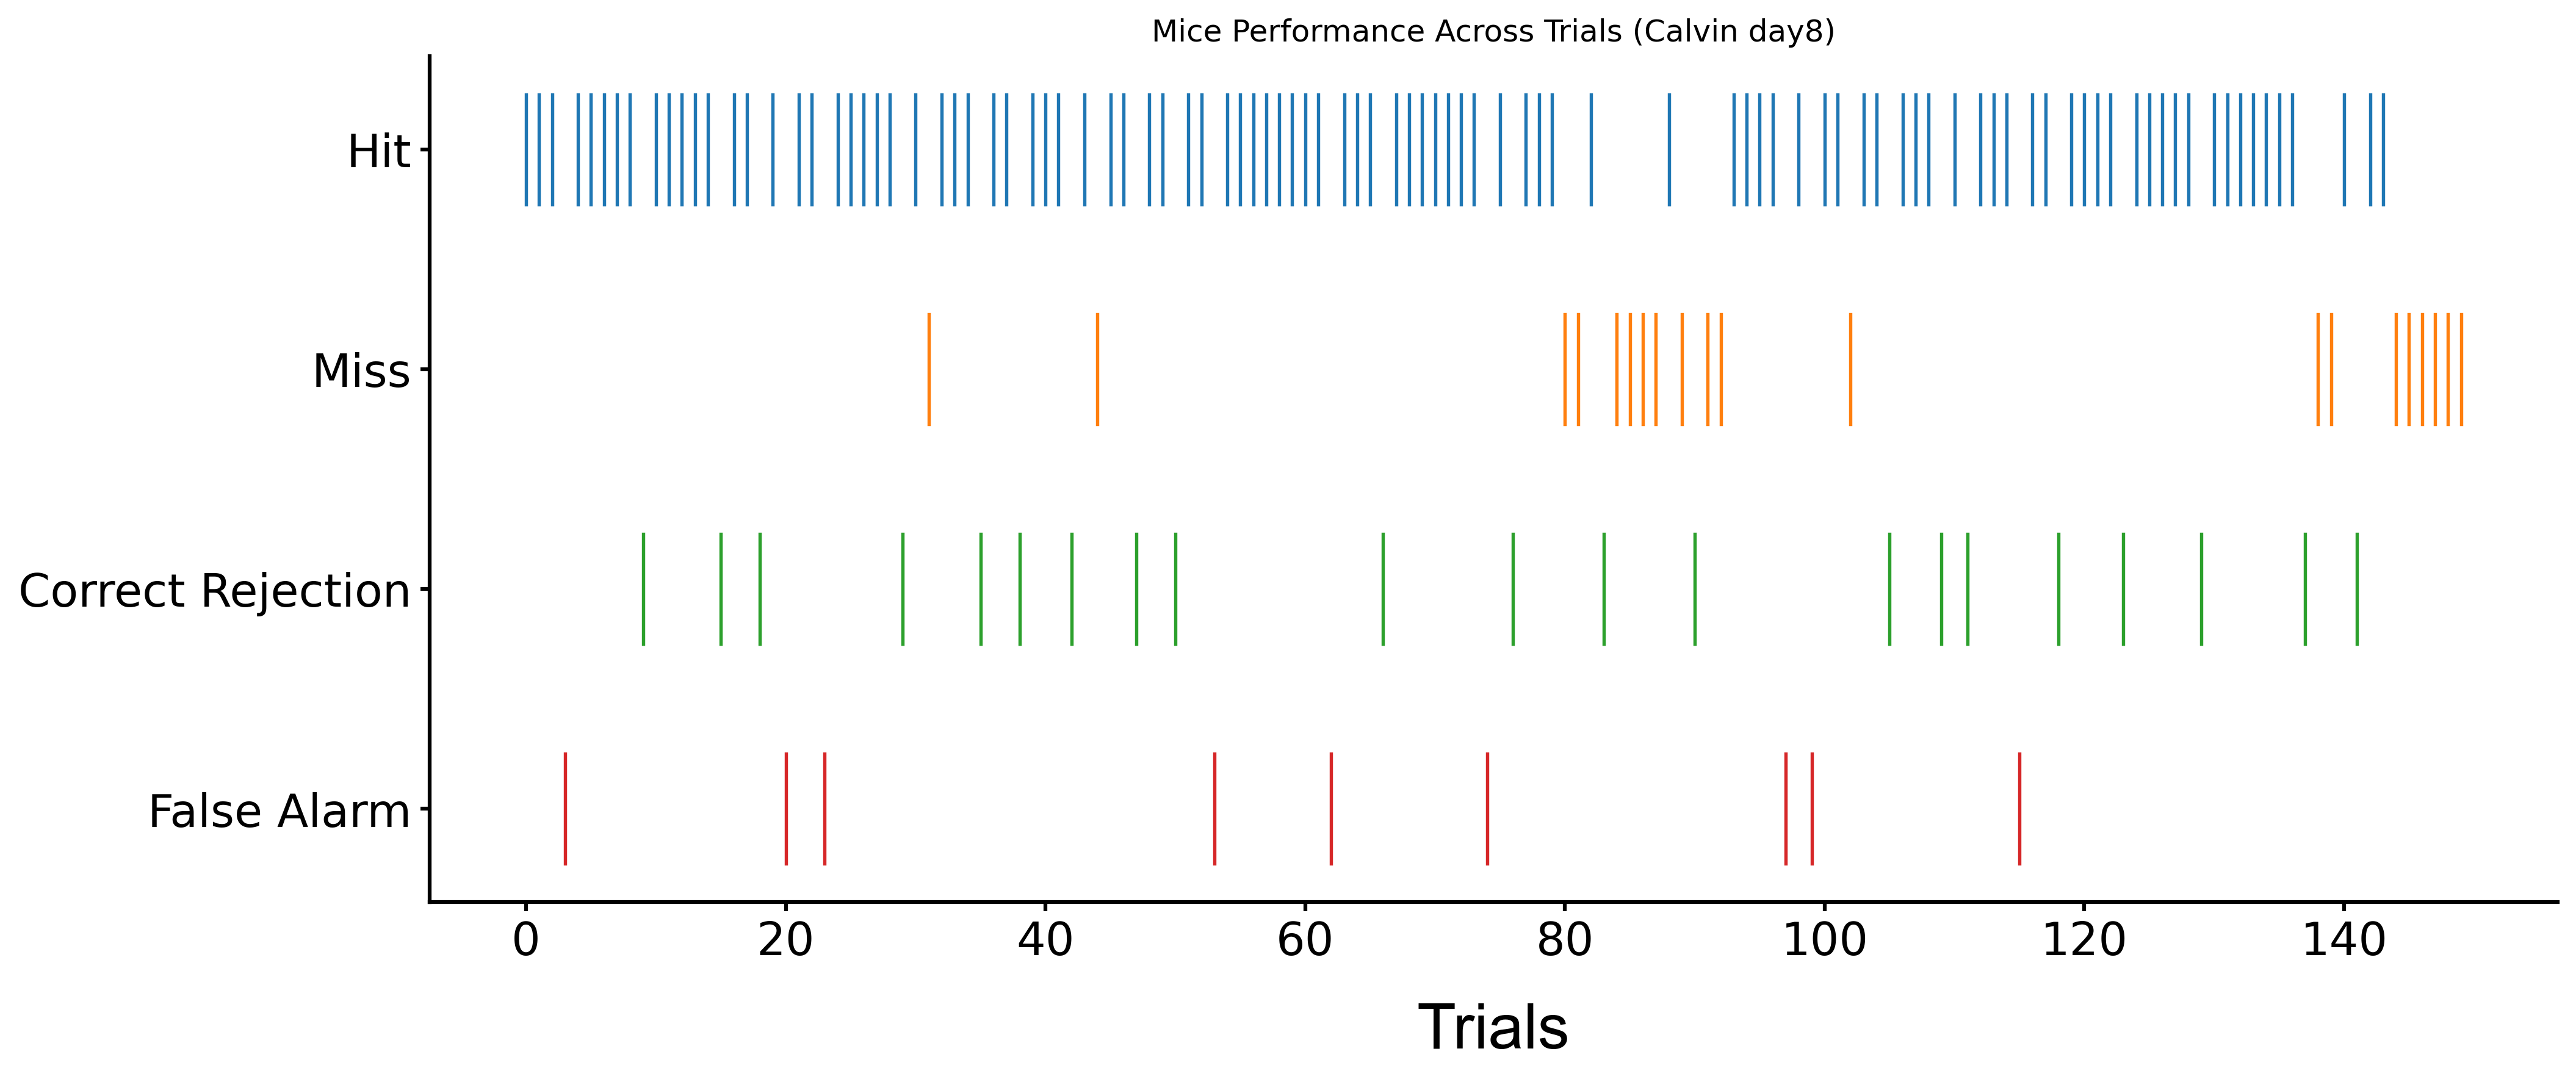

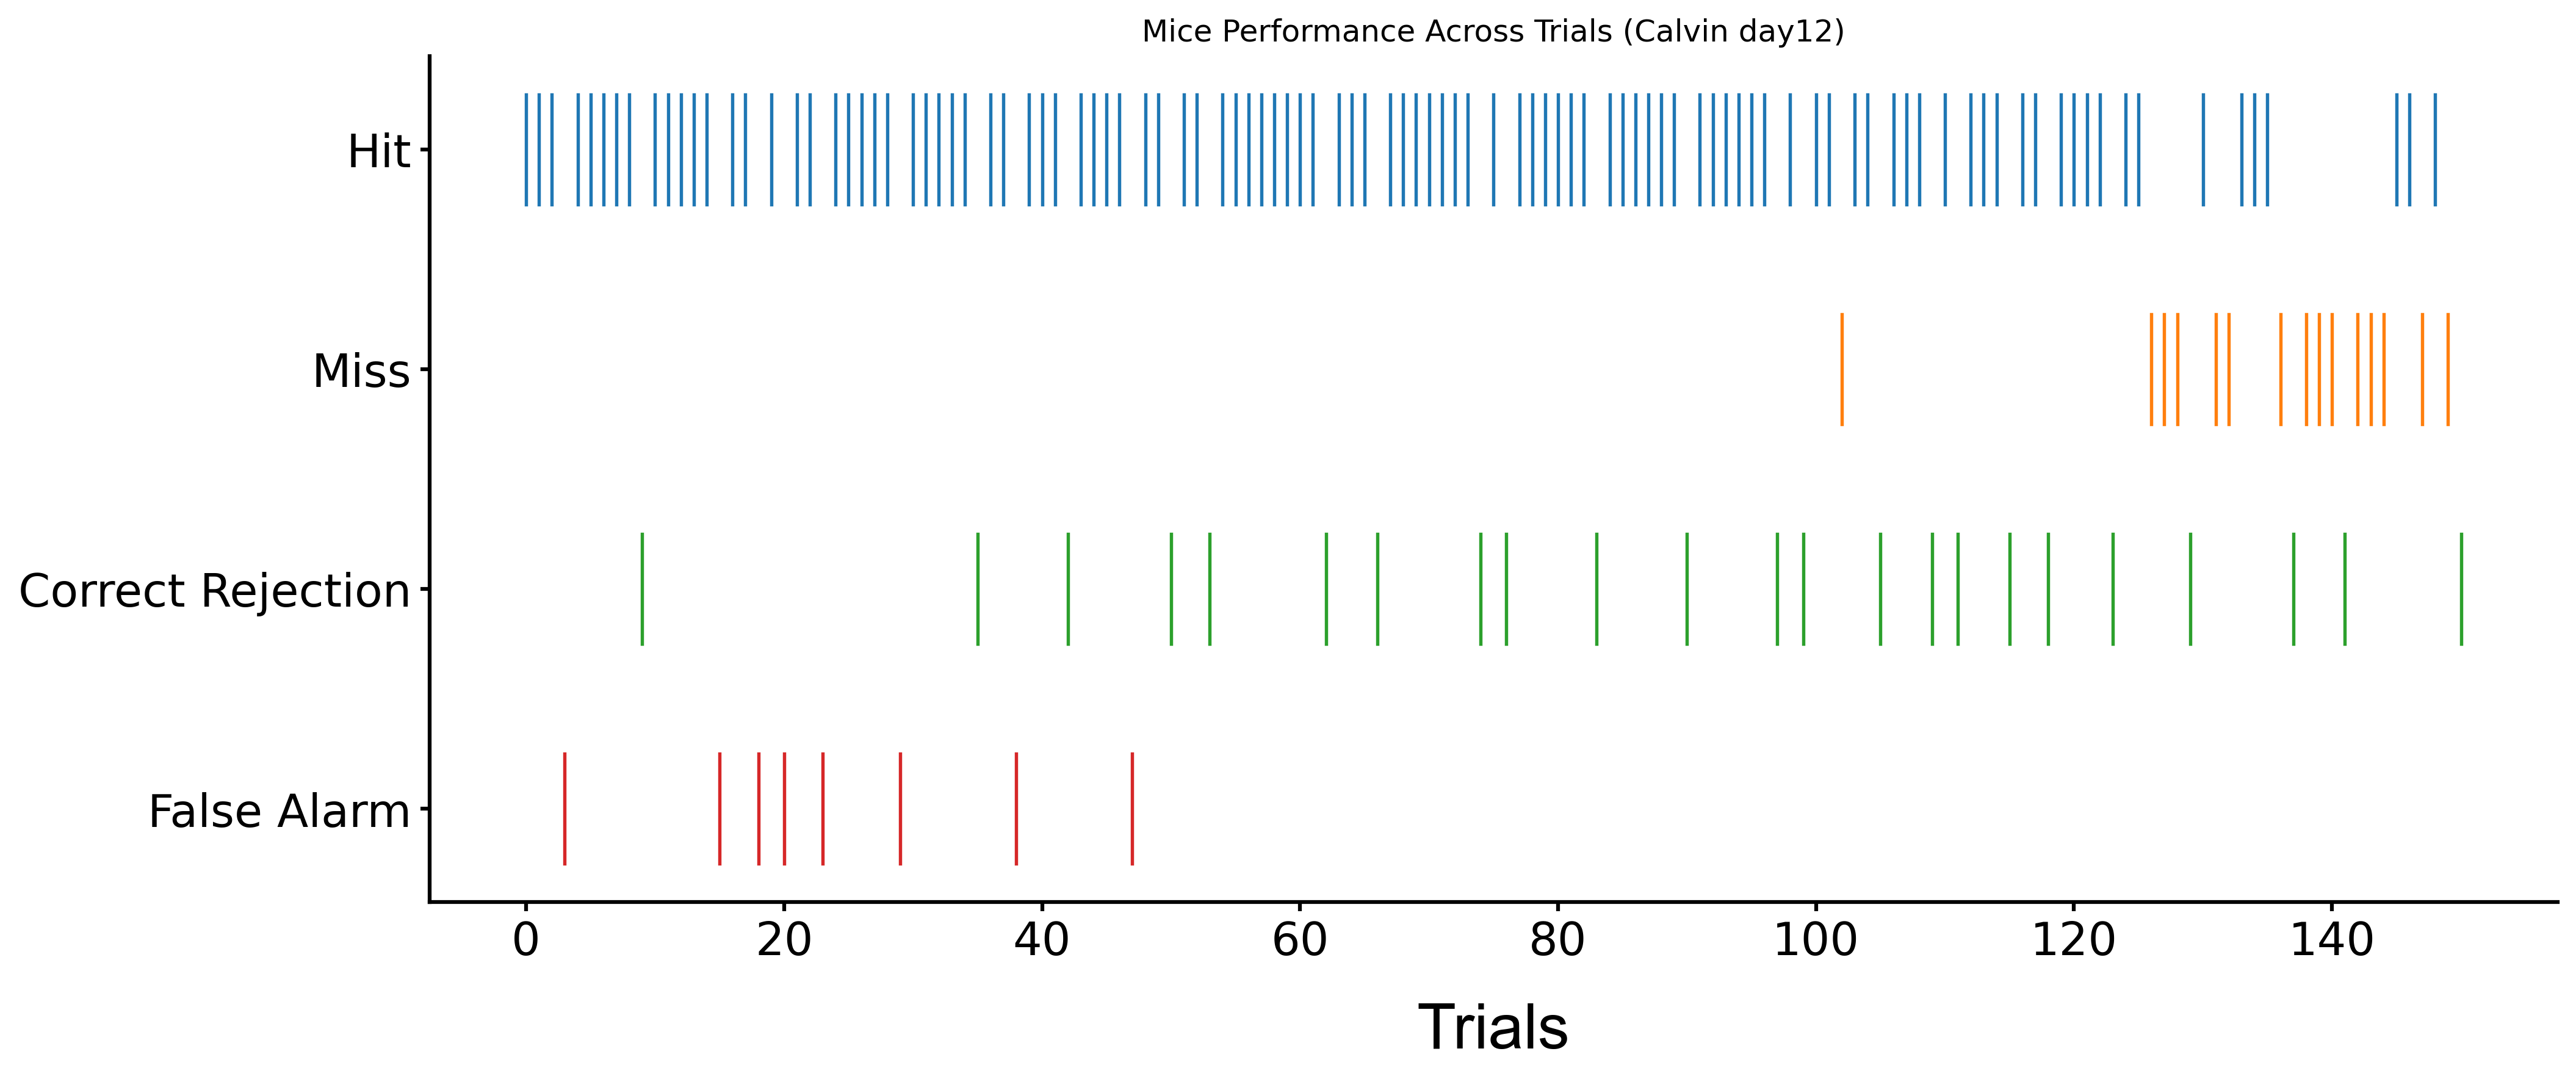

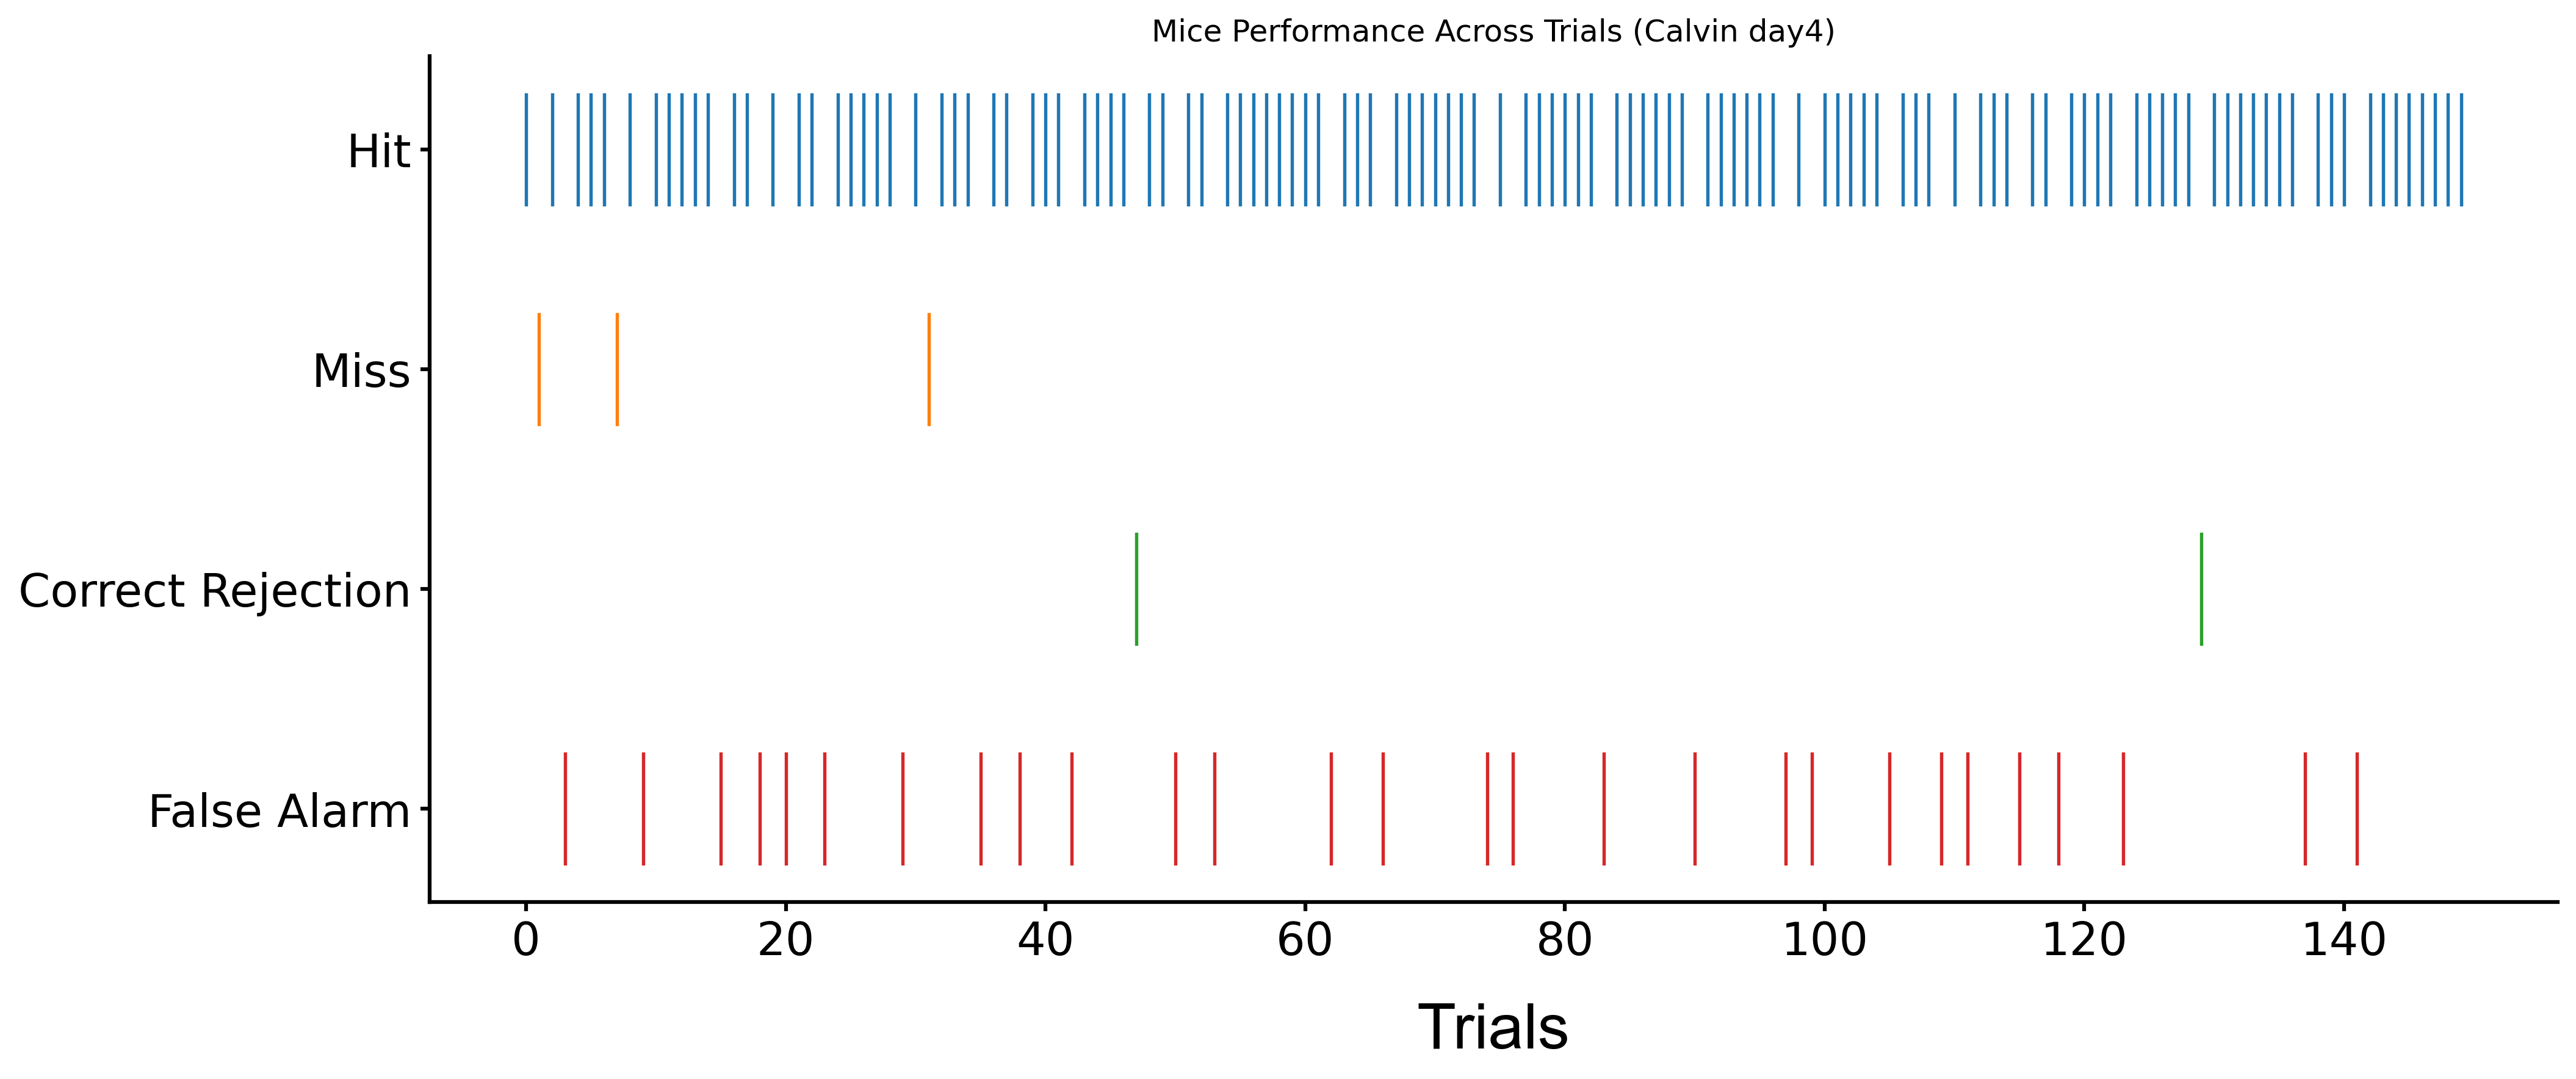

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

name = 'Calvin'

days = []

# Directory where CSV files are located
directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_Table'

# filename = 'New_trial_table_Day6_27042024_Cole.csv'

# Iterate over CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        
        # Extract day number from filename
        day = int(filename.split('_')[3].replace('Day', ''))
        days.append(day)

        # Read CSV file
        df = pd.read_csv(file_path)

        # Select only the relevant columns
        selected_columns = ['hit', 'miss', 'false_alarm', 'correct_reject']

        # Create a new DataFrame with only the selected columns
        event_df = df[selected_columns].copy()

        # Define the colors for different events
        colors = {'hit': '#1f77b4', 'miss': '#ff7f0e', 'false_alarm': '#d62728', 'correct_reject': '#2ca02c'}

        # Create a figure and axis
        fig, ax = plt.subplots(dpi=300)
        fig.set_size_inches(15, 6)

        # Set vertical offsets for each event type
        # offsets = {'hit': 0, 'miss': 1, 'false_alarm': 2, 'correct_reject': 3}
        offsets = {'hit': 3, 'miss': 2, 'false_alarm': 0, 'correct_reject': 1}

        # Set vertical spacing between rows
        row_height = 0.5

        # Iterate through each event and plot events on the same subplot with different vertical offsets
        for event, color in colors.items():
            for index, row in event_df.iterrows():
                if row[event]:
                    ax.plot([index, index], [offsets[event] - row_height / 2, offsets[event] + row_height / 2],
                            color=color, linewidth=1.3)
                    # ax.plot(index, offsets[event], marker='|', color=color, markersize=10)

        # Set labels and title
        ax.tick_params(axis='x', labelsize=18, width=1.5)
        ax.tick_params(axis='y', labelsize=18, width=1.5)
        ax.set_xlabel('Trials', labelpad=15, size=25, fontweight=1.5, family='Arial')

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
        ax.spines['left'].set_linewidth(1.5)

        # ax.set_xlim(0, 160)
        Trial_type = ['Hit', 'Miss', 'False Alarm', 'Correct Rejection']
        ax.set_yticks(list(offsets.values()))
        ax.set_yticklabels(Trial_type)
        ax.set_title(f'Mice Performance Across Trials ({name} day{day})')

# [Demo] Hit vs Miss (Pupil size 500ms before Vstim, binsize = 50ms)

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# name = 'Cole'
# days = [9,10,12,13]
# dates = ['01052024','02052024','06052024','07052024']
# axis = ['x','y','y','y']
# Trial_type = 'miss'

# name = 'Chase'
# days = [7,8,9,10]
# dates = ['30042024','01052024','02052024','03052024']
# axis = ['y','y','y','y']
# Trial_type = 'miss'

name = 'Calvin'
days = [7,8,9]
dates = ['30042024','01052024','02052024']
axis = ['x','y','y']
# Trial_type = 'miss'

In [21]:
time_before_change = 0
duration = 0

if Trial_type == 'hit' or 'miss':
    # Hit/Miss, align with Vstim
    time_before_change = 0.5 #how much time to plot before the vstim
    duration = 1.1

elif Trial_type == 'FA':
    # FA aligned with reward
    time_before_change = 0.5 #how much time to plot before the reward
    duration = 1.75
delay_duration = 0.25

bin_size = 0.05
time_bins = np.arange(0 - time_before_change, 0.05, bin_size)

dfs = {}  # Dictionary to store DataFrames for each day
mean_pupil = []

# Pupil
# Directory where CSV files are located
for day, date, ax in zip(days, dates, axis):
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Pupil'
    filename_pupil = f'New_Pupil_Data_{date}_Day{day}_{name}.csv'
    file_path = os.path.join(directory, filename_pupil)
    
    # Read CSV file
    df_pupil = pd.read_csv(file_path)
    df_pupil['x'] = df_pupil['x']/100
    df_pupil['y'] = df_pupil['y']/100
    # Store DataFrame in the dictionary with the day as the key
    dfs[day] = df_pupil

    if name == 'Cole': 
        if day == 9:
            df_pupil = df_pupil[df_pupil['x'] >= 1.3]

        elif day == 10:
            ranges = [(1053.1, 1053.4)]

            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        elif day == 12:
            ranges = [
                        (79.7,79.9),
                        (410.89, 411.1),
                        (338.4, 338.5),
                        (1029.2, 1029.6),
                        (1487.5, 1487.9)
                    ]
            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        else:
            df_pupil = df_pupil

    # Read Trial Vstim Presentation
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_Table'
    filename_vstim = f'New_trial_table_Day{day}_{date}_{name}.csv'
    file_path = os.path.join(directory, filename_vstim)
    df = pd.read_csv(file_path)
    day = int(day)

    #Hit
    if Trial_type == 'hit':
        # Find trial "start time" in each hit trial (including time before and after)
        hit_df = df[df['hit'] == 1].reset_index(drop=True)
        start_times = hit_df['stim_start_time'] - time_before_change 

    #Miss
    elif Trial_type == 'miss':
        miss_df = df[df['miss'] == 1].reset_index(drop=True)
        start_times = miss_df['stim_start_time'] - time_before_change

    #FA align with reward
    elif Trial_type == 'FA':
        fa_df = df[df['false_alarm'] == 1].reset_index(drop=True)
        fa_df['reward_start_time'] = fa_df['stim_start_time'] + delay_duration + fa_df['fl_latency']
        start_times = fa_df['reward_start_time'] - time_before_change

    end_times = start_times + duration
    df_start_end = pd.DataFrame()
    df_start_end['start_time'] = start_times
    df_start_end['end_time'] = end_times
    df_start_end = df_start_end.iloc[:]


    # Align pupil to trial time
    # Initialize a list to store interpolated data for each trial
    interpolated_pupil_data = []

    for index, row in df_start_end.iterrows():
        mask = (df_pupil['timestamp'] >= row['start_time']) & (df_pupil['timestamp'] <= row['end_time'])
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - row['start_time']
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows['y'].empty:  # Check if 'y' values are not empty
            # Interpolate pupil area data for the current trial
            interpolated_values = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[ax])
            interpolated_pupil_data.append(interpolated_values)
        
    # Convert the list of interpolated data into a numpy array
    interpolated_data = np.array(interpolated_pupil_data)

    # Plot the mean of interpolated_data over time bins
    mean_interpolated_data_hit = np.mean(interpolated_data, axis=0)
    # Calculate standard deviation of interpolated_data over time bins
    std_interpolated_data_hit = np.std(interpolated_data, axis=0)

    mean_day = np.nanmean(mean_interpolated_data_hit)

    print(f'{Trial_type} {name} before Vstim on Day {day}')
    print(f'time_bins: {time_bins}')
    print(f'mean_pupil size is {mean_interpolated_data_hit}')
    print(f'std_pupil size is {std_interpolated_data_hit}')
    print(f'mean pupil in day {day} in trial {Trial_type} is {mean_day}')

    mean_pupil.append(mean_day)

print(f'mean pupil {name} in trial {Trial_type} over days is {mean_pupil}')

miss Calvin before Vstim on Day 7
time_bins: [-5.00000000e-01 -4.50000000e-01 -4.00000000e-01 -3.50000000e-01
 -3.00000000e-01 -2.50000000e-01 -2.00000000e-01 -1.50000000e-01
 -1.00000000e-01 -5.00000000e-02 -1.11022302e-16]
mean_pupil size is [2.22678604 2.21853268 2.22331762 2.22509108 2.22500318 2.22275711
 2.22161751 2.22582464 2.22946414 2.22982744 2.2490551 ]
std_pupil size is [0.13090882 0.13297057 0.12870089 0.12889947 0.13140315 0.13086059
 0.13112203 0.13078285 0.12536896 0.12996859 0.14068201]
mean pupil in day 7 in trial miss is 2.2270251410498676
miss Calvin before Vstim on Day 8
time_bins: [-5.00000000e-01 -4.50000000e-01 -4.00000000e-01 -3.50000000e-01
 -3.00000000e-01 -2.50000000e-01 -2.00000000e-01 -1.50000000e-01
 -1.00000000e-01 -5.00000000e-02 -1.11022302e-16]
mean_pupil size is [1.54010834 1.53688008 1.53504162 1.53294752 1.52814873 1.53126311
 1.53512185 1.53412081 1.53130927 1.53264448 1.53129657]
std_pupil size is [0.09938971 0.0998505  0.09740113 0.09665455 0.0

In [55]:
# Cole
time_bins = [-5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
 -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.50000000e-01,
 -1.00000000e-01, -5.00000000e-02, -1.11022302e-16]

mean_hit_cole_days = [1.895457635562684, 1.2024259970664148, 1.4014999925667406, 1.523449017324227]
mean_miss_cole_days = [1.971813589206613, 1.2131534762042646, 1.4475296004551028, 1.5268306957032884]

mean_hit_cole = np.mean(mean_hit_cole_days)
mean_miss_cole = np.mean(mean_miss_cole_days)

print(f'Cole mean hit {mean_hit_cole} and mean miss {mean_miss_cole}')

median_hit_cole = np.median(mean_hit_cole_days)
median_miss_cole = np.median(mean_miss_cole_days)

print(f'Cole median hit {median_hit_cole} and median miss {median_miss_cole}')

# Function to normalize the hit and miss values for each day
def normalize_pair(hit, miss):
    max_value = max(hit, miss)
    return hit / max_value, miss / max_value

# Apply the normalization function to each day's values
normalized_hit_cole_days = []
normalized_miss_cole_days = []

for hit, miss in zip(mean_hit_cole_days, mean_miss_cole_days):
    normalized_hit, normalized_miss = normalize_pair(hit, miss)
    normalized_hit_cole_days.append(normalized_hit)
    normalized_miss_cole_days.append(normalized_miss)

# Convert lists to pandas Series
normalized_hit_cole_days = pd.Series(normalized_hit_cole_days)
normalized_miss_cole_days = pd.Series(normalized_miss_cole_days)

# Assuming mean_hit_cole_days and mean_miss_cole_days are pandas Series
cole_hit_miss = pd.DataFrame({
    'day': ['day_9', 'day_10', 'day_11', 'day_12'],
    'hit': normalized_hit_cole_days.values,
    'miss': normalized_miss_cole_days.values
})

# Melt the DataFrame for easier plotting
melted_data = cole_hit_miss.melt(id_vars='day', value_vars=['hit', 'miss'], var_name='condition', value_name='pupil_size')


fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

# Create the box plot
sns.boxplot(x='condition', y='pupil_size', data=melted_data, palette='Set2', width=0.2, ax=ax)

# Add paired dots with lines for each day
for day in cole_hit_miss['day']:
    day_data = cole_hit_miss[cole_hit_miss['day'] == day]
    # Offset the x positions for hit and miss
    x_hit = 0
    x_miss = 1
    ax.plot([x_hit, x_miss], day_data[['hit', 'miss']].values[0], color='gray', linestyle='-', linewidth=1, marker='o')

# Customize the plot
ax.set_title('Hit vs Miss (Cole)')

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('', labelpad=10, size=30, family='Arial')
ax.set_ylabel('Normalized Pupil Size', labelpad=10, size=30, family='Arial')

ax.set_ylim(0.9, 1.01)
plt.xticks([0, 1], ['Hit', 'Miss'])



Cole mean hit 1.5057081606300167 and mean miss 1.5398318403923172
Cole median hit 1.462474504945484 and median miss 1.4871801480791955


([<matplotlib.axis.XTick at 0x7f79bae6e400>,
 [Text(0, 0, 'Hit'), Text(1, 0, 'Miss')])

Chase mean hit 1.3370607735237747 and mean miss 1.3839347213904656
Chase median hit 1.3341324565434531 and mean miss 1.3530893620190576


([<matplotlib.axis.XTick at 0x7f79c3ccc730>,
 [Text(0, 0, 'Hit'), Text(1, 0, 'Miss')])

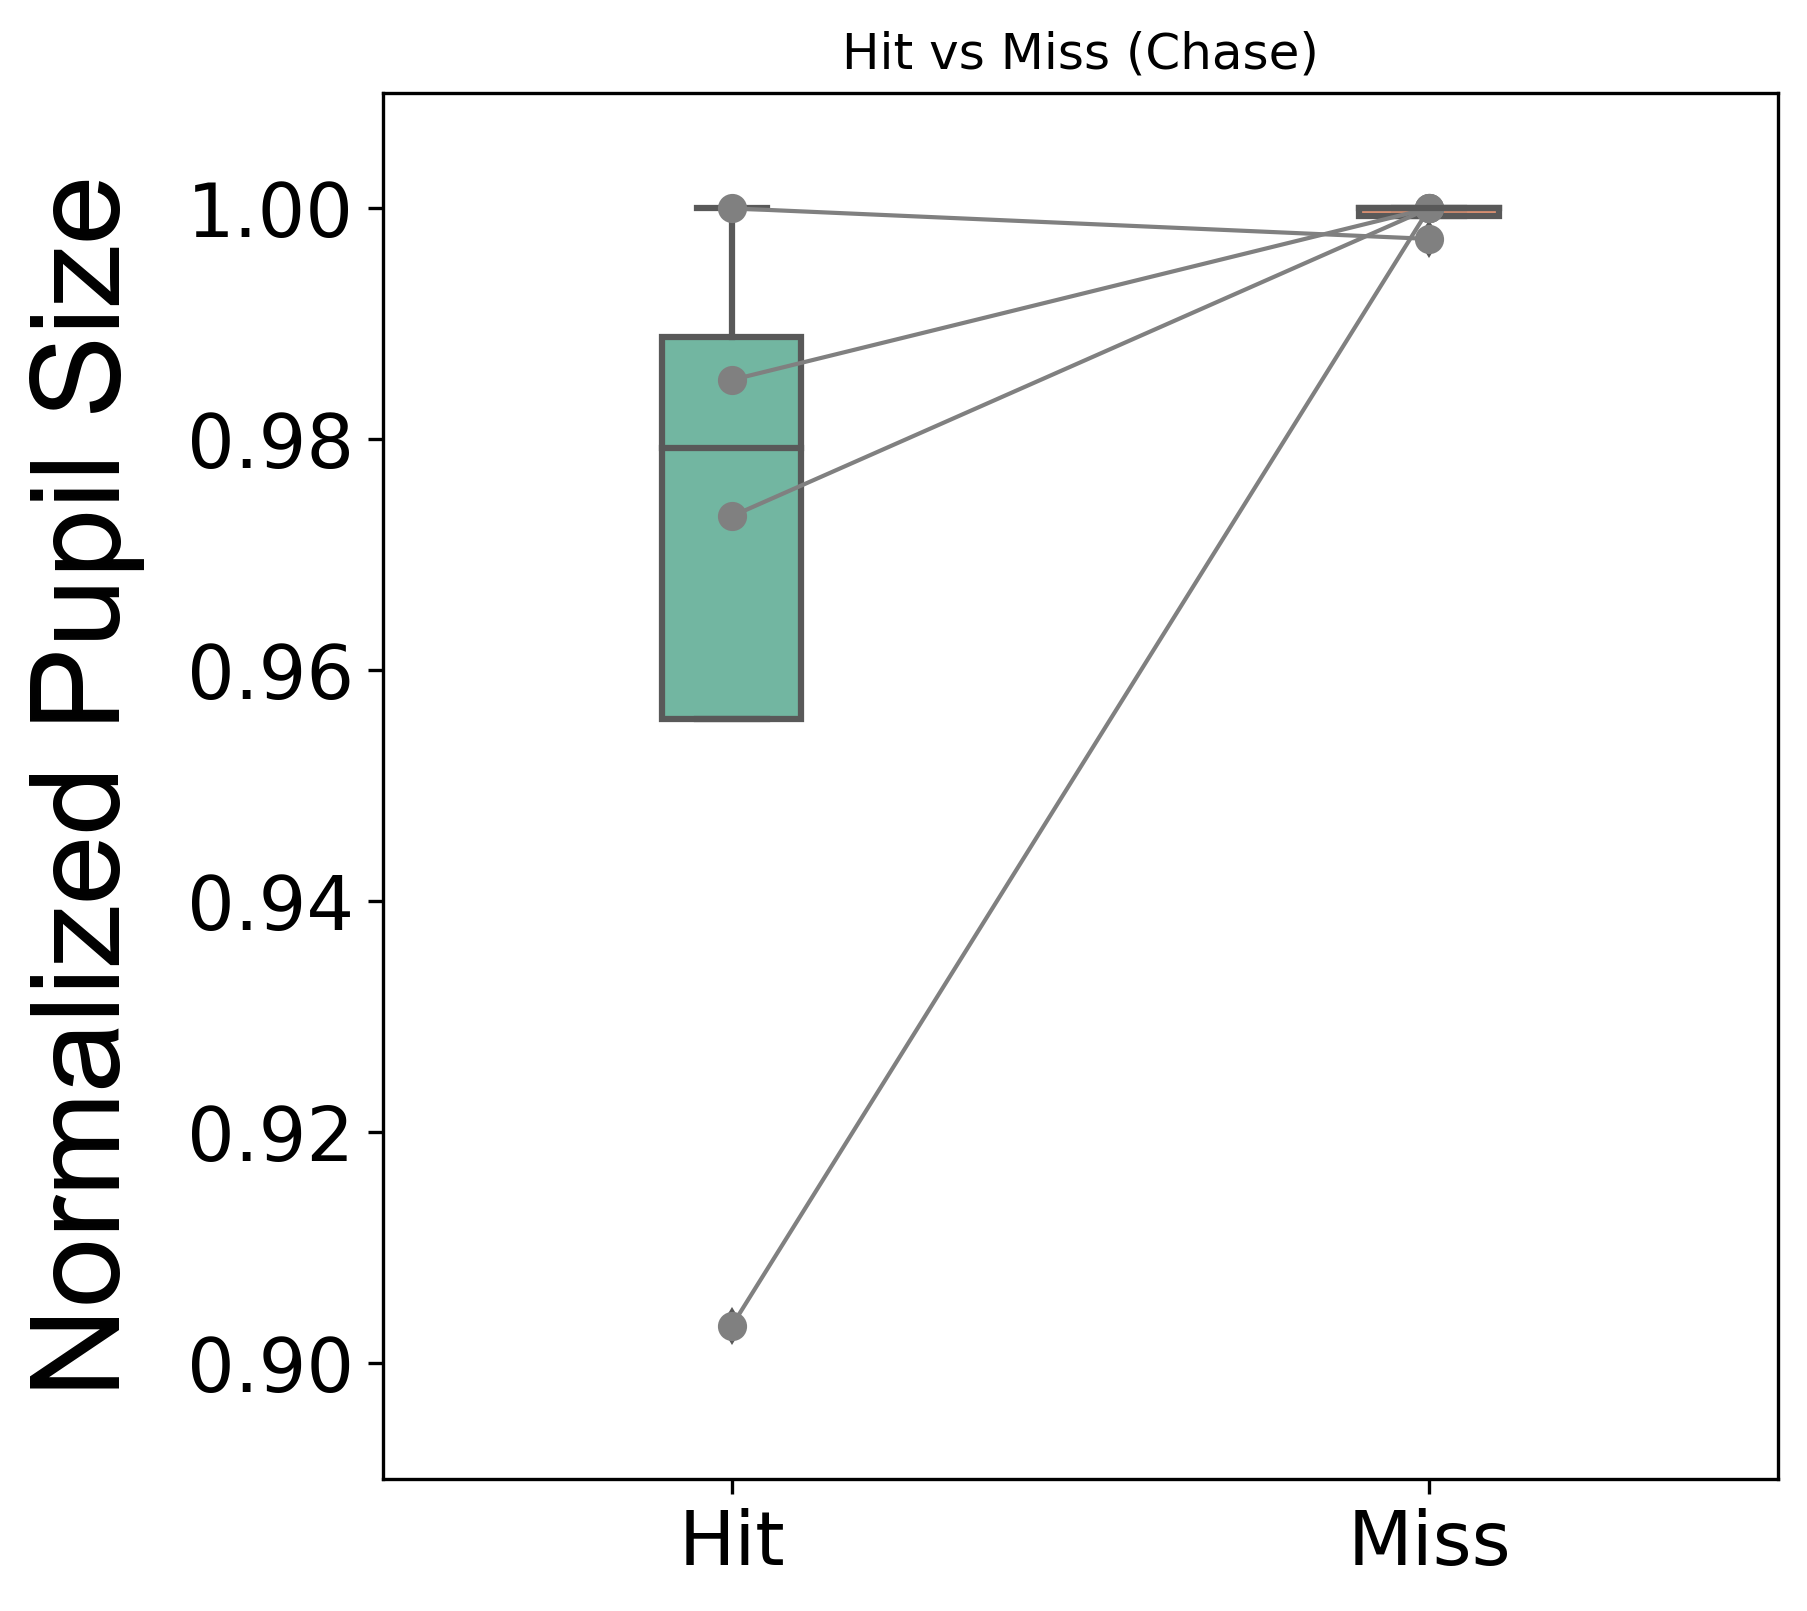

In [58]:
# Chase
time_bins = [-5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
 -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.50000000e-01,
 -1.00000000e-01, -5.00000000e-02, -1.11022302e-16]

mean_hit_chase_days = [1.2229834903261698, 1.3361961961577435, 1.3320687169291625, 1.4569946906820226]
mean_miss_chase_days = [1.3540189717027915, 1.3326576381935682, 1.3521597523353237, 1.4969025233301791]

mean_hit_chase = np.mean(mean_hit_chase_days)
mean_miss_chase = np.mean(mean_miss_chase_days)

print(f'Chase mean hit {mean_hit_chase} and mean miss {mean_miss_chase}')

median_hit_chase = np.median(mean_hit_chase_days)
median_miss_chase = np.median(mean_miss_chase_days)

print(f'Chase median hit {median_hit_chase} and mean miss {median_miss_chase}')

# Function to normalize the hit and miss values for each day
def normalize_pair(hit, miss):
    max_value = max(hit, miss)
    return hit / max_value, miss / max_value

# Apply the normalization function to each day's values
normalized_hit_chase_days = []
normalized_miss_chase_days = []

for hit, miss in zip(mean_hit_chase_days, mean_miss_chase_days):
    normalized_hit, normalized_miss = normalize_pair(hit, miss)
    normalized_hit_chase_days.append(normalized_hit)
    normalized_miss_chase_days.append(normalized_miss)

# Convert lists to pandas Series
normalized_hit_chase_days = pd.Series(normalized_hit_chase_days)
normalized_miss_chase_days = pd.Series(normalized_miss_chase_days)

# Assuming mean_hit_cole_days and mean_miss_cole_days are pandas Series
chase_hit_miss = pd.DataFrame({
    'day': ['day_9', 'day_10', 'day_11', 'day_12'],
    'hit': normalized_hit_chase_days.values,
    'miss': normalized_miss_chase_days.values
})

# Melt the DataFrame for easier plotting
melted_data = chase_hit_miss.melt(id_vars='day', value_vars=['hit', 'miss'], var_name='condition', value_name='pupil_size')


fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

# Create the box plot
sns.boxplot(x='condition', y='pupil_size', data=melted_data, palette='Set2', width=0.2, ax=ax)

# Add paired dots with lines for each day
for day in chase_hit_miss['day']:
    day_data = chase_hit_miss[chase_hit_miss['day'] == day]
    # Offset the x positions for hit and miss
    x_hit = 0
    x_miss = 1
    ax.plot([x_hit, x_miss], day_data[['hit', 'miss']].values[0], color='gray', linestyle='-', linewidth=1, marker='o')

# Customize the plot
ax.set_title('Hit vs Miss (Chase)')

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('', labelpad=10, size=30, family='Arial')
ax.set_ylabel('Normalized Pupil Size', labelpad=10, size=30, family='Arial')

ax.set_ylim(0.89, 1.01)
plt.xticks([0, 1], ['Hit', 'Miss'])



calvin mean hit 1.6232809402762103 and mean miss 1.6839176883848925


([<matplotlib.axis.XTick at 0x7f79d047f790>,
 [Text(0, 0, 'Hit'), Text(1, 0, 'Miss')])

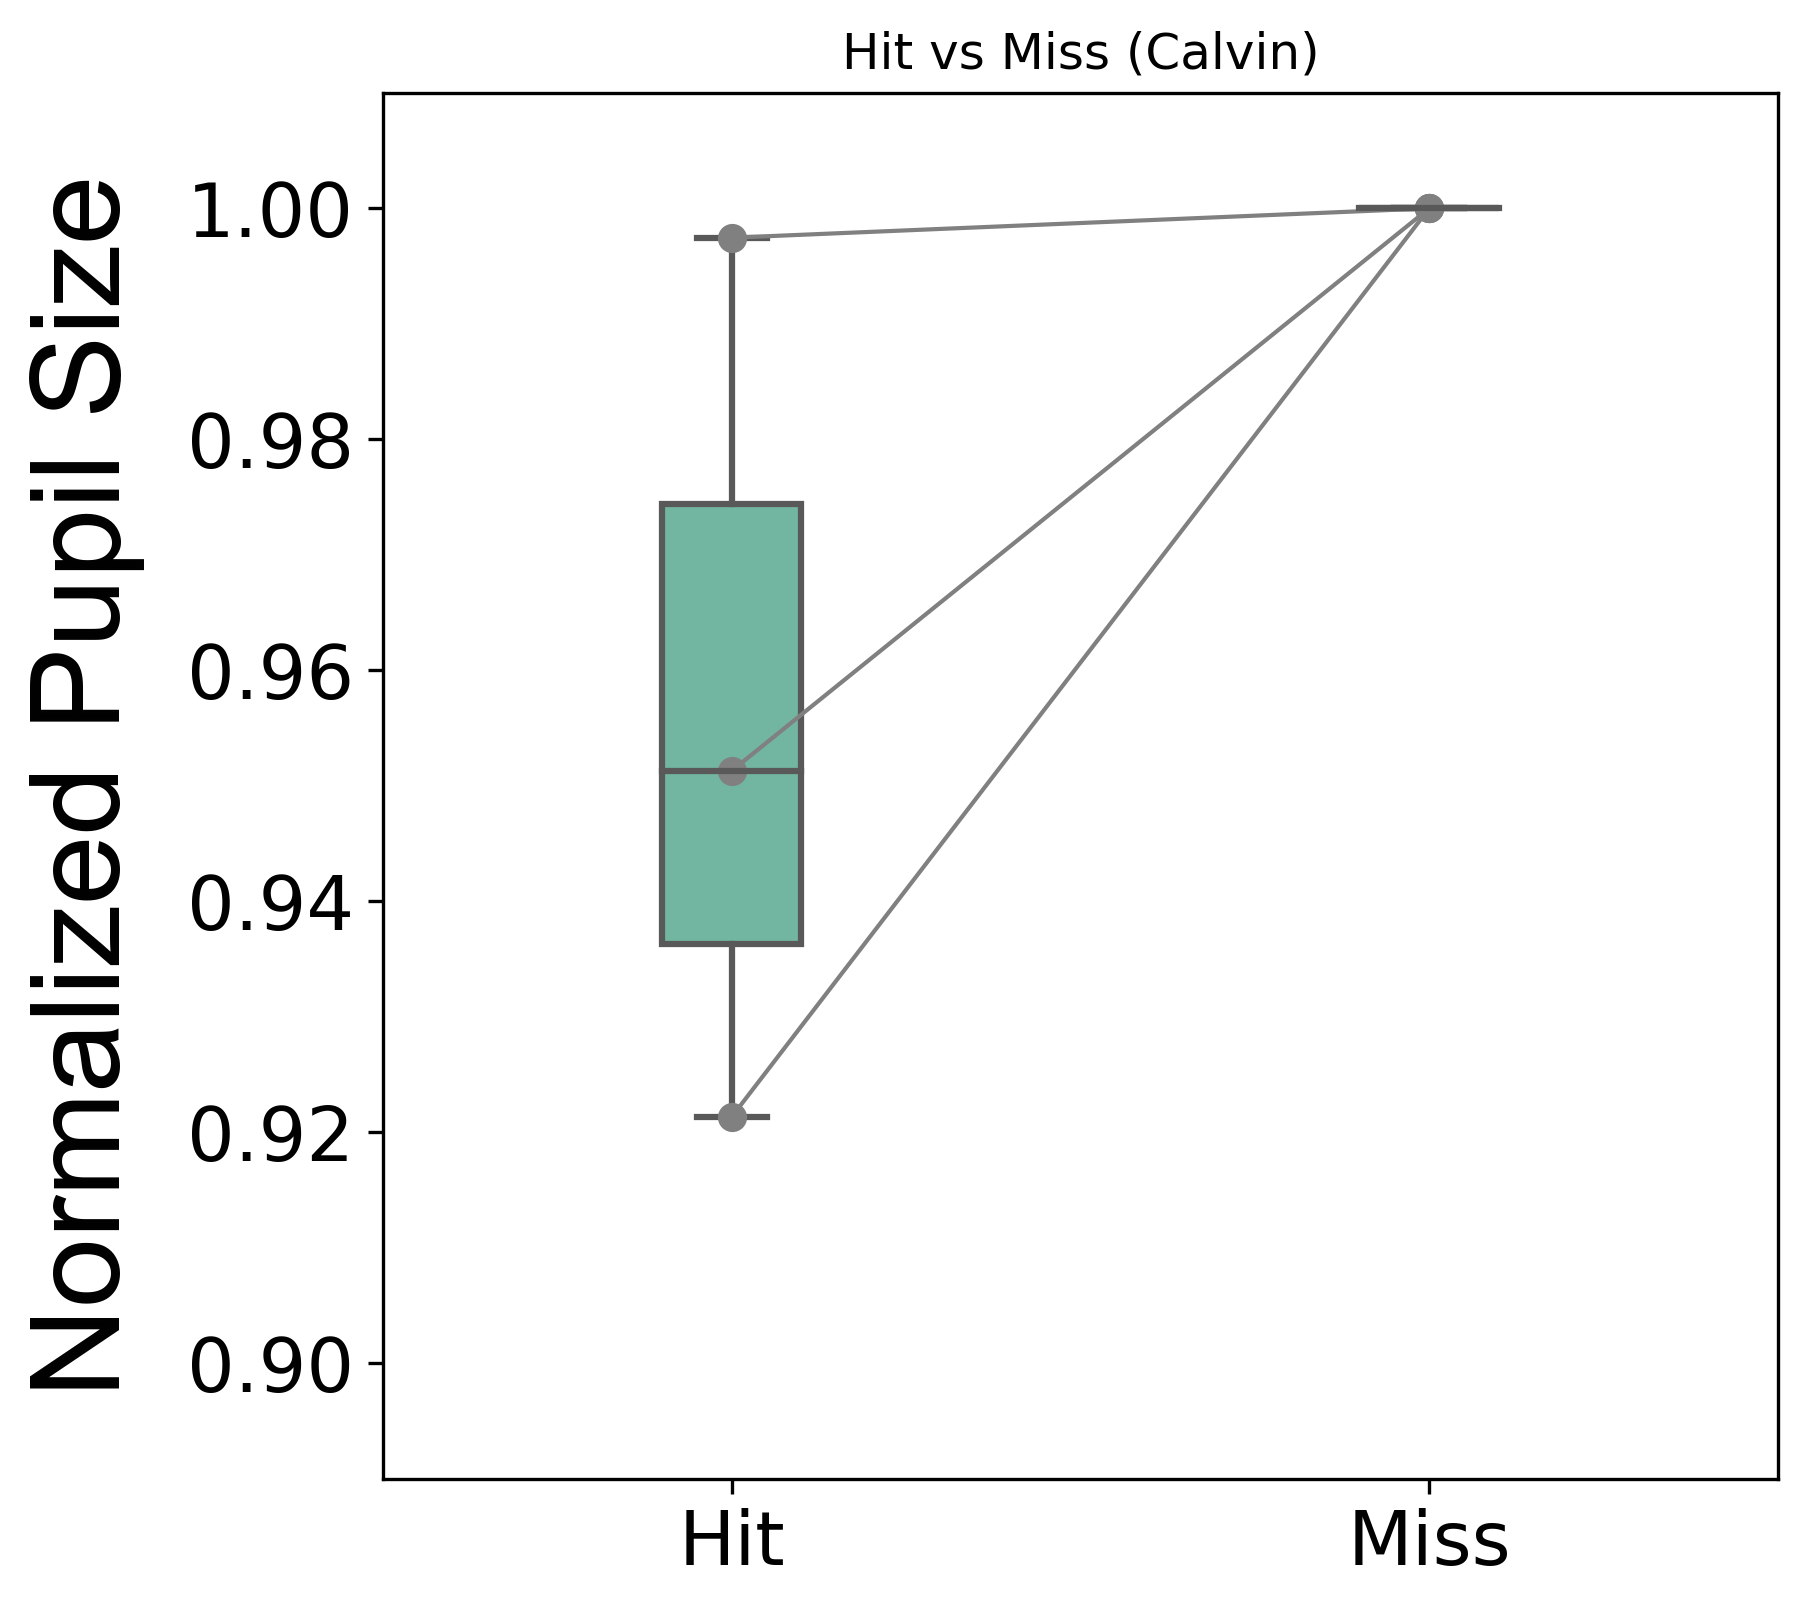

In [33]:
# Calvin
time_bins = [-5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
 -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.50000000e-01,
 -1.00000000e-01, -5.00000000e-02, -1.11022302e-16]

mean_hit_calvin_days =  [2.221359249834857, 1.4588550556380433, 1.1896285153557307]
mean_miss_calvin_days = [2.2270251410498676, 1.5335347609632601, 1.2911931631415503]

mean_hit_calvin = np.mean(mean_hit_calvin_days)
mean_miss_calvin = np.mean(mean_miss_calvin_days)

print(f'calvin mean hit {mean_hit_calvin} and mean miss {mean_miss_calvin}')



# Function to normalize the hit and miss values for each day
def normalize_pair(hit, miss):
    max_value = max(hit, miss)
    return hit / max_value, miss / max_value

# Apply the normalization function to each day's values
normalized_hit_calvin_days = []
normalized_miss_calvin_days = []

for hit, miss in zip(mean_hit_calvin_days, mean_miss_calvin_days):
    normalized_hit, normalized_miss = normalize_pair(hit, miss)
    normalized_hit_calvin_days.append(normalized_hit)
    normalized_miss_calvin_days.append(normalized_miss)

# Convert lists to pandas Series
normalized_hit_calvin_days = pd.Series(normalized_hit_calvin_days)
normalized_miss_calvin_days = pd.Series(normalized_miss_calvin_days)

# Assuming mean_hit_cole_days and mean_miss_cole_days are pandas Series
calvin_hit_miss = pd.DataFrame({
    'day': ['day_9', 'day_10', 'day_11'],
    'hit': normalized_hit_calvin_days.values,
    'miss': normalized_miss_calvin_days.values
})

# Melt the DataFrame for easier plotting
melted_data = calvin_hit_miss.melt(id_vars='day', value_vars=['hit', 'miss'], var_name='condition', value_name='pupil_size')


fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

# Create the box plot
sns.boxplot(x='condition', y='pupil_size', data=melted_data, palette='Set2', width=0.2, ax=ax)

# Add paired dots with lines for each day
for day in calvin_hit_miss['day']:
    day_data = calvin_hit_miss[calvin_hit_miss['day'] == day]
    # Offset the x positions for hit and miss
    x_hit = 0
    x_miss = 1
    ax.plot([x_hit, x_miss], day_data[['hit', 'miss']].values[0], color='gray', linestyle='-', linewidth=1, marker='o')

# Customize the plot
ax.set_title('Hit vs Miss (Calvin)')

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('', labelpad=10, size=30, family='Arial')
ax.set_ylabel('Normalized Pupil Size', labelpad=10, size=30, family='Arial')

ax.set_ylim(0.89, 1.01)
plt.xticks([0, 1], ['Hit', 'Miss'])



Text(0.05, 0.95, 'n = 3')

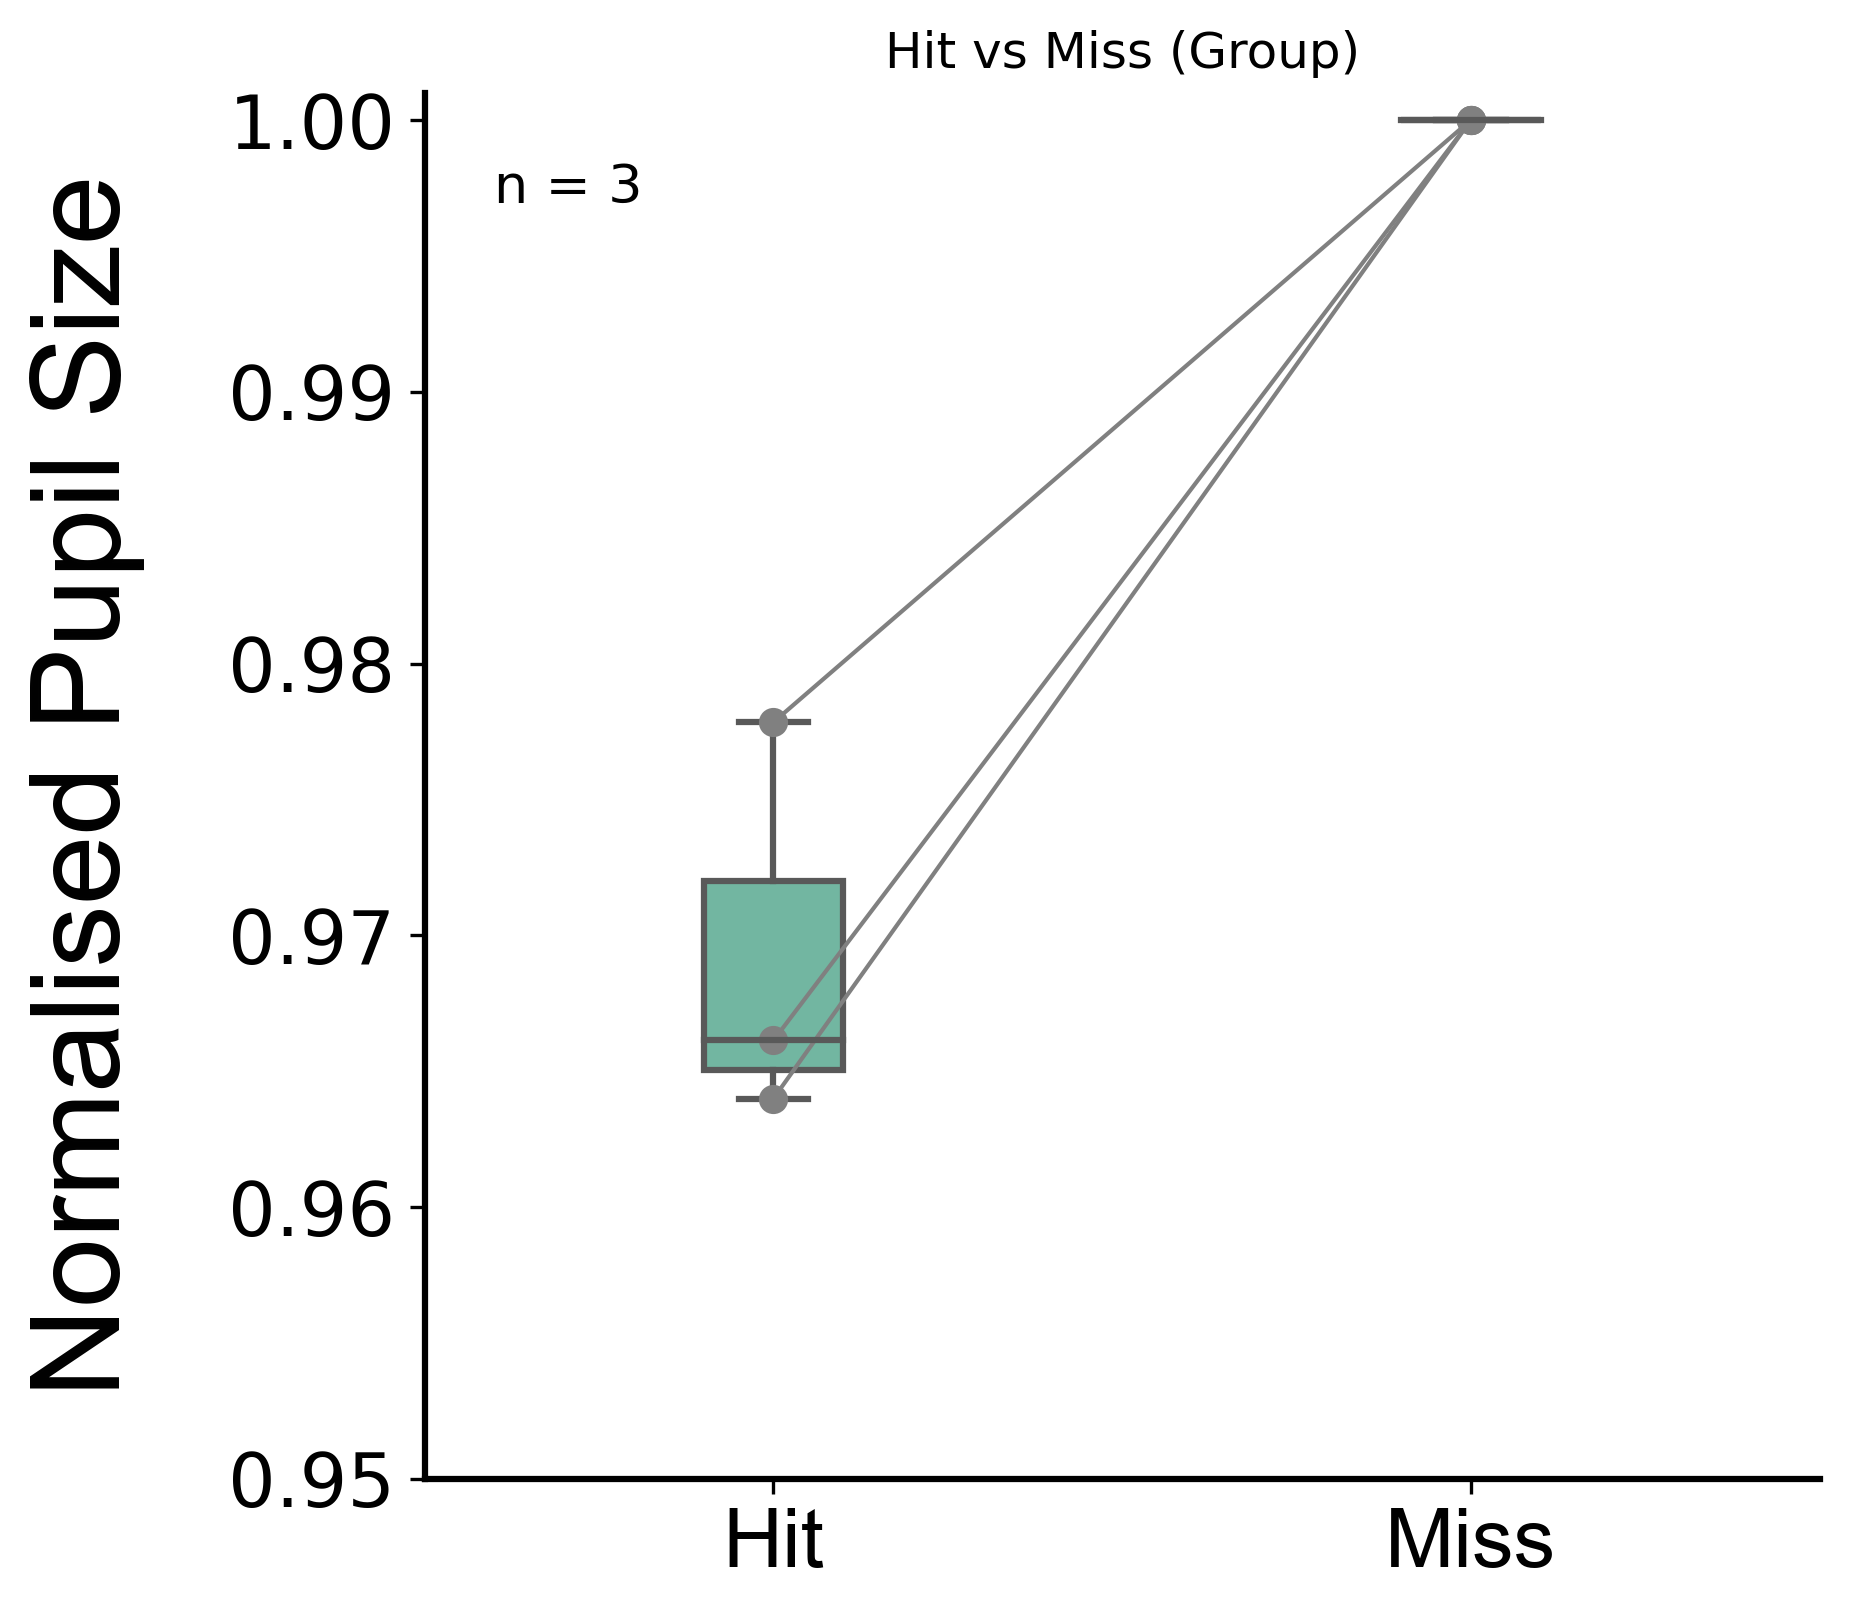

In [97]:
# Group
proficient_hit = [1.5057081606300167, 1.3370607735237747, 1.6232809402762103]
proficient_miss = [1.5398318403923172, 1.3839347213904656, 1.6839176883848925]


time_bins = [-5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
 -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.50000000e-01,
 -1.00000000e-01, -5.00000000e-02, -1.11022302e-16]


# Function to normalize the hit and miss values for each day
def normalize_pair(hit, miss):
    max_value = max(hit, miss)
    return hit / max_value, miss / max_value

# Apply the normalization function to each day's values
normalized_hit_mice = []
normalized_miss_mice = []

for hit, miss in zip(proficient_hit, proficient_miss):
    normalized_hit, normalized_miss = normalize_pair(hit, miss)
    normalized_hit_mice.append(normalized_hit)
    normalized_miss_mice.append(normalized_miss)

# Convert lists to pandas Series
normalized_hit_mice = pd.Series(normalized_hit_mice)
normalized_miss_mice = pd.Series(normalized_miss_mice)

# Assuming mean_hit_cole_days and mean_miss_cole_days are pandas Series
group_hit_miss = pd.DataFrame({
    'day': ['day_9', 'day_10', 'day_11'],
    'hit': normalized_hit_mice.values,
    'miss': normalized_miss_mice.values
})

# Melt the DataFrame for easier plotting
melted_data = group_hit_miss.melt(id_vars='day', value_vars=['hit', 'miss'], var_name='condition', value_name='pupil_size')


fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

# Create the box plot
sns.boxplot(x='condition', y='pupil_size', data=melted_data, palette='Set2', width=0.2, ax=ax)

# Add paired dots with lines for each day
for day in group_hit_miss['day']:
    day_data = group_hit_miss[group_hit_miss['day'] == day]
    # Offset the x positions for hit and miss
    x_hit = 0
    x_miss = 1
    ax.plot([x_hit, x_miss], day_data[['hit', 'miss']].values[0], color='gray', linestyle='-', linewidth=1, marker='o')

# Customize the plot
ax.set_title('Hit vs Miss (Group)')

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('', labelpad=10, size=30, family='Arial')
ax.set_ylabel('Normalised Pupil Size', labelpad=20, size=30, family='Arial')

ax.set_ylim(0.95, 1.001)
plt.xticks([0, 1], ['Hit', 'Miss'], size=20, family='Arial')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

In [62]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(proficient_hit, proficient_miss)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')

# Calculate mean and standard error of the mean (SEM) for hit and miss
mean_hit = group_hit_miss['hit'].mean()
sem_hit = group_hit_miss['hit'].sem()

mean_miss = group_hit_miss['miss'].mean()
sem_miss = group_hit_miss['miss'].sem()

median_hit = group_hit_miss['hit'].median()
median_miss = group_hit_miss['miss'].median()

print("Mean of group hit:", mean_hit)
print("SEM of group hit:", sem_hit)
print("Mean of group miss:", mean_miss)
print("SEM of group miss:", sem_miss)

print("Median of group hit:", median_hit)
print("Median of group miss:", median_miss)

Wilcoxon signed-rank test statistic: 0.0, p-value: 0.25
Mean of group hit: 0.9693199864551384
SEM of group hit: 0.004304212859594331
Mean of group miss: 1.0
SEM of group miss: 0.0
Median of group hit: 0.9661299430224601
Median of group miss: 1.0


In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_cole_pupil_hit = pd.DataFrame()

df_cole_pupil_hit['timestamp'] = [-0.25, -0.15, -0.05,  0.05,  0.15,  0.25 , 0.35 , 0.45 , 0.55 ,0.65 , 0.75,  0.85,
  0.95 , 1.05]

df_cole_pupil_hit['day_9'] = [1.89434064, 1.89431435, 1.89689954, 1.89666232, 1.89418265, 1.89113867,
 1.89554395, 1.89254315, 1.91793752, 1.92764432, 1.93389755, 1.93736633,
 1.94234288 ,1.93529462]

df_cole_pupil_hit['day_10'] = [1.20321141, 1.2004646,  1.20203091, 1.20256814, 1.20212687, 1.19962358,
 1.20414822, 1.23276088, 1.30345214, 1.34218487, 1.31767499, 1.28171438,
 1.24521076, 1.22846127]

df_cole_pupil_hit['day_12'] = [1.39829169, 1.39840688, 1.40185309 ,1.4002172,  1.3977206 , 1.40155377,
 1.40576216, 1.43851336, 1.48263759, 1.50191024 ,1.48161733 ,1.45801319,
 1.43421717, 1.42975156]

df_cole_pupil_hit['day_13'] =  [1.52322621, 1.52044501 ,1.52338926, 1.52644371,1.52698759, 1.52715269,
 1.52752068, 1.56613467 ,1.59771243, 1.596163 ,  1.56471062 ,1.53676531,
 1.50424773, 1.50867737]

# Filter the rows where before Vstim
filtered_df = df_cole_pupil_hit[df_cole_pupil_hit['timestamp'] < 0]
# Calculate the mean pupil size for each day
mean_hit_cole_days = filtered_df[['day_9', 'day_10', 'day_12', 'day_13']].mean()

print(f'mean_hit_cole_days is {np.array(mean_hit_cole_days)}')

mean_hit_cole_days is [1.89518484 1.20190231 1.39951722 1.52235349]


In [37]:
df_cole_pupil_miss = pd.DataFrame()

df_cole_pupil_miss['timestamp'] = [-0.25, -0.15, -0.05,  0.05,  0.15,  0.25 , 0.35 , 0.45 , 0.55 ,0.65 , 0.75,  0.85,
  0.95 , 1.05]

df_cole_pupil_miss['day_9'] = [1.97099266, 1.97088979, 1.97500841, 1.97309703, 1.97305337, 1.96282965,
 1.96443683, 1.9519925,  1.94532809, 1.94466463, 1.94951317, 1.95673978,
 1.95654519, 1.96245992]

df_cole_pupil_miss['day_10'] = [1.21343869, 1.21403484, 1.21851267, 1.21785983, 1.22133822, 1.21417606,
 1.2315192 , 1.21774033, 1.22246082 ,1.22844041 ,1.21556403 ,1.22277674,
 1.21759065 ,1.22592867]

df_cole_pupil_miss['day_12'] = [1.44470053, 1.44824722, 1.44881297, 1.44748888, 1.44942119, 1.45487053,
 1.45659461, 1.45373306, 1.45358727 ,1.45081637, 1.45597123 ,1.45172484,
 1.45232306, 1.44774583]

df_cole_pupil_miss['day_13'] =  [1.52665475, 1.52943002, 1.52334766, 1.52824815, 1.52429704, 1.52482401,
 1.52511745, 1.529232 ,  1.53217076, 1.53202173, 1.52926163 ,1.52940169,
 1.52921166 ,1.53034382]

# Filter the rows where before Vstim
filtered_df = df_cole_pupil_miss[df_cole_pupil_miss['timestamp'] < 0]
# Calculate the mean pupil size for each day
mean_miss_cole_days = filtered_df[['day_9', 'day_10', 'day_12', 'day_13']].mean()

print(f'mean_miss_cole_days is {np.array(mean_miss_cole_days)}')

mean_miss_cole_days is [1.97229695 1.21532873 1.44725357 1.52647748]


In [39]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(mean_miss_cole_days, mean_hit_cole_days)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')

Wilcoxon signed-rank test statistic: 0.0, p-value: 0.125


# Hit vs Miss (Pupil size overall, binsize = 100ms)

## Individual Hit/Miss (ALign with Vstim) Figure 4b

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

name = 'Cole'
days = [9,10,12,13]
dates = ['01052024','02052024','06052024','07052024']
axis = ['x','y','y','y']
# Trial_type = 'miss'

# name = 'Chase'
# days = [7,8,9,10]
# dates = ['30042024','01052024','02052024','03052024']
# axis = ['y','y','y','y']
# Trial_type = 'miss'

# name = 'Calvin'
# days = [7,8,9]
# dates = ['30042024','01052024','02052024']
# axis = ['x','y','y']
# # Trial_type = 'miss'

Hit Cole
[-5.00000000e-01 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01
 -1.00000000e-01 -1.11022302e-16  1.00000000e-01  2.00000000e-01
  3.00000000e-01  4.00000000e-01  5.00000000e-01  6.00000000e-01
  7.00000000e-01  8.00000000e-01  9.00000000e-01  1.00000000e+00]
mean_pupil size is [0.94036749 0.93949589 0.93919829 0.93809896 0.93891546 0.93916177
 0.93927348 0.93829837 0.93874102 0.94512289 0.97245412 0.99356637
 0.99211259 0.97533452 0.96050129 0.95134415]
std_pupil size is [0.02170524 0.0225234  0.02228128 0.0222677  0.02139495 0.02280937
 0.0221014  0.0226164  0.02206824 0.01984511 0.01780278 0.01050631
 0.00900168 0.0008209  0.01208068 0.0196953 ]
median_pupil size is [0.94858558 0.947363   0.94645281 0.94495614 0.94588755 0.94693848
 0.94655322 0.9455465  0.94676809 0.95083837 0.96906662 0.9994445
 0.9951963  0.97526421 0.95946656 0.95111923]
Miss Cole
[-5.00000000e-01 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01
 -1.00000000e-01 -1.11022302e-16  1.00000000e-01  2.000000

<bound method Axes.legend of <AxesSubplot:title={'center':'Pupil size during Hit vs Miss Trials Cole '}, xlabel='Time from Vstim (s)', ylabel='Normalised Pupil Size'>>

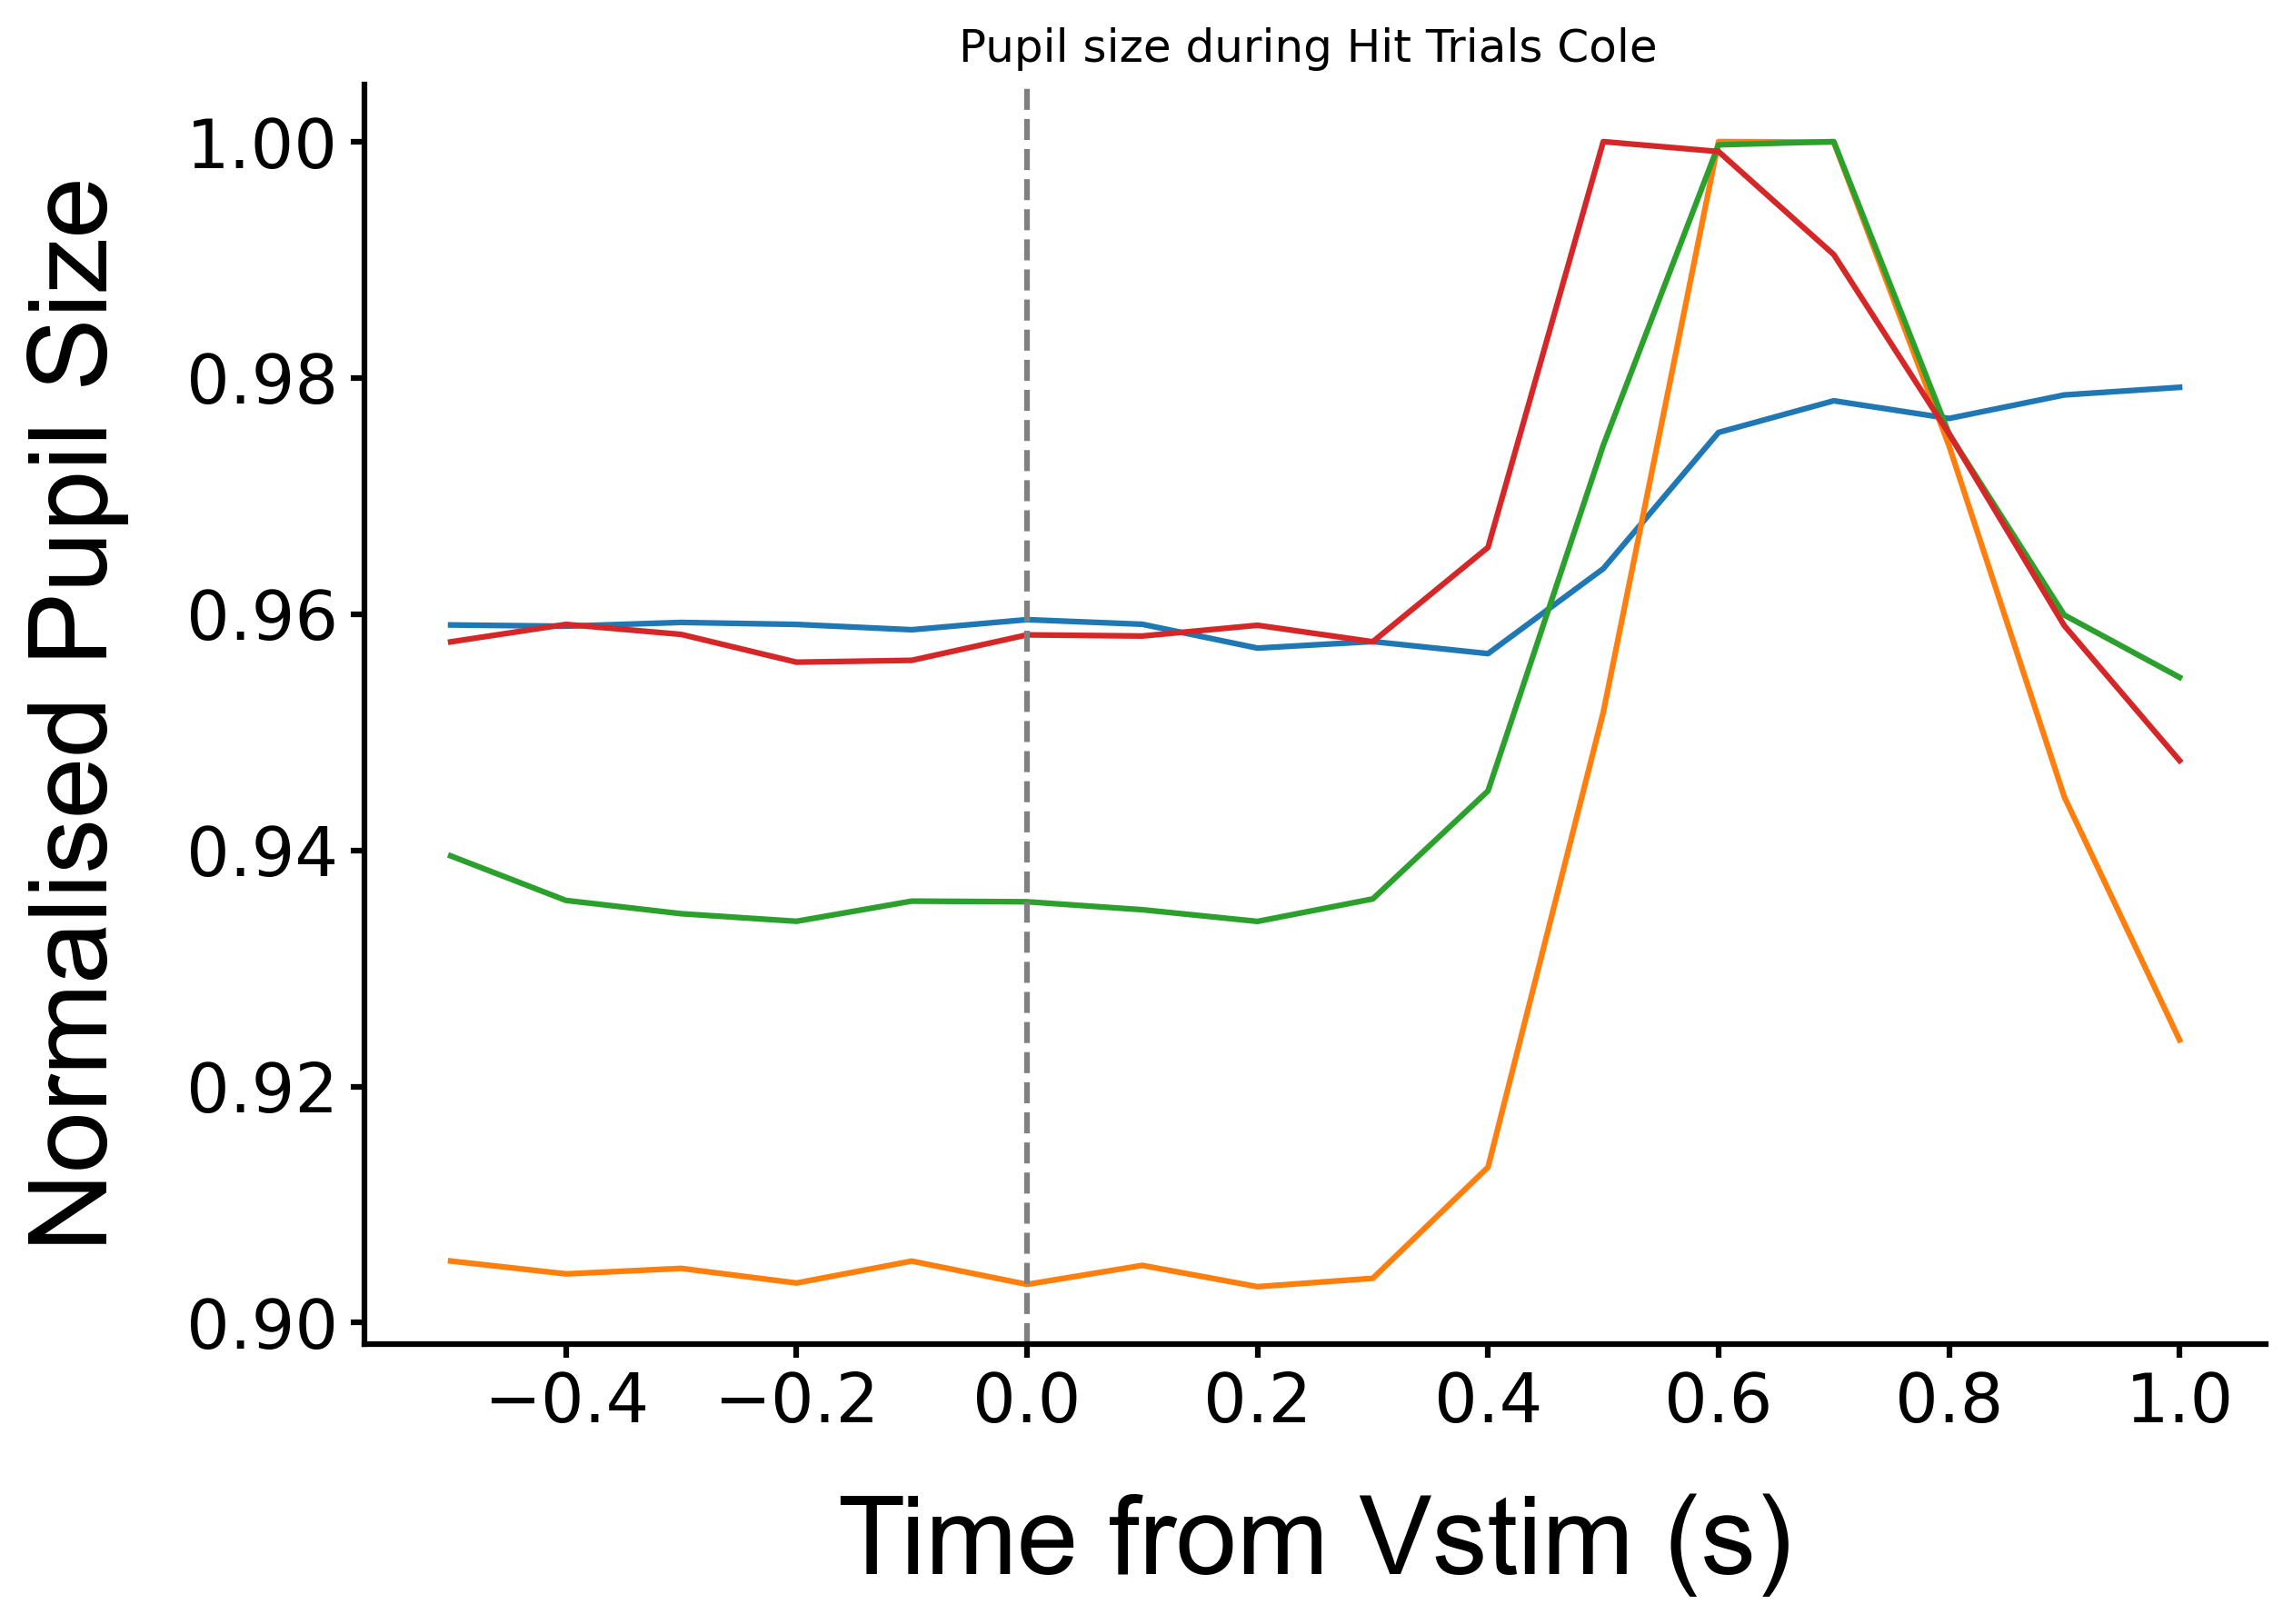

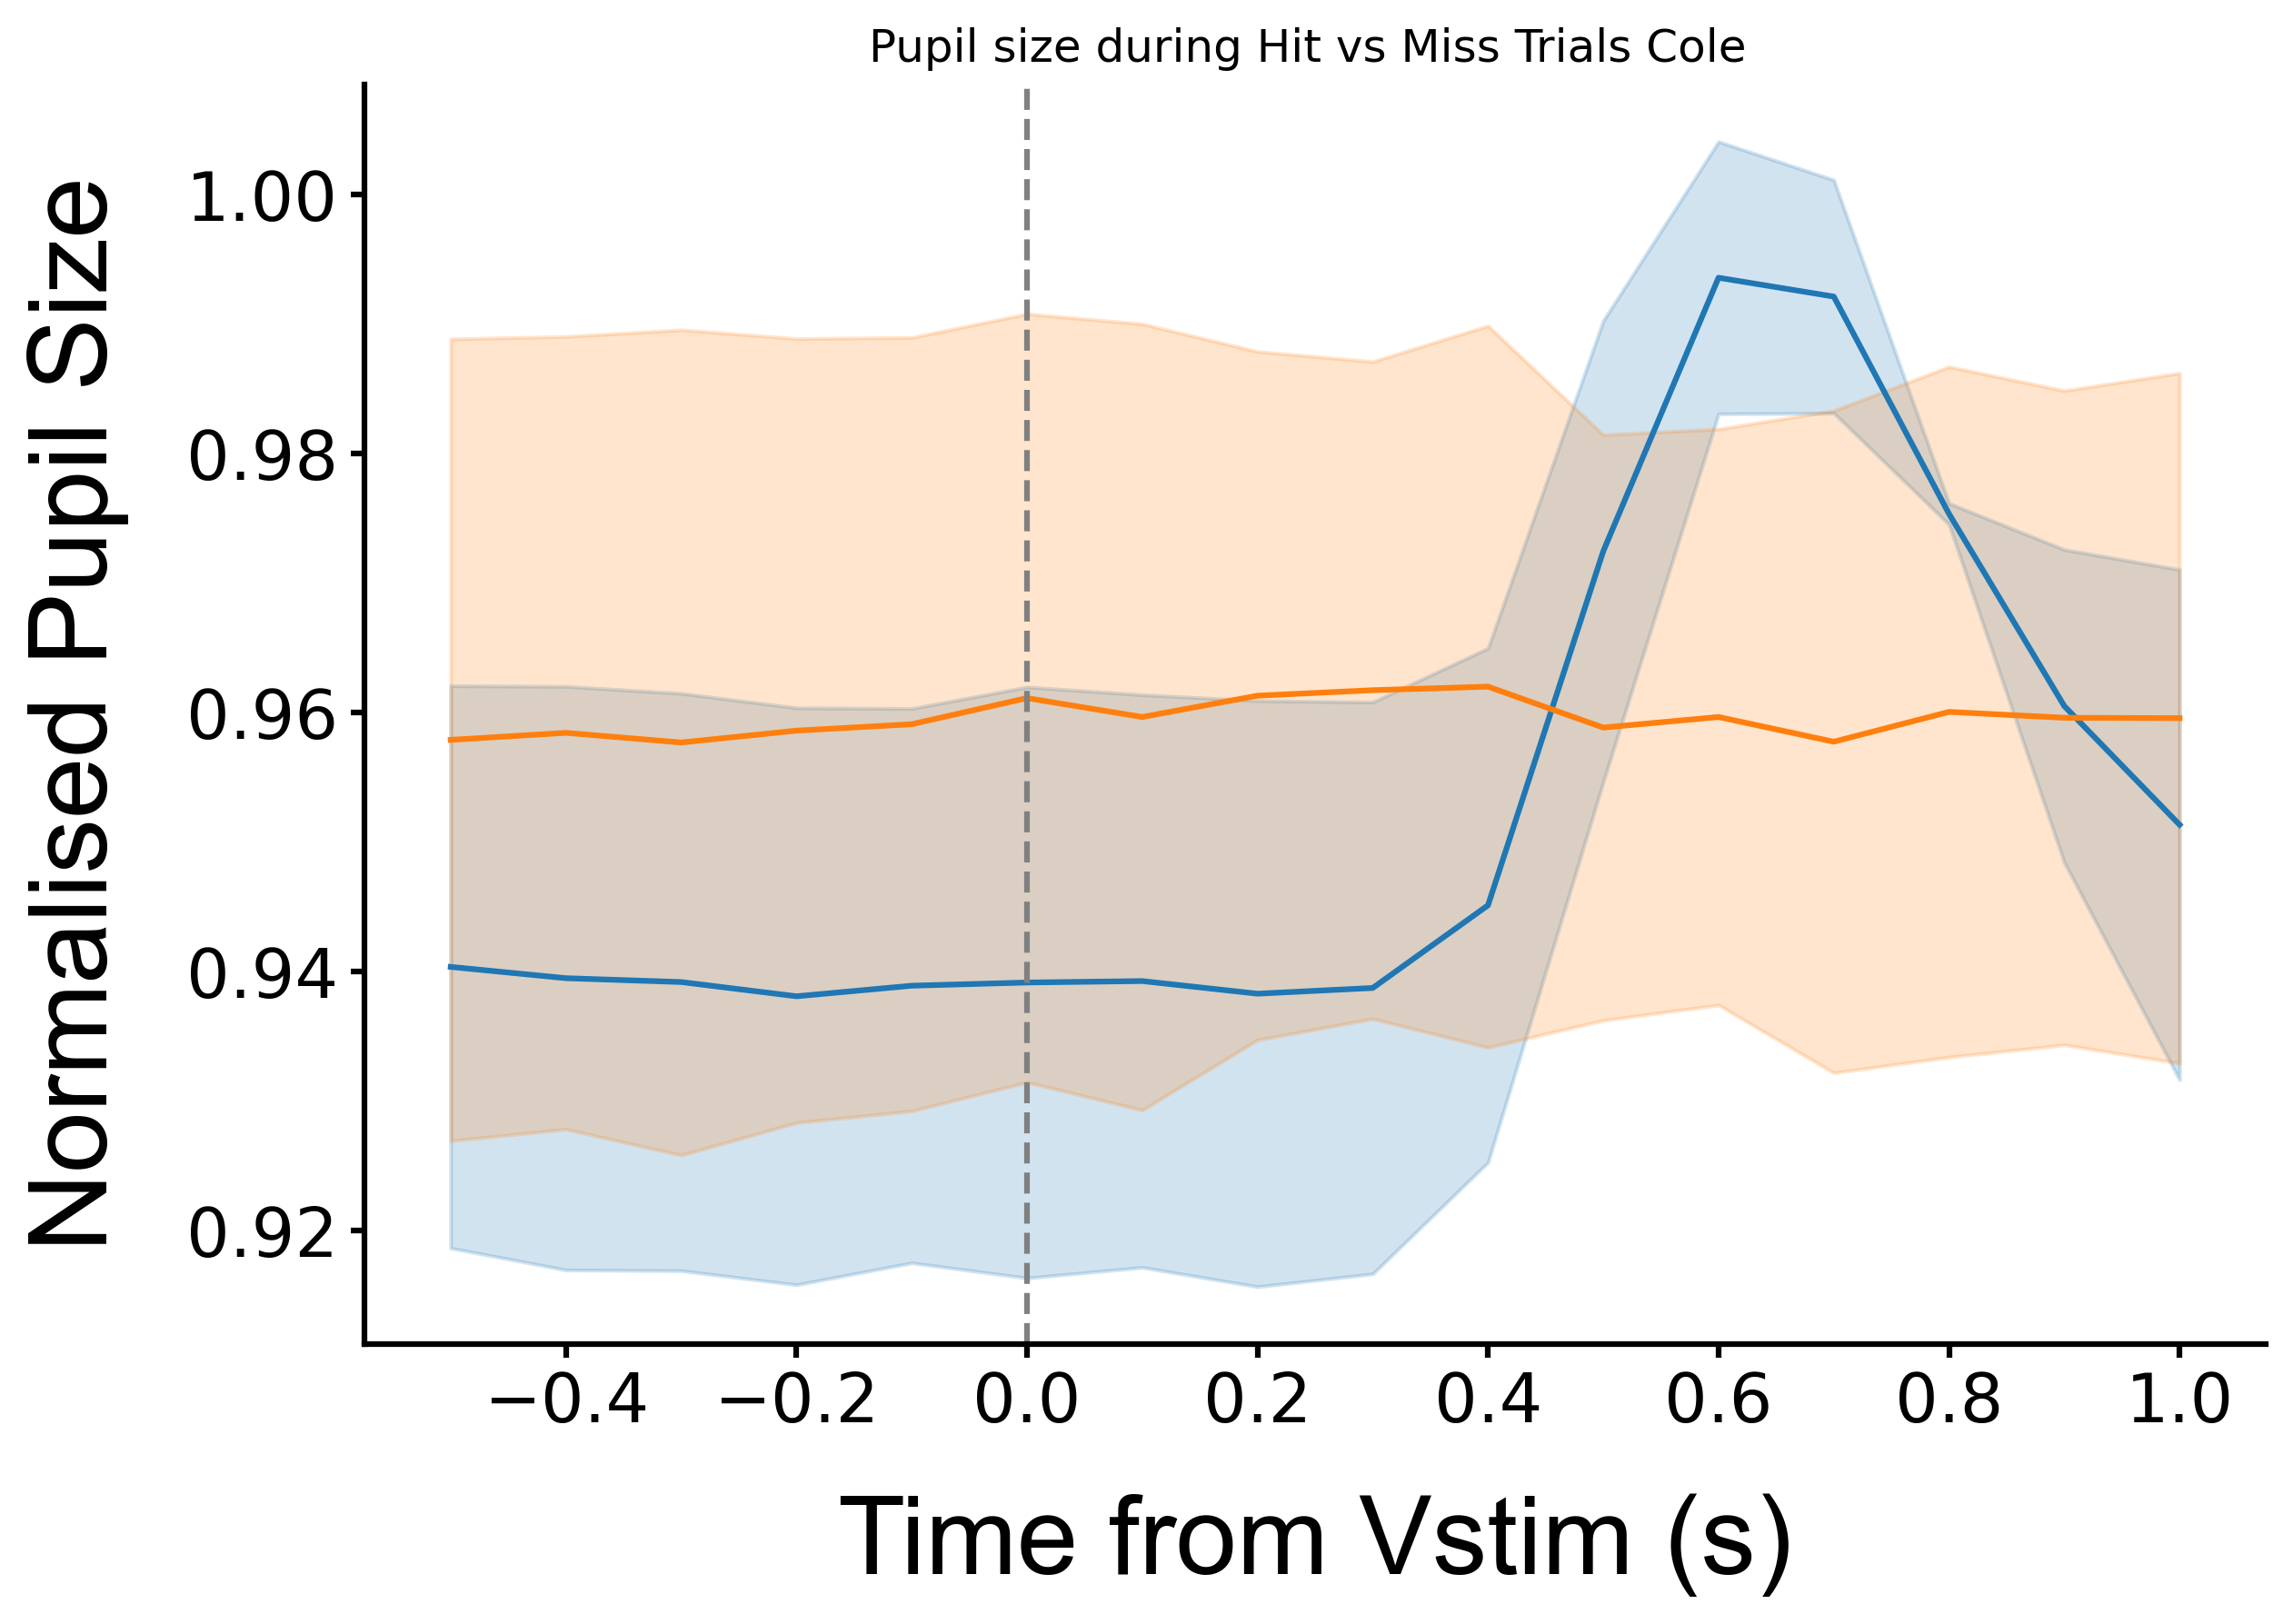

In [99]:
time_before_change = 0.5
duration = 1.5

bin_size = 0.1
time_bins = np.arange(0 - time_before_change, 1.1, bin_size)

dfs = {}  # Dictionary to store DataFrames for each day

# Store mean pupil size for each day
individul_pupil_hit = []
individul_pupil_miss = []

# plot mean
fig1, ax1 = plt.subplots(dpi=300)
fig2, ax2 = plt.subplots(dpi=300)
fig1.set_size_inches(9,6)
fig2.set_size_inches(9,6)

# Pupil
# Directory where CSV files are located
for day, date, axi in zip(days, dates, axis):
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Pupil'
    filename_pupil = f'New_Pupil_Data_{date}_Day{day}_{name}.csv'
    file_path = os.path.join(directory, filename_pupil)
    
    # Read CSV file
    df_pupil = pd.read_csv(file_path)
    df_pupil['x'] = df_pupil['x']/100
    df_pupil['y'] = df_pupil['y']/100
    # Store DataFrame in the dictionary with the day as the key
    dfs[day] = df_pupil

    if name == 'Cole': 
        if day == 9:
            df_pupil = df_pupil[df_pupil['x'] >= 1.3]

        elif day == 10:
            ranges = [(1053.1, 1053.4)]

            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        elif day == 12:
            ranges = [
                        (79.7,79.9),
                        (410.89, 411.1),
                        (338.4, 338.5),
                        (1029.2, 1029.6),
                        (1487.5, 1487.9)
                    ]
            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        else:
            df_pupil = df_pupil

    # Read Trial Vstim Presentation
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_Table'
    filename_vstim = f'New_trial_table_Day{day}_{date}_{name}.csv'
    file_path = os.path.join(directory, filename_vstim)
    df = pd.read_csv(file_path)
    day = int(day)

    #Hit
    hit_df = df[df['hit'] == 1].reset_index(drop=True)
    start_times_hit = hit_df['stim_start_time'] - time_before_change 
    end_times_hit = start_times_hit + duration
    df_start_end_hit = pd.DataFrame()
    df_start_end_hit['start_time'] = start_times_hit
    df_start_end_hit['end_time'] = end_times_hit
    df_start_end_hit = df_start_end_hit.iloc[:]

    #Miss
    miss_df = df[df['miss'] == 1].reset_index(drop=True)
    start_times_miss = miss_df['stim_start_time'] - time_before_change
    end_times_miss = start_times_miss + duration
    df_start_end_miss = pd.DataFrame()
    df_start_end_miss['start_time'] = start_times_miss
    df_start_end_miss['end_time'] = end_times_miss
    df_start_end_miss = df_start_end_miss.iloc[:]

    # Align pupil to trial time
    # Initialize a list to store interpolated data for each trial
    interpolated_pupil_data_hit = []
    interpolated_pupil_data_miss = []

    #Hit
    for index, row in df_start_end_hit.iterrows():
        mask = (df_pupil['timestamp'] >= row['start_time']) & (df_pupil['timestamp'] <= row['end_time'])
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - row['start_time']
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows['y'].empty:  # Check if 'y' values are not empty
            # Interpolate pupil area data for the current trial
            interpolated_values_hit = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])

            interpolated_pupil_data_hit.append(interpolated_values_hit)

    # Mean pupil data on single day
    interpolated_data_hit = np.mean(interpolated_pupil_data_hit, axis=0)


    #Miss
    for index, row in df_start_end_miss.iterrows():
        mask = (df_pupil['timestamp'] >= row['start_time']) & (df_pupil['timestamp'] <= row['end_time'])
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - row['start_time']
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows['y'].empty:  # Check if 'y' values are not empty
            # Interpolate pupil area data for the current trial
            interpolated_values_miss = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])

            interpolated_pupil_data_miss.append(interpolated_values_miss)

    # Mean pupil data on single day
    interpolated_data_miss = np.mean(interpolated_pupil_data_miss, axis=0)


    # Apply normalization
    max_val_hit = np.max(interpolated_data_hit)
    max_val_miss = np.max(interpolated_data_miss)
    if max_val_hit > max_val_miss:
        normalized_interpolated_data_hit = interpolated_data_hit /max_val_hit
        normalized_interpolated_data_miss = interpolated_data_miss /max_val_hit
    else:
        normalized_interpolated_data_hit = interpolated_data_hit /max_val_miss
        normalized_interpolated_data_miss = interpolated_data_miss /max_val_miss

    ax1.plot(time_bins, normalized_interpolated_data_hit)
    ax2.plot(time_bins, normalized_interpolated_data_miss)

    # Store mean pupil data in each day
    individul_pupil_hit.append(normalized_interpolated_data_hit)
    individul_pupil_miss.append(normalized_interpolated_data_miss)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax1.spines['left'].set_linewidth(1.5)
ax1.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax1.set_title(f'Pupil size during Hit Trials {name} ')
ax1.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax1.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax1.tick_params(axis='x', labelsize=18, width=1.5)
ax1.tick_params(axis='y', labelsize=18, width=1.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax2.spines['left'].set_linewidth(1.5)
ax2.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax2.set_title(f'Pupil size during Miss Trials {name} ')
ax2.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax2.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax2.tick_params(axis='x', labelsize=18, width=1.5)
ax2.tick_params(axis='y', labelsize=18, width=1.5)


# plot mean hit
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot the mean of interpolated_data over time bins
mean_interpolated_data_hit = np.mean(individul_pupil_hit, axis=0)
ax.plot(time_bins, mean_interpolated_data_hit, color='#1f77b4', label='Mean') #blue Hit

# Calculate standard deviation of interpolated_data over time bins
std_interpolated_data_hit = np.std(individul_pupil_hit, axis=0)
median_interpolated_data_hit = np.median(individul_pupil_hit, axis=0)

print(f'Hit {name}')
print(time_bins)
print(f'mean_pupil size is {mean_interpolated_data_hit}')
print(f'std_pupil size is {std_interpolated_data_hit}')
print(f'median_pupil size is {median_interpolated_data_hit}')

# Shade between the error bars
ax.fill_between(time_bins, mean_interpolated_data_hit - std_interpolated_data_hit, mean_interpolated_data_hit + std_interpolated_data_hit, color='#1f77b4', alpha=0.2) # Blue hit

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax.set_title(f'Pupil size during Hit Trials {name} ')
ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)


# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot the mean of interpolated_data over time bins
mean_interpolated_data_miss = np.mean(individul_pupil_miss, axis=0)
ax.plot(time_bins, mean_interpolated_data_miss, color='#ff7f0e', label='Mean') # Orange miss

# Calculate standard deviation of interpolated_data over time bins
std_interpolated_data_miss = np.std(individul_pupil_miss, axis=0)
median_interpolated_data_miss = np.median(individul_pupil_miss, axis=0)

print(f'Miss {name}')
print(time_bins)
print(f'mean_pupil size is {mean_interpolated_data_miss}')
print(f'std_pupil size is {median_interpolated_data_miss}')

# Shade between the error bars
ax.fill_between(time_bins, mean_interpolated_data_miss - std_interpolated_data_miss, mean_interpolated_data_miss + std_interpolated_data_miss, color='#ff7f0e', alpha=0.2) # Orange miss

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax.set_title(f'Pupil size during Miss Trials {name} ')
ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)



# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot the mean of interpolated_data over time bins
ax.plot(time_bins, mean_interpolated_data_hit, color='#1f77b4', label='Hit') #blue Hit
ax.plot(time_bins, mean_interpolated_data_miss, color='#ff7f0e', label='Miss') # Orange miss

# Calculate standard deviation of interpolated_data over time bins
std_interpolated_data_miss = np.std(individul_pupil_miss, axis=0)
median_interpolated_data_miss = np.median(individul_pupil_miss, axis=0)

# Shade between the error bars
ax.fill_between(time_bins, mean_interpolated_data_hit - std_interpolated_data_hit, mean_interpolated_data_hit + std_interpolated_data_hit, color='#1f77b4', alpha=0.2) # Blue hit
ax.fill_between(time_bins, mean_interpolated_data_miss - std_interpolated_data_miss, mean_interpolated_data_miss + std_interpolated_data_miss, color='#ff7f0e', alpha=0.2) # Orange miss

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax.set_title(f'Pupil size during Hit vs Miss Trials {name} ')
ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)
ax.legend

## Group Hit vs Miss Figure 4b

Mean of group hit: [0.93874796 0.93897084 0.93860214 0.93744104 0.93741393 0.93726972
 0.93766255 0.93815479 0.93795497 0.94219694 0.95544095 0.96987767
 0.97744601 0.97285109 0.96768351 0.95952141]
Std of group hit: [0.00574731 0.00432782 0.00412091 0.00418585 0.00440134 0.00355462
 0.00384877 0.00323278 0.00306962 0.0025178  0.01203109 0.01675455
 0.01113237 0.01001706 0.01562673 0.01845002]
Mean of group miss: [0.96911638 0.96837522 0.96927033 0.97102665 0.97125873 0.97288103
 0.97244917 0.9732552  0.97328664 0.97270929 0.97095525 0.97178295
 0.97149743 0.97187301 0.97071366 0.97055866]
Std of group miss: [0.00804358 0.007232   0.00824531 0.00883813 0.00859938 0.00832641
 0.00906472 0.00859305 0.00825408 0.00768275 0.00857505 0.00861786
 0.00977863 0.00837112 0.00786371 0.00780376]


Text(0.05, 0.95, 'n = 3')

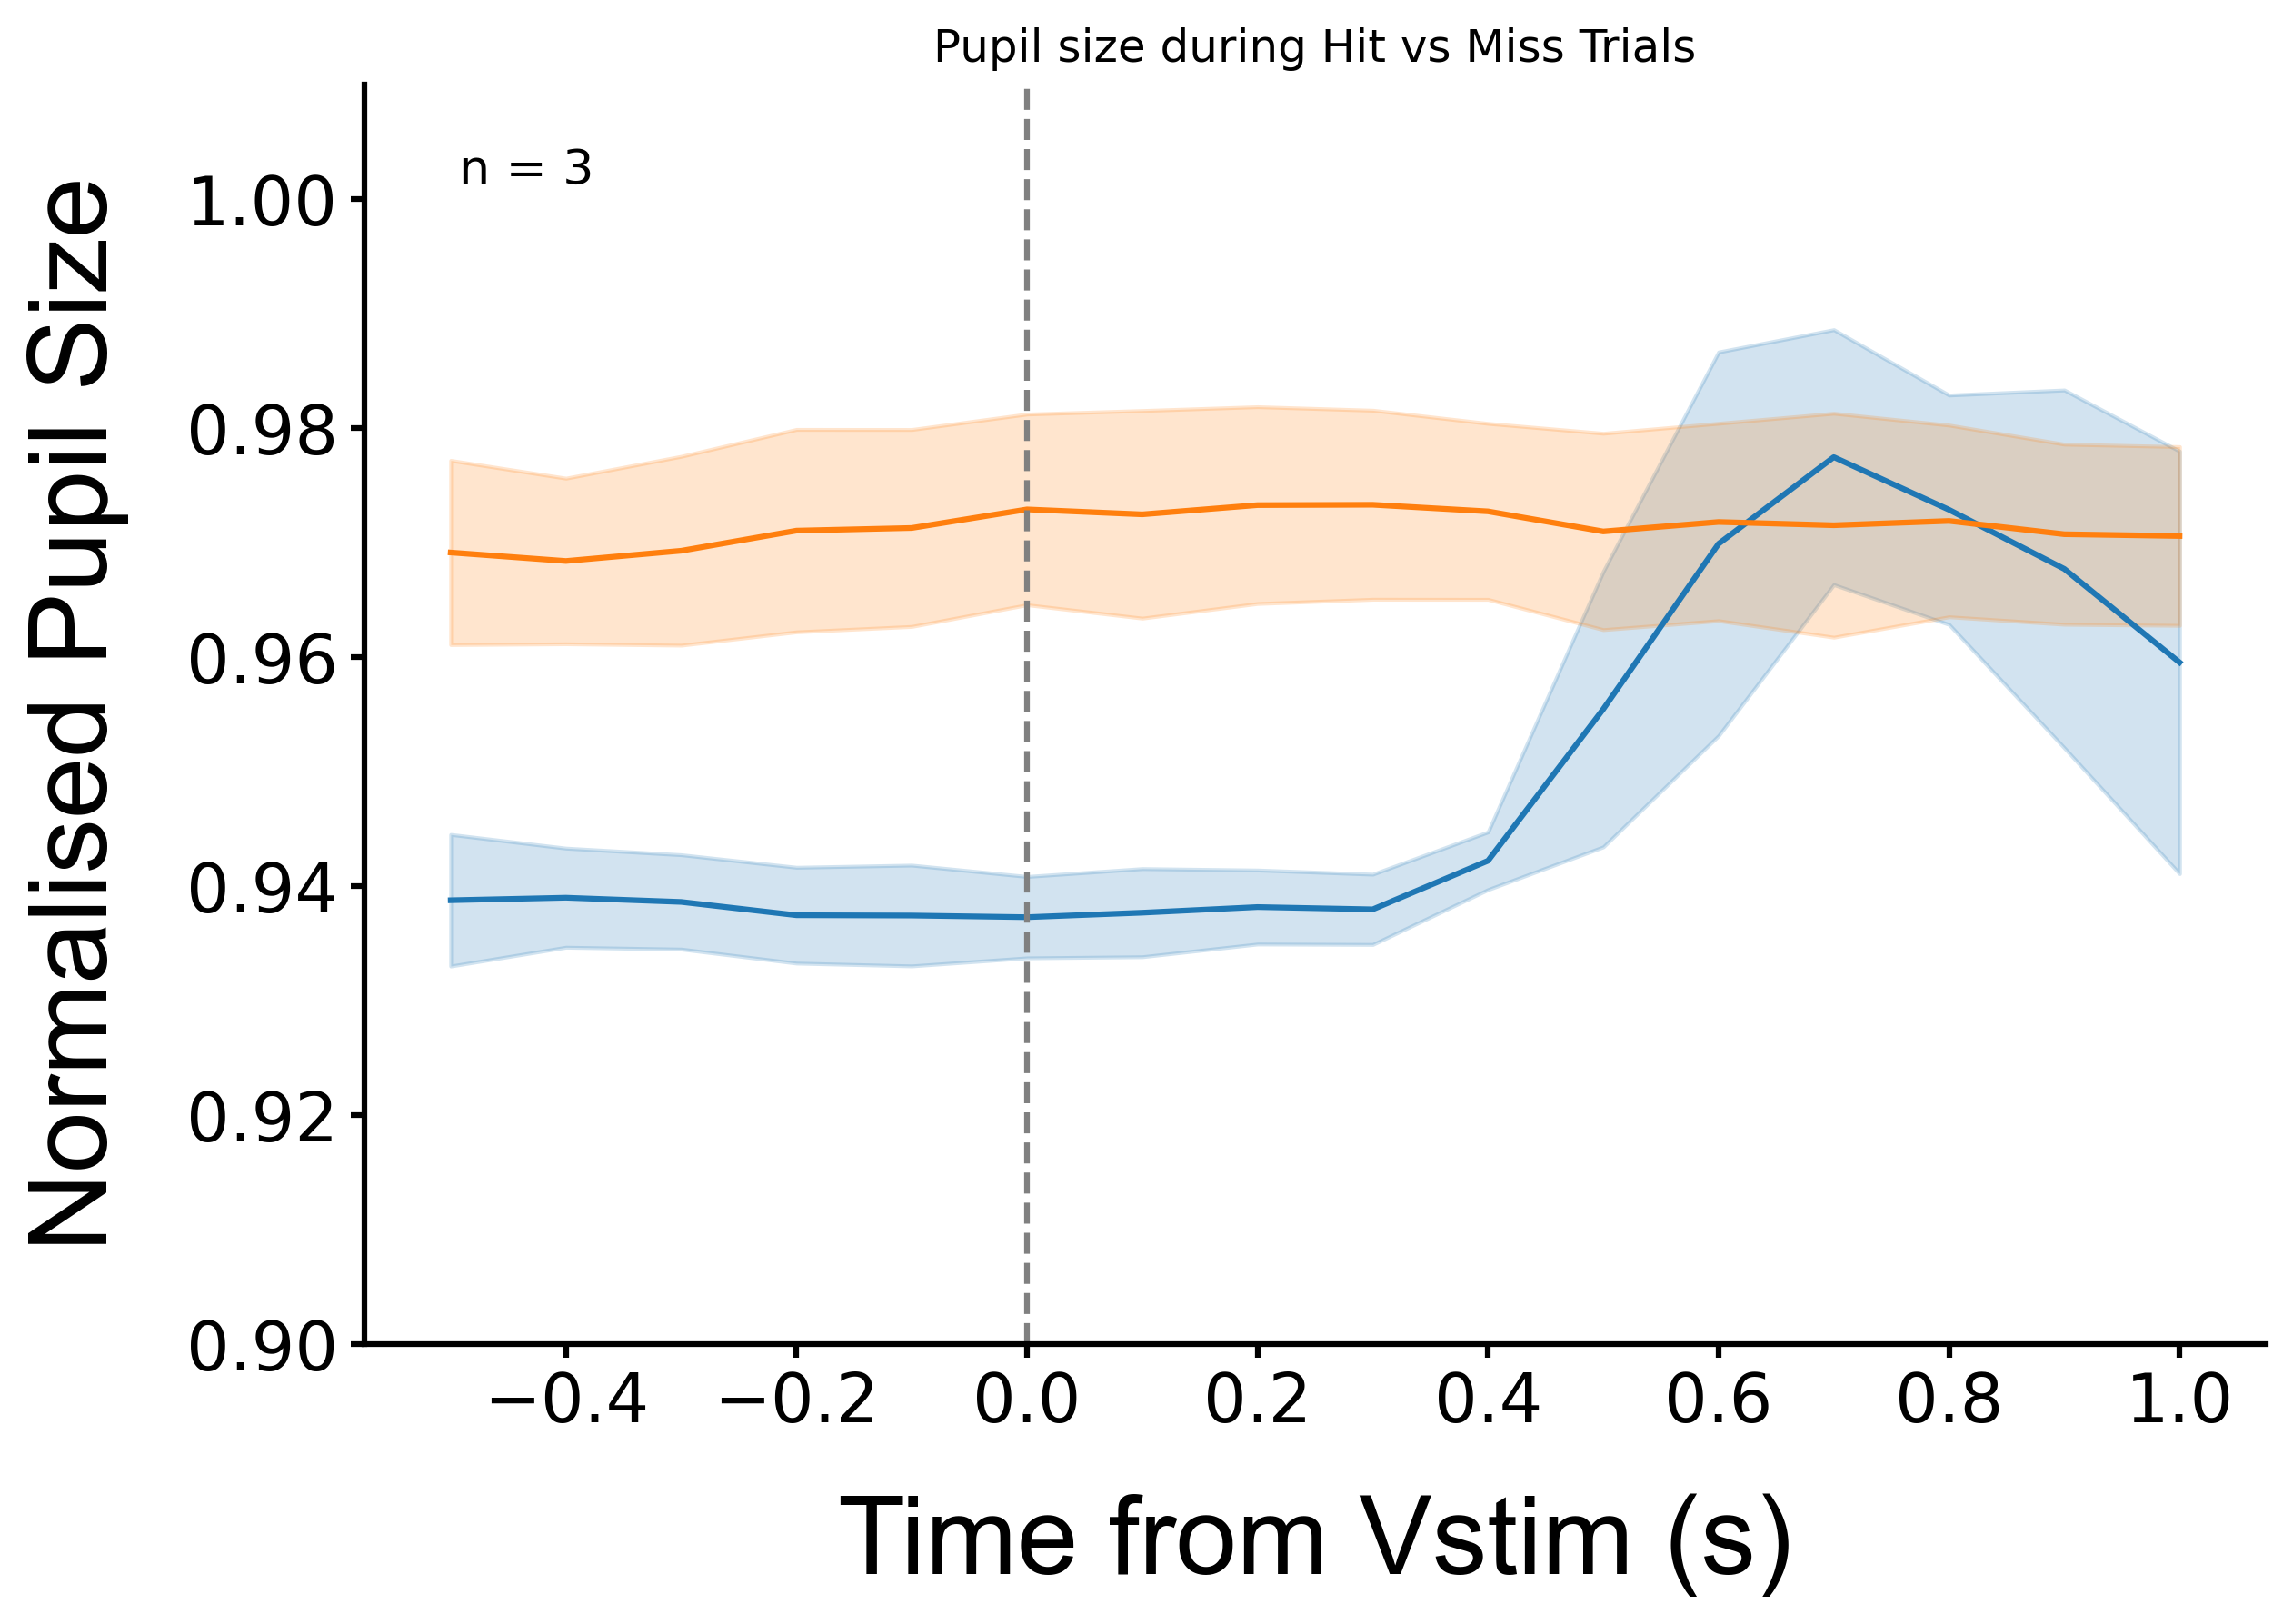

In [39]:
cole_hit = [0.94036749, 0.93949589, 0.93919829, 0.93809896, 0.93891546, 0.93916177,
 0.93927348, 0.93829837, 0.93874102, 0.94512289, 0.97245412, 0.99356637,
 0.99211259, 0.97533452, 0.96050129, 0.95134415]

cole_miss =  [0.95789259, 0.95843518, 0.95768869, 0.95860468, 0.95909933, 0.96111864,
 0.95965741, 0.96130298, 0.96172864, 0.9620004,  0.95884066, 0.95965849,
 0.95774866 ,0.96005298, 0.95959807 ,0.95956765]

chase_hit = [0.94483603, 0.94398925, 0.94332465, 0.94220692, 0.9418945 , 0.94035707,
 0.94135966, 0.94204038 ,0.94125929, 0.94249126, 0.94674871, 0.95848785,
 0.97506884 ,0.98368773, 0.98937445, 0.98506823]

chase_miss = [0.976331,   0.97543078, 0.9762346 , 0.97603768, 0.97752721, 0.9782843,
 0.97811562, 0.97732889, 0.97764994, 0.97647415 ,0.9765385,  0.97677318,
 0.97708301, 0.97720982, 0.97657098, 0.97519039]

calvin_hit = [0.93104036 ,0.93342738 ,0.93328347, 0.93201725, 0.93143184 ,0.93229033,
 0.9323545 , 0.93412562 ,0.93386459, 0.93897666 ,0.94712001, 0.9575788,
 0.9651566 , 0.95953102, 0.9531748,  0.94215184]

calvin_miss = [0.97312554, 0.97125971 ,0.97388769, 0.97843758, 0.97714965, 0.97924015,
 0.97957447, 0.98113372, 0.98048133 ,0.97965331, 0.97748659, 0.97891719,
 0.97966061, 0.97835623 ,0.97597192, 0.97691795]

time_stamp = [-5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
 -1.00000000e-01, -1.11022302e-16,  1.00000000e-01,  2.00000000e-01,
  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,  6.00000000e-01,
  7.00000000e-01,  8.00000000e-01 , 9.00000000e-01,  1.00000000e+00]

group_hit = [cole_hit, chase_hit, calvin_hit]
group_miss = [cole_miss, chase_miss, calvin_miss]


# Convert to numpy arrays for easier calculations
group_hit = np.array(group_hit)
group_miss = np.array(group_miss)

# Calculate mean and standard deviation
mean_hit = np.mean(group_hit, axis=0)
std_hit = np.std(group_hit, axis=0)

mean_miss = np.mean(group_miss, axis=0)
std_miss = np.std(group_miss, axis=0)

print("Mean of group hit:", mean_hit)
print("Std of group hit:", std_hit)
print("Mean of group miss:", mean_miss)
print("Std of group miss:", std_miss)

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot hit data
ax.plot(time_stamp, mean_hit, label='Hit', color='#1f77b4')
ax.fill_between(time_stamp, mean_hit - std_hit, mean_hit + std_hit, color='#1f77b4', alpha=0.2)

# Plot miss data
ax.plot(time_stamp, mean_miss, label='Miss', color='#ff7f0e')
ax.fill_between(time_stamp, mean_miss - std_miss, mean_miss + std_miss, color='#ff7f0e', alpha=0.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
ax.set_ylim(0.9,1.01)

ax.axvline(x=0, color='grey', linestyle='--') # Vstim onset with delay
ax.set_title(f'Pupil size during Hit vs Miss Trials')
ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from Vstim (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)
ax.legend

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)


In [41]:
from scipy.stats import wilcoxon

mean_group_hit = np.mean(mean_hit)
mean_group_miss = np.mean(mean_miss)

std_group_hit = np.std(mean_hit)
std_group_miss = np.std(mean_miss)

print(f'mean group hit is {mean_group_hit}')
print(f'mean group miss is {mean_group_miss}')

print(f'std group hit is {std_group_hit}')
print(f'std group miss is {std_group_miss}')

# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(mean_hit, mean_miss)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')



mean group hit is 0.9492022197916667
mean group miss is 0.97131309875
std group hit is 0.014680371689884331
std group miss is 0.0014296945502691259
Wilcoxon signed-rank test statistic: 5.0, p-value: 0.00030517578125


In [43]:
group_hit = [cole_hit, chase_hit, calvin_hit]
group_miss = [cole_miss, chase_miss, calvin_miss]

# Calculate mean pupil size in 0.5s before Hit and miss trial
means_hit = []
means_miss = []
for data in group_hit:
    means_hit.append(np.mean(data[0:5]))
for data in group_miss:
    means_miss.append(np.mean(data[0:5]))


fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

# Organize data for box plot
data = [means_hit, means_miss]
positions = [1, 2]
bp = ax.boxplot(data, positions=positions, widths=0.2, patch_artist=True, medianprops=dict(color='black'), zorder=1)

# Set colors for the boxes
colors = ['#aec7e8','#ffbb78']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Plot paired dots and connect them
for i, (before, after) in enumerate(zip(means_hit, means_miss)):
    ax.plot(positions, [before, after], marker='o', linestyle='-', color='gray', linewidth=1, zorder=2)


# Customize the plot
ax.set_title('Hit vs Miss (Before Vstim)')

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('', labelpad=10, size=30, family='Arial')
ax.set_ylabel('Normalised Pupil Size', labelpad=20, size=30, family='Arial')

ax.set_ylim(0.9, 1.01)

ax.set_xticks(positions)
ax.set_xticklabels(['Hit', 'Miss'], size=20, family='Arial')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

print(f'means_after {means_hit}')
print(f'means_before {means_miss}')

means_after [0.939215218, 0.9432502699999998, 0.93224006]
means_before [0.9583440940000001, 0.976312254, 0.9747720339999999]


In [51]:
from scipy.stats import wilcoxon

mean_group_hit = np.mean(means_hit)
mean_group_miss = np.mean(means_miss)

std_group_hit = np.std(means_hit)
std_group_miss = np.std(means_miss)

sem_group_hit = std_group_hit / np.sqrt(3)
sem_group_miss = std_group_miss / np.sqrt(3)


print(f'mean group hit is {mean_group_hit}')
print(f'mean group miss is {mean_group_miss}')

print(f'std group hit is {std_group_hit}')
print(f'std group miss is {std_group_miss}')

print(f'sem_group_hit is {sem_group_hit}')
print(f'sem_group_miss is {sem_group_miss}')

# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(means_hit, means_miss)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')



mean group hit is 0.9382351826666667
mean group miss is 0.9698094606666666
std group hit is 0.004548005643646473
std group miss is 0.008131586315634922
sem_group_hit is 0.0026257922826352286
sem_group_miss is 0.0046947735482704995
Wilcoxon signed-rank test statistic: 0.0, p-value: 0.25


# Pupil size Align with reward in Hit Trials (before and after)

## Individual Hit (ALign with reward) Figure 4c

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

name = 'Cole'
days = [9,10,12,13]
dates = ['01052024','02052024','06052024','07052024']
axis = ['x','y','y','y']
# Trial_type = 'miss'

# name = 'Chase'
# days = [7,8,9,10]
# dates = ['30042024','01052024','02052024','03052024']
# axis = ['y','y','y','y']
# Trial_type = 'miss'

# name = 'Calvin'
# days = [7,8,9]
# dates = ['30042024','01052024','02052024']
# axis = ['x','y','y']
# # Trial_type = 'miss'

In [10]:
# Hit aligned with reward
time_before_change = 0.5 #how much time to plot before the reward
duration = 1.75

delay_duration = 0.25

bin_size = 0.1
time_bins = np.arange(0 - time_before_change, 1.1, bin_size)

dfs = {}  # Dictionary to store DataFrames for each day

individul_pupil_hit_reward = []

# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Pupil
# Directory where CSV files are located
for day, date, axi in zip(days, dates, axis):
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Pupil'
    filename_pupil = f'New_Pupil_Data_{date}_Day{day}_{name}.csv'
    file_path = os.path.join(directory, filename_pupil)
    
    # Read CSV file
    df_pupil = pd.read_csv(file_path)
    df_pupil['x'] = df_pupil['x']/100
    df_pupil['y'] = df_pupil['y']/100
    # Store DataFrame in the dictionary with the day as the key
    dfs[day] = df_pupil

    if name == 'Cole': 
        if day == 9:
            df_pupil = df_pupil[df_pupil['x'] >= 1.3]

        elif day == 10:
            ranges = [(1053.1, 1053.4)]

            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        elif day == 12:
            ranges = [
                        (79.7,79.9),
                        (410.89, 411.1),
                        (338.4, 338.5),
                        (1029.2, 1029.6),
                        (1487.5, 1487.9)
                    ]
            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        else:
            df_pupil = df_pupil

    # Read Trial Vstim Presentation
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_Table'
    filename_vstim = f'New_trial_table_Day{day}_{date}_{name}.csv'
    file_path = os.path.join(directory, filename_vstim)
    df = pd.read_csv(file_path)
    day = int(day)

    #Hit

    # Find trial "start time" in each hit trial (including time before and after)
    hit_df = df[df['hit'] == 1].reset_index(drop=True)
    hit_df['reward_start_time'] = hit_df['stim_start_time'] + hit_df['fl_latency']
    start_times = hit_df['reward_start_time'] - time_before_change

    end_times = start_times + duration
    df_start_end = pd.DataFrame()
    df_start_end['start_time'] = start_times
    df_start_end['end_time'] = end_times
    df_start_end = df_start_end.iloc[:]


    # Align pupil to trial time
    # Initialize a list to store interpolated data for each trial
    interpolated_pupil_data = []

    for index, row in df_start_end.iterrows():
        mask = (df_pupil['timestamp'] >= row['start_time']) & (df_pupil['timestamp'] <= row['end_time'])
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - row['start_time']
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows['y'].empty:  # Check if 'y' values are not empty
            # Interpolate pupil area data for the current trial
            interpolated_values = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])
            
            # Apply normalization

            max_val = np.max(interpolated_values)
            normalized_values = interpolated_values /max_val

            interpolated_pupil_data.append(normalized_values)

    # Mean pupil data on single day
    interpolated_data = np.mean(interpolated_pupil_data, axis=0)

    ax.plot(time_bins, interpolated_data)

    # Store mean pupil data in each day
    individul_pupil_hit_reward.append(interpolated_data)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='green', linestyle='--') # Vstim onset with reward
ax.set_title(f'Pupil size during Hit Trials {name} ')
ax.set_ylabel('Normalised Pupil diameter', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)




# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot the mean of interpolated_data over time bins
mean_interpolated_data_hit = np.mean(individul_pupil_hit_reward, axis=0)

ax.plot(time_bins, mean_interpolated_data_hit, color='grey', label='Mean') 

# Calculate standard deviation of interpolated_data over time bins
std_interpolated_data_hit = np.std(individul_pupil_hit_reward, axis=0)

print(f'Hit align with first lick {name}')
print(time_bins)
print(f'mean_pupil size is {mean_interpolated_data_hit}')
print(f'std_pupil size is {std_interpolated_data_hit}')
# Shade between the error bars
# ax.fill_between(time_bins, mean_interpolated_data_hit - std_interpolated_data_hit, mean_interpolated_data_hit + std_interpolated_data_hit, color='#1f77b4', alpha=0.2) # Blue hit
ax.fill_between(time_bins, mean_interpolated_data_hit - std_interpolated_data_hit, mean_interpolated_data_hit + std_interpolated_data_hit, color='grey', alpha=0.2) 


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='green', linestyle='--') # Vstim onset with delay
ax.set_title(f'Pupil size during Hit Trials {name} ')
ax.set_ylabel('Normalised Pupil diameter', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)



Hit align with first lick Cole
[-5.00000000e-01 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01
 -1.00000000e-01 -1.11022302e-16  1.00000000e-01  2.00000000e-01
  3.00000000e-01  4.00000000e-01  5.00000000e-01  6.00000000e-01
  7.00000000e-01  8.00000000e-01  9.00000000e-01  1.00000000e+00]
mean_pupil size is [0.89889536 0.89833562 0.89823577 0.89830623 0.89884194 0.90103325
 0.90746377 0.92685903 0.94875702 0.95515759 0.94744256 0.92649391
 0.91021439 0.89979962 0.89536694 0.88729391]
std_pupil size is [0.02568315 0.02554285 0.02511786 0.02401438 0.02444718 0.0242485
 0.02491767 0.03425983 0.03327743 0.01635313 0.02907072 0.03111041
 0.03076201 0.03533121 0.04334454 0.04987433]


## Group Hit (ALign with reward) Figure 4c

Mean of group hit reward: [0.9127902  0.9125249  0.91192489 0.91139919 0.91130221 0.91340325
 0.9209056  0.94237973 0.95932541 0.96802825 0.95641597 0.93848292
 0.92756566 0.92002749 0.91369297 0.91176662]
Std of group hit reward: [0.01503994 0.01561599 0.01597404 0.01607665 0.01635448 0.01536722
 0.01222687 0.01097532 0.00749514 0.00912428 0.0063465  0.00889242
 0.01227673 0.01431418 0.0129615  0.0174263 ]


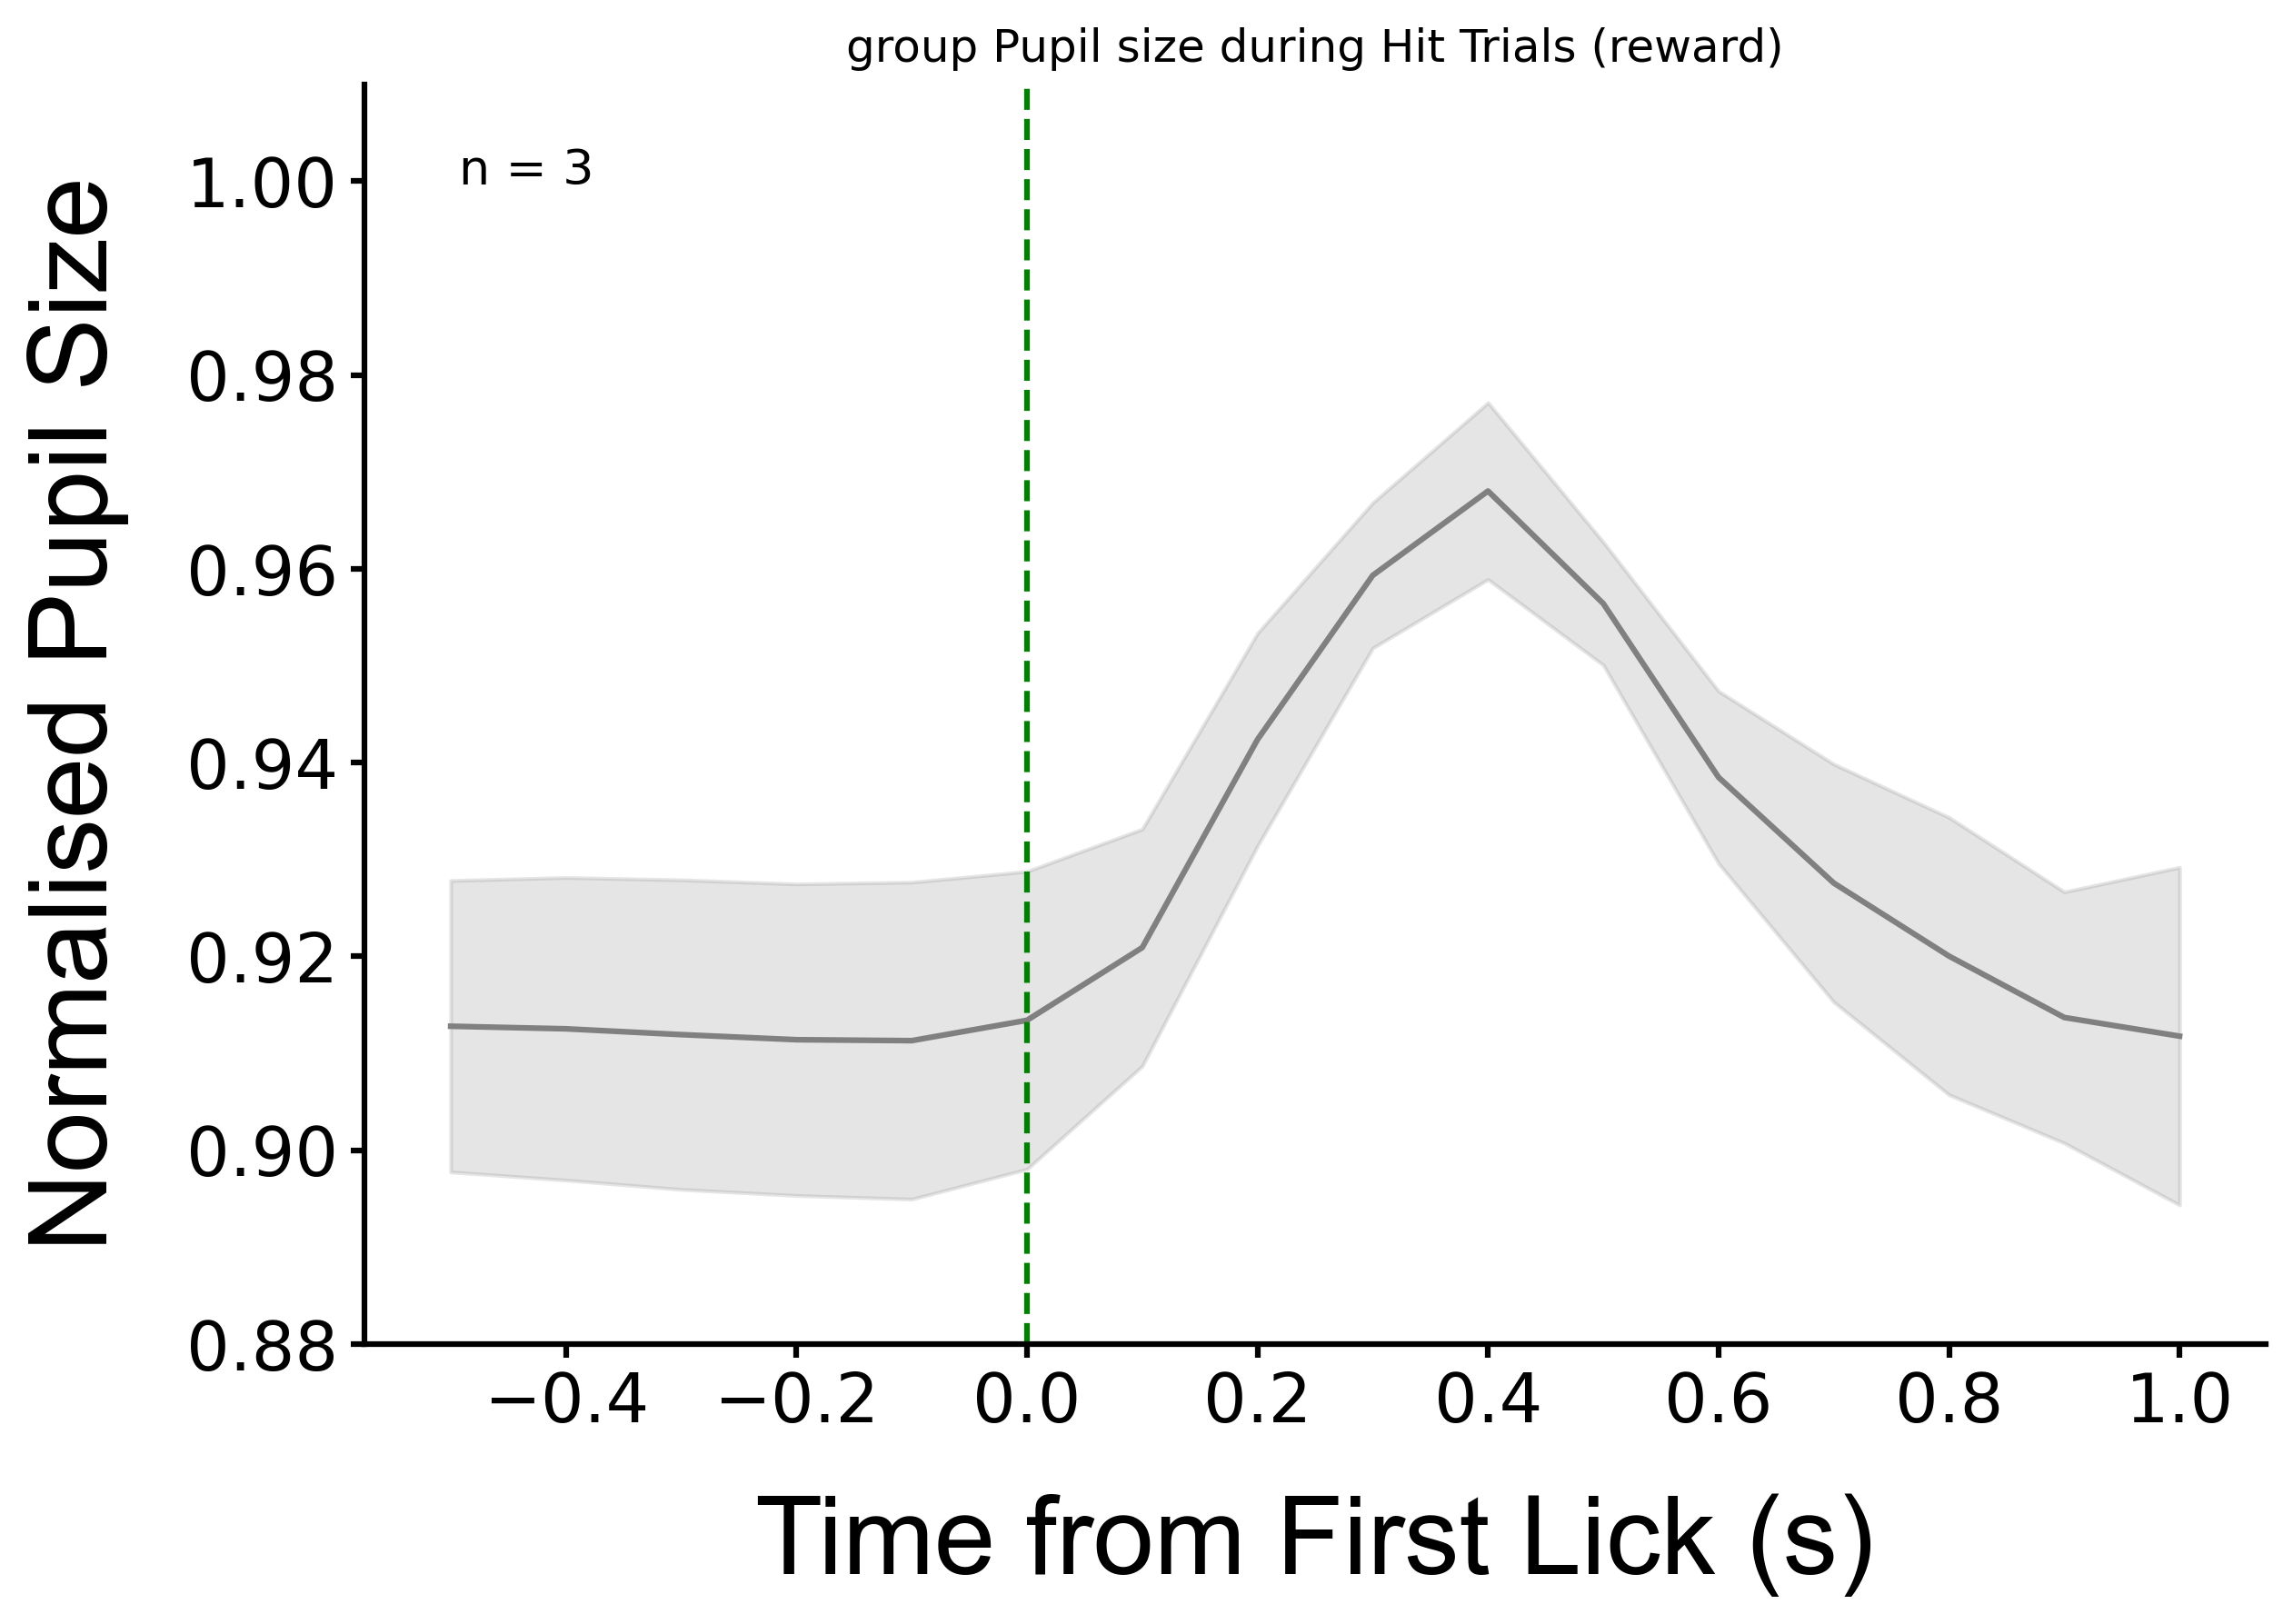

In [46]:
calvin_hit_reward = [0.93368394, 0.93427516, 0.93433258, 0.93404284, 0.93440717, 0.93506289,
 0.93704631, 0.950272,   0.96390428, 0.97366468, 0.9610626,  0.94776536,
 0.93571476, 0.9294568,  0.92319986 , 0.92651865]

chase_hit_reward =  [0.90579129, 0.90496392, 0.90320633, 0.90184849, 0.90065752, 0.90411361,
 0.91820672, 0.95000816, 0.96531492, 0.97526248, 0.96074274, 0.94118949,
 0.93676782, 0.93082604, 0.92251211, 0.9214873 ]


cole_hit_reward =  [0.89889536, 0.89833562, 0.89823577, 0.89830623, 0.89884194, 0.90103325,
 0.90746377, 0.92685903, 0.94875702, 0.95515759, 0.94744256 ,0.92649391,
 0.91021439, 0.89979962 ,0.89536694, 0.88729391]


time_stamp = [-5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
 -1.00000000e-01, -1.11022302e-16,  1.00000000e-01,  2.00000000e-01,
  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,  6.00000000e-01,
  7.00000000e-01,  8.00000000e-01 , 9.00000000e-01,  1.00000000e+00]

group_hit_reward = [cole_hit_reward, chase_hit_reward, calvin_hit_reward]


# Convert to numpy arrays for easier calculations
group_hit_reward = np.array(group_hit_reward)

# Calculate mean and standard deviation
mean_hit_reward = np.mean(group_hit_reward, axis=0)
std_hit_reward = np.std(group_hit_reward, axis=0)

print("Mean of group hit reward:", mean_hit_reward)
print("Std of group hit reward:", std_hit_reward)

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot hit reward data
ax.plot(time_stamp, mean_hit_reward, label='Hit', color='grey')
ax.fill_between(time_stamp, mean_hit_reward - std_hit_reward, mean_hit_reward + std_hit_reward, color='grey', alpha=0.2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
ax.set_ylim(0.88,1.01)

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

ax.axvline(x=0, color='green', linestyle='--') # reward
ax.set_title(f'group Pupil size during Hit Trials (reward)')
ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

means_after [0.93455935 0.95219807 0.95622182]
means_before [0.89852298 0.90329351 0.93414834]


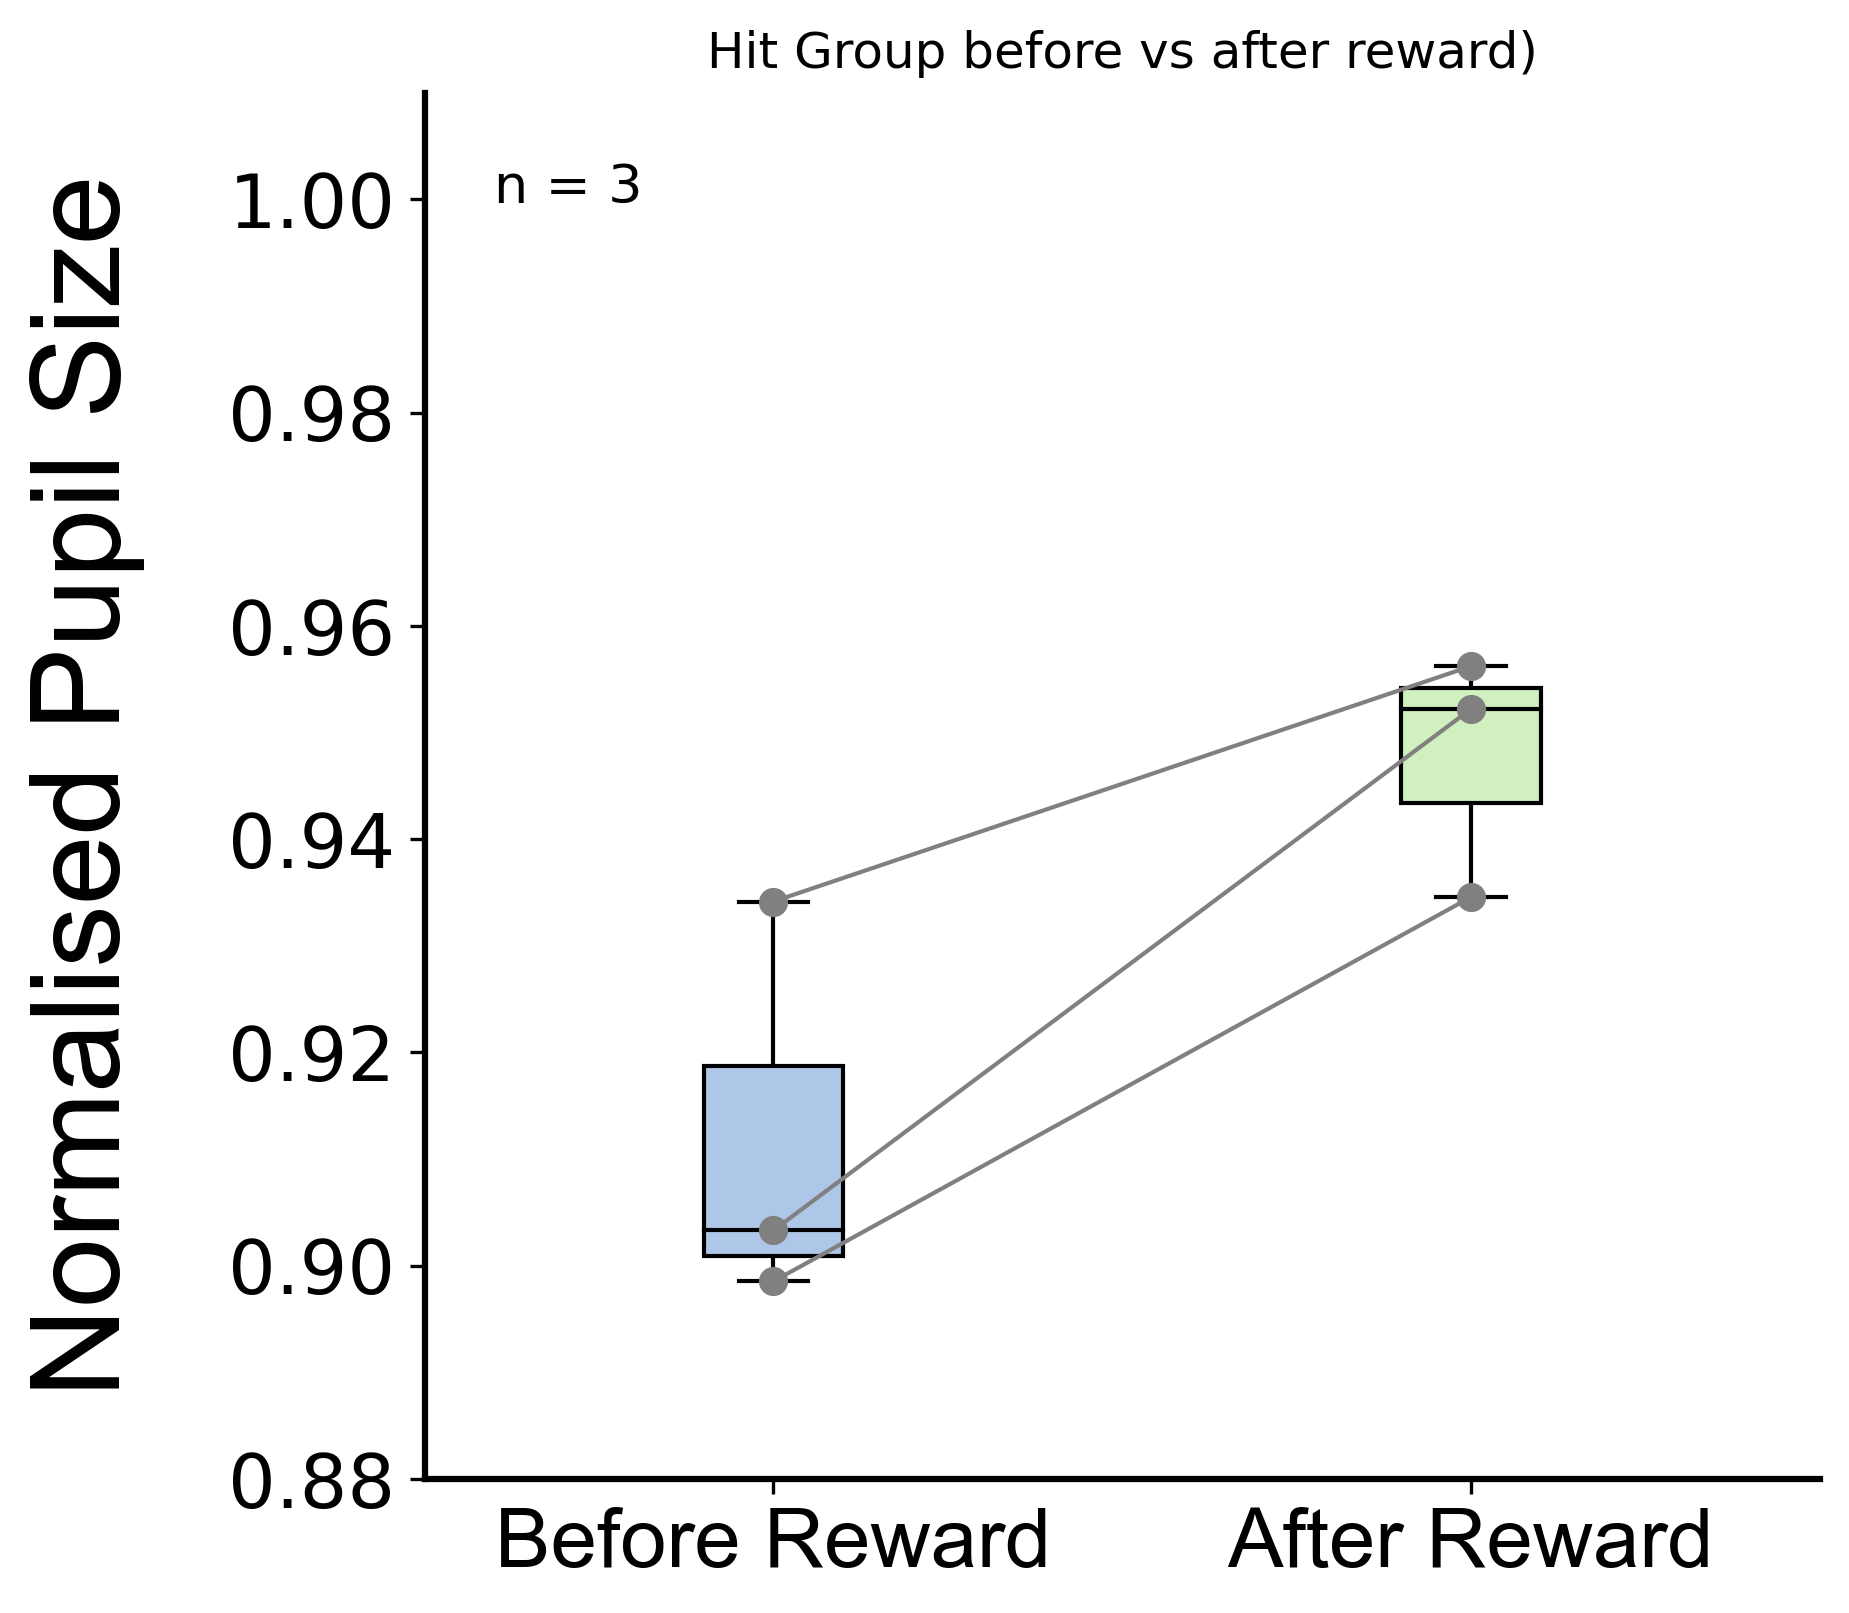

In [47]:
group_hit_reward = [cole_hit_reward, chase_hit_reward, calvin_hit_reward]
names = ['Cole', 'Chase', 'Calvin']

# Calculate mean pupil size in 0.5s before and after reward
means_before = []
means_after = []
for data in group_hit_reward:
    means_before.append(np.mean(data[0:5]))
    means_after.append(np.mean(data[6:10]))

means_before = np.array(means_before)
means_after = np.array(means_after)

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(6, 6)

# Organize data for box plot
data = [means_before, means_after]
positions = [1, 2]
bp = ax.boxplot(data, positions=positions, widths=0.2, patch_artist=True, medianprops=dict(color='black'), zorder=1)

# Set colors for the boxes
colors = ['#aec7e8','#D0F0C0']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Plot paired dots and connect them
for i, (before, after) in enumerate(zip(means_before, means_after)):
    ax.plot(positions, [before, after], marker='o', linestyle='-', color='gray', linewidth=1, zorder=2)


# Customize the plot
ax.set_title('Hit Group before vs after reward)')

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xlabel('', labelpad=10, size=30, family='Arial')
ax.set_ylabel('Normalised Pupil Size', labelpad=20, size=30, family='Arial')

ax.set_ylim(0.88, 1.01)

ax.set_xticks(positions)
ax.set_xticklabels(['Before Reward', 'After Reward'], size=20, family='Arial')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

print(f'means_after {means_after}')
print(f'means_before {means_before}')

In [48]:
from scipy.stats import wilcoxon

mean_group_before = np.mean(means_before)
mean_group_after = np.mean(means_after)

std_group_before = np.std(means_before)
std_group_after = np.std(means_after)


sem_group_before = std_group_before / np.sqrt(3)
sem_group_after = std_group_after / np.sqrt(3)


print(f'mean_group_before is {mean_group_before}')
print(f'mean group after is {mean_group_after}')

print(f'std group before is {std_group_before}')
print(f'std_group_after is {std_group_after}')

print(f'sem_group_before is {sem_group_before}')
print(f'sem_group_after is {sem_group_after}')

# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(means_after, means_before)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')

mean_group_before is 0.9119882773333332
mean group after is 0.9476597466666666
std group before is 0.015790095970616758
std_group_after is 0.009407900278576648
sem_group_before is 0.00911641615916561
sem_group_after is 0.005431653758345384
Wilcoxon signed-rank test statistic: 0.0, p-value: 0.25


In [38]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(means_after, means_before)

print(f'U-statistic: {u_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('The two groups are significantly different.')
else:
    print('The two groups are not significantly different.')

U-statistic: 9.0
P-value: 0.1
The two groups are not significantly different.


# Pupil FA aligned with reward Figure 4d

## Individual FA (Align with Reward) Figure 4d

In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# name = 'Cole'
# days = [9,10,12,13]
# dates = ['01052024','02052024','06052024','07052024']
# axis = ['x','y','y','y']
# Trial_type = 'miss'

# name = 'Chase'
# days = [7,8,9,10]
# dates = ['30042024','01052024','02052024','03052024']
# axis = ['y','y','y','y']
# Trial_type = 'miss'

name = 'Calvin'
days = [7,8,9]
dates = ['30042024','01052024','02052024']
axis = ['x','y','y']
# # Trial_type = 'miss'

FA align with first lick Calvin
[-5.00000000e-01 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01
 -1.00000000e-01 -1.11022302e-16  1.00000000e-01  2.00000000e-01
  3.00000000e-01  4.00000000e-01  5.00000000e-01  6.00000000e-01
  7.00000000e-01  8.00000000e-01  9.00000000e-01  1.00000000e+00]
mean_pupil size is [0.95715207 0.95562584 0.96127415 0.95885813 0.96764874 0.97481
 0.98189012 0.97204049 0.97314747 0.96369664 0.96455013 0.95969152
 0.95632268 0.9584068  0.95803803 0.95534731]
std_pupil size is [0.02568315 0.02554285 0.02511786 0.02401438 0.02444718 0.0242485
 0.02491767 0.03425983 0.03327743 0.01635313 0.02907072 0.03111041
 0.03076201 0.03533121 0.04334454 0.04987433]


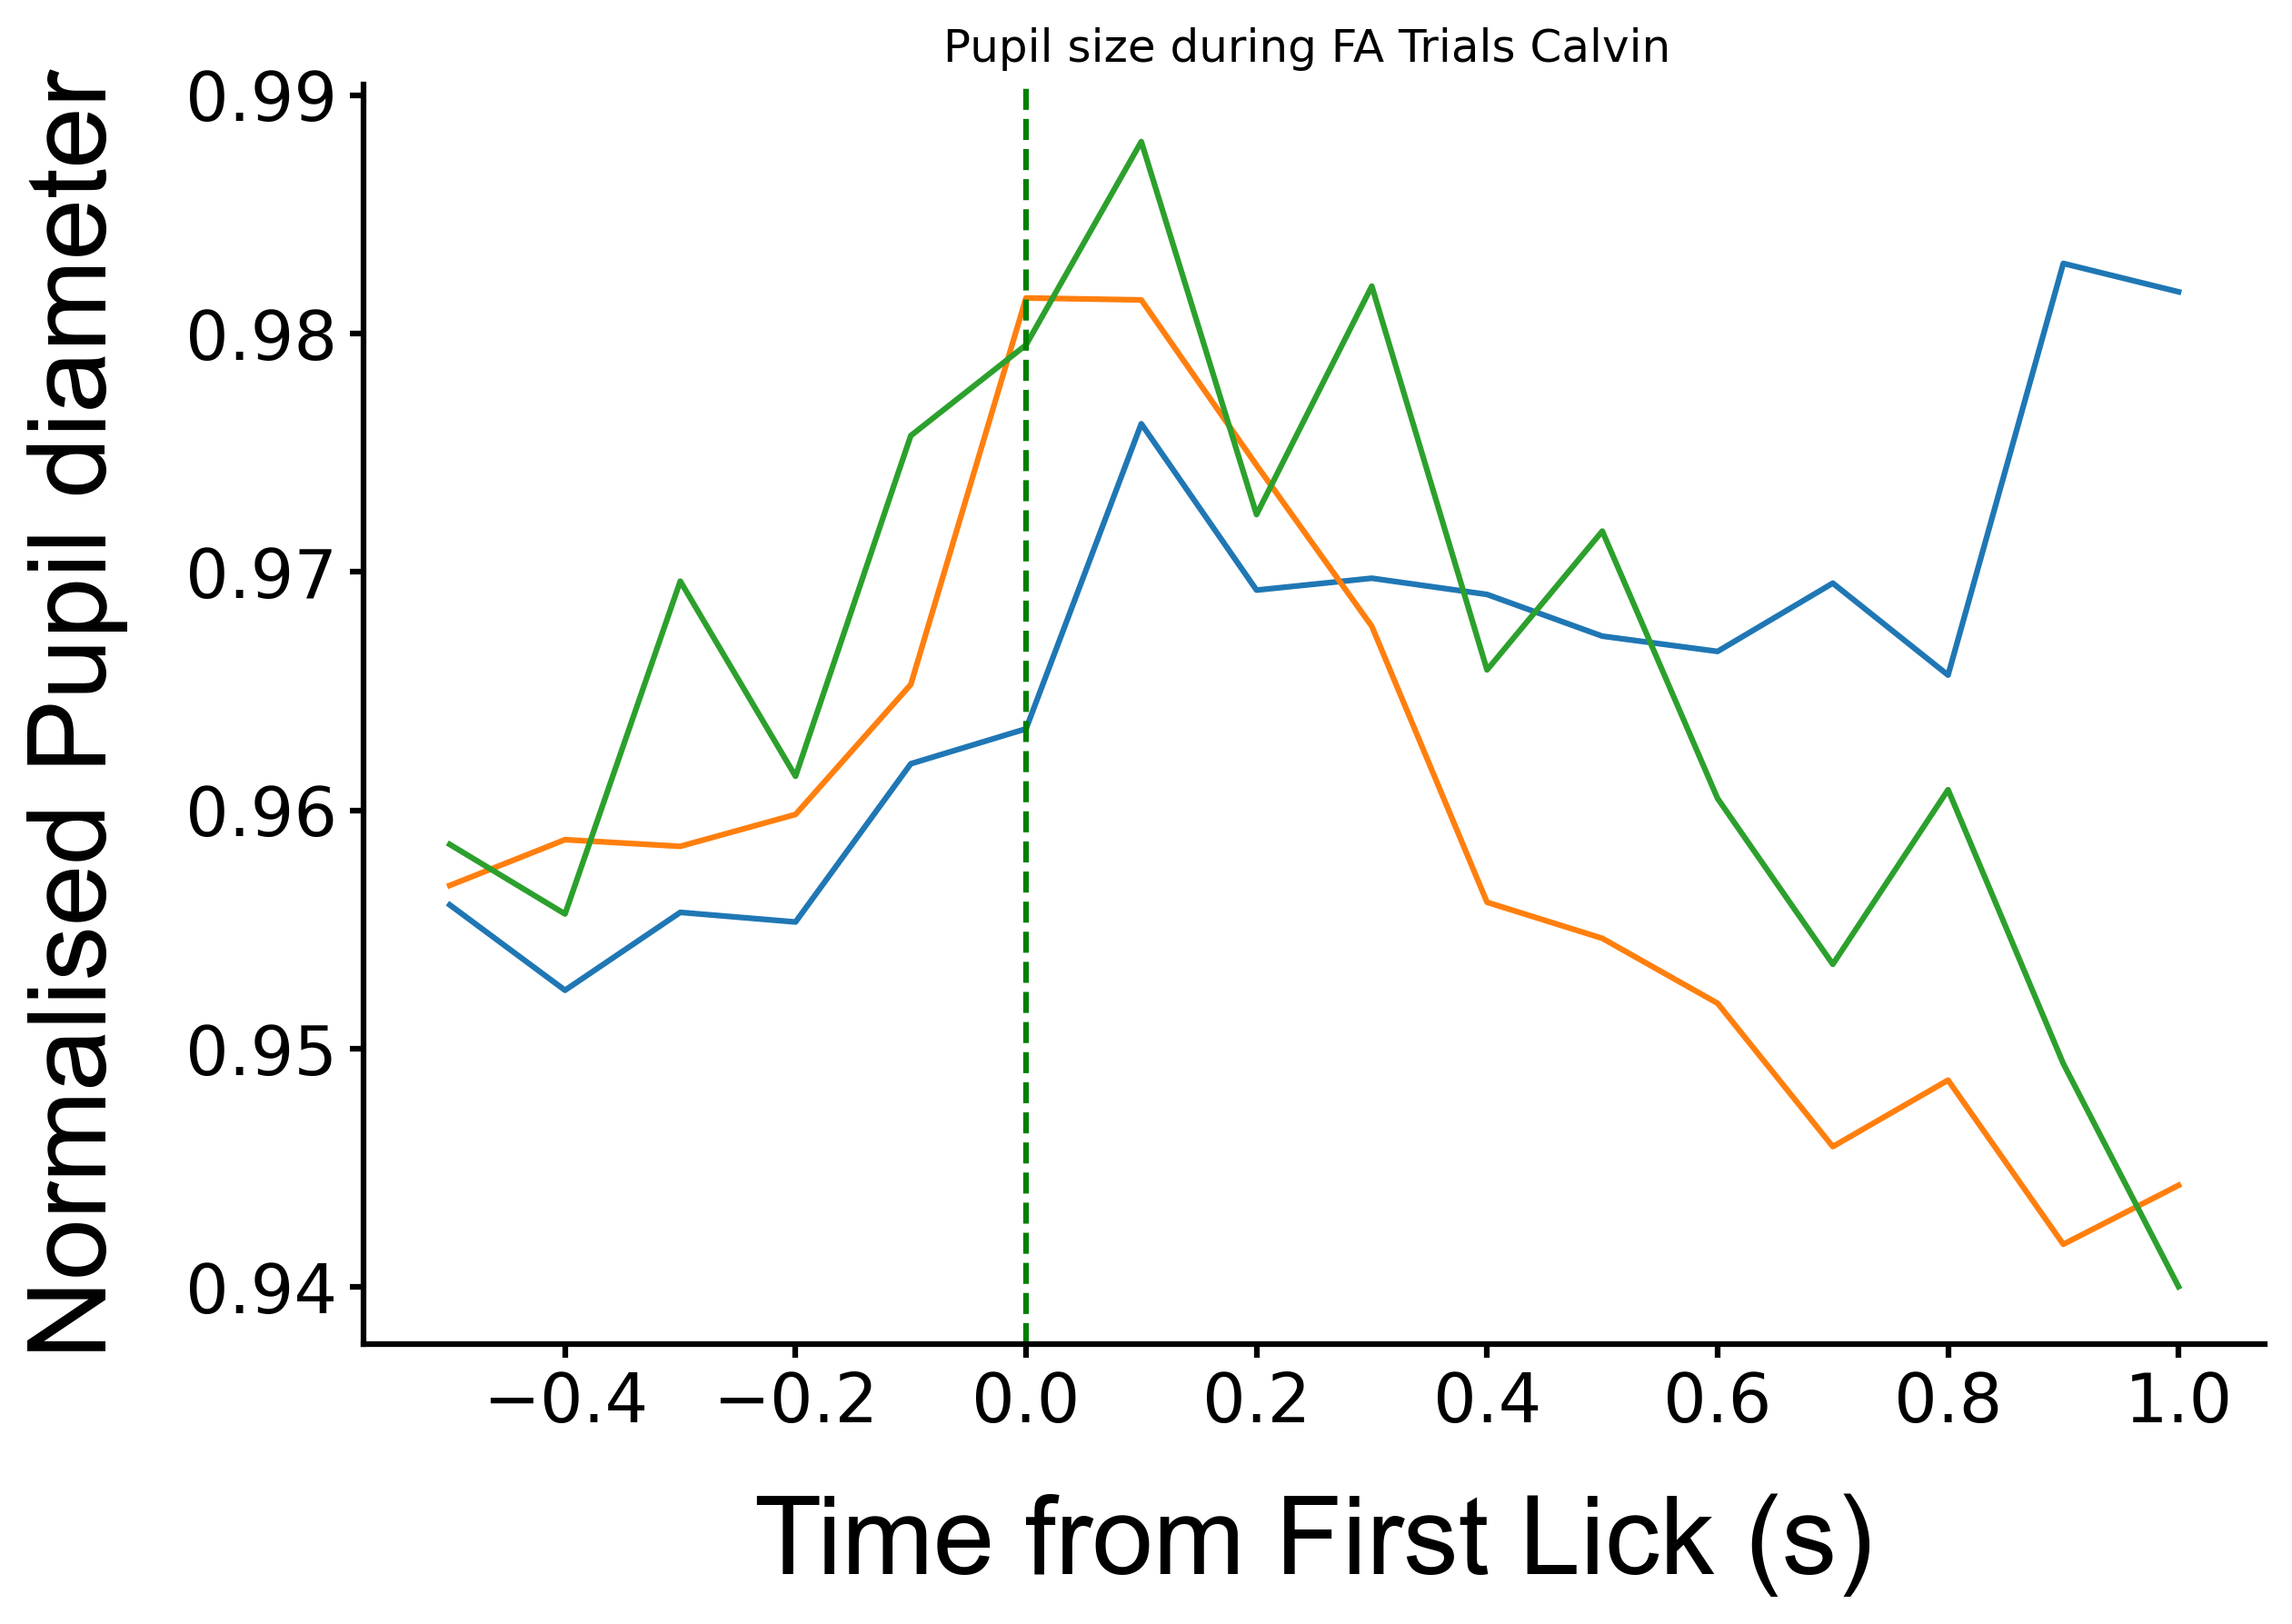

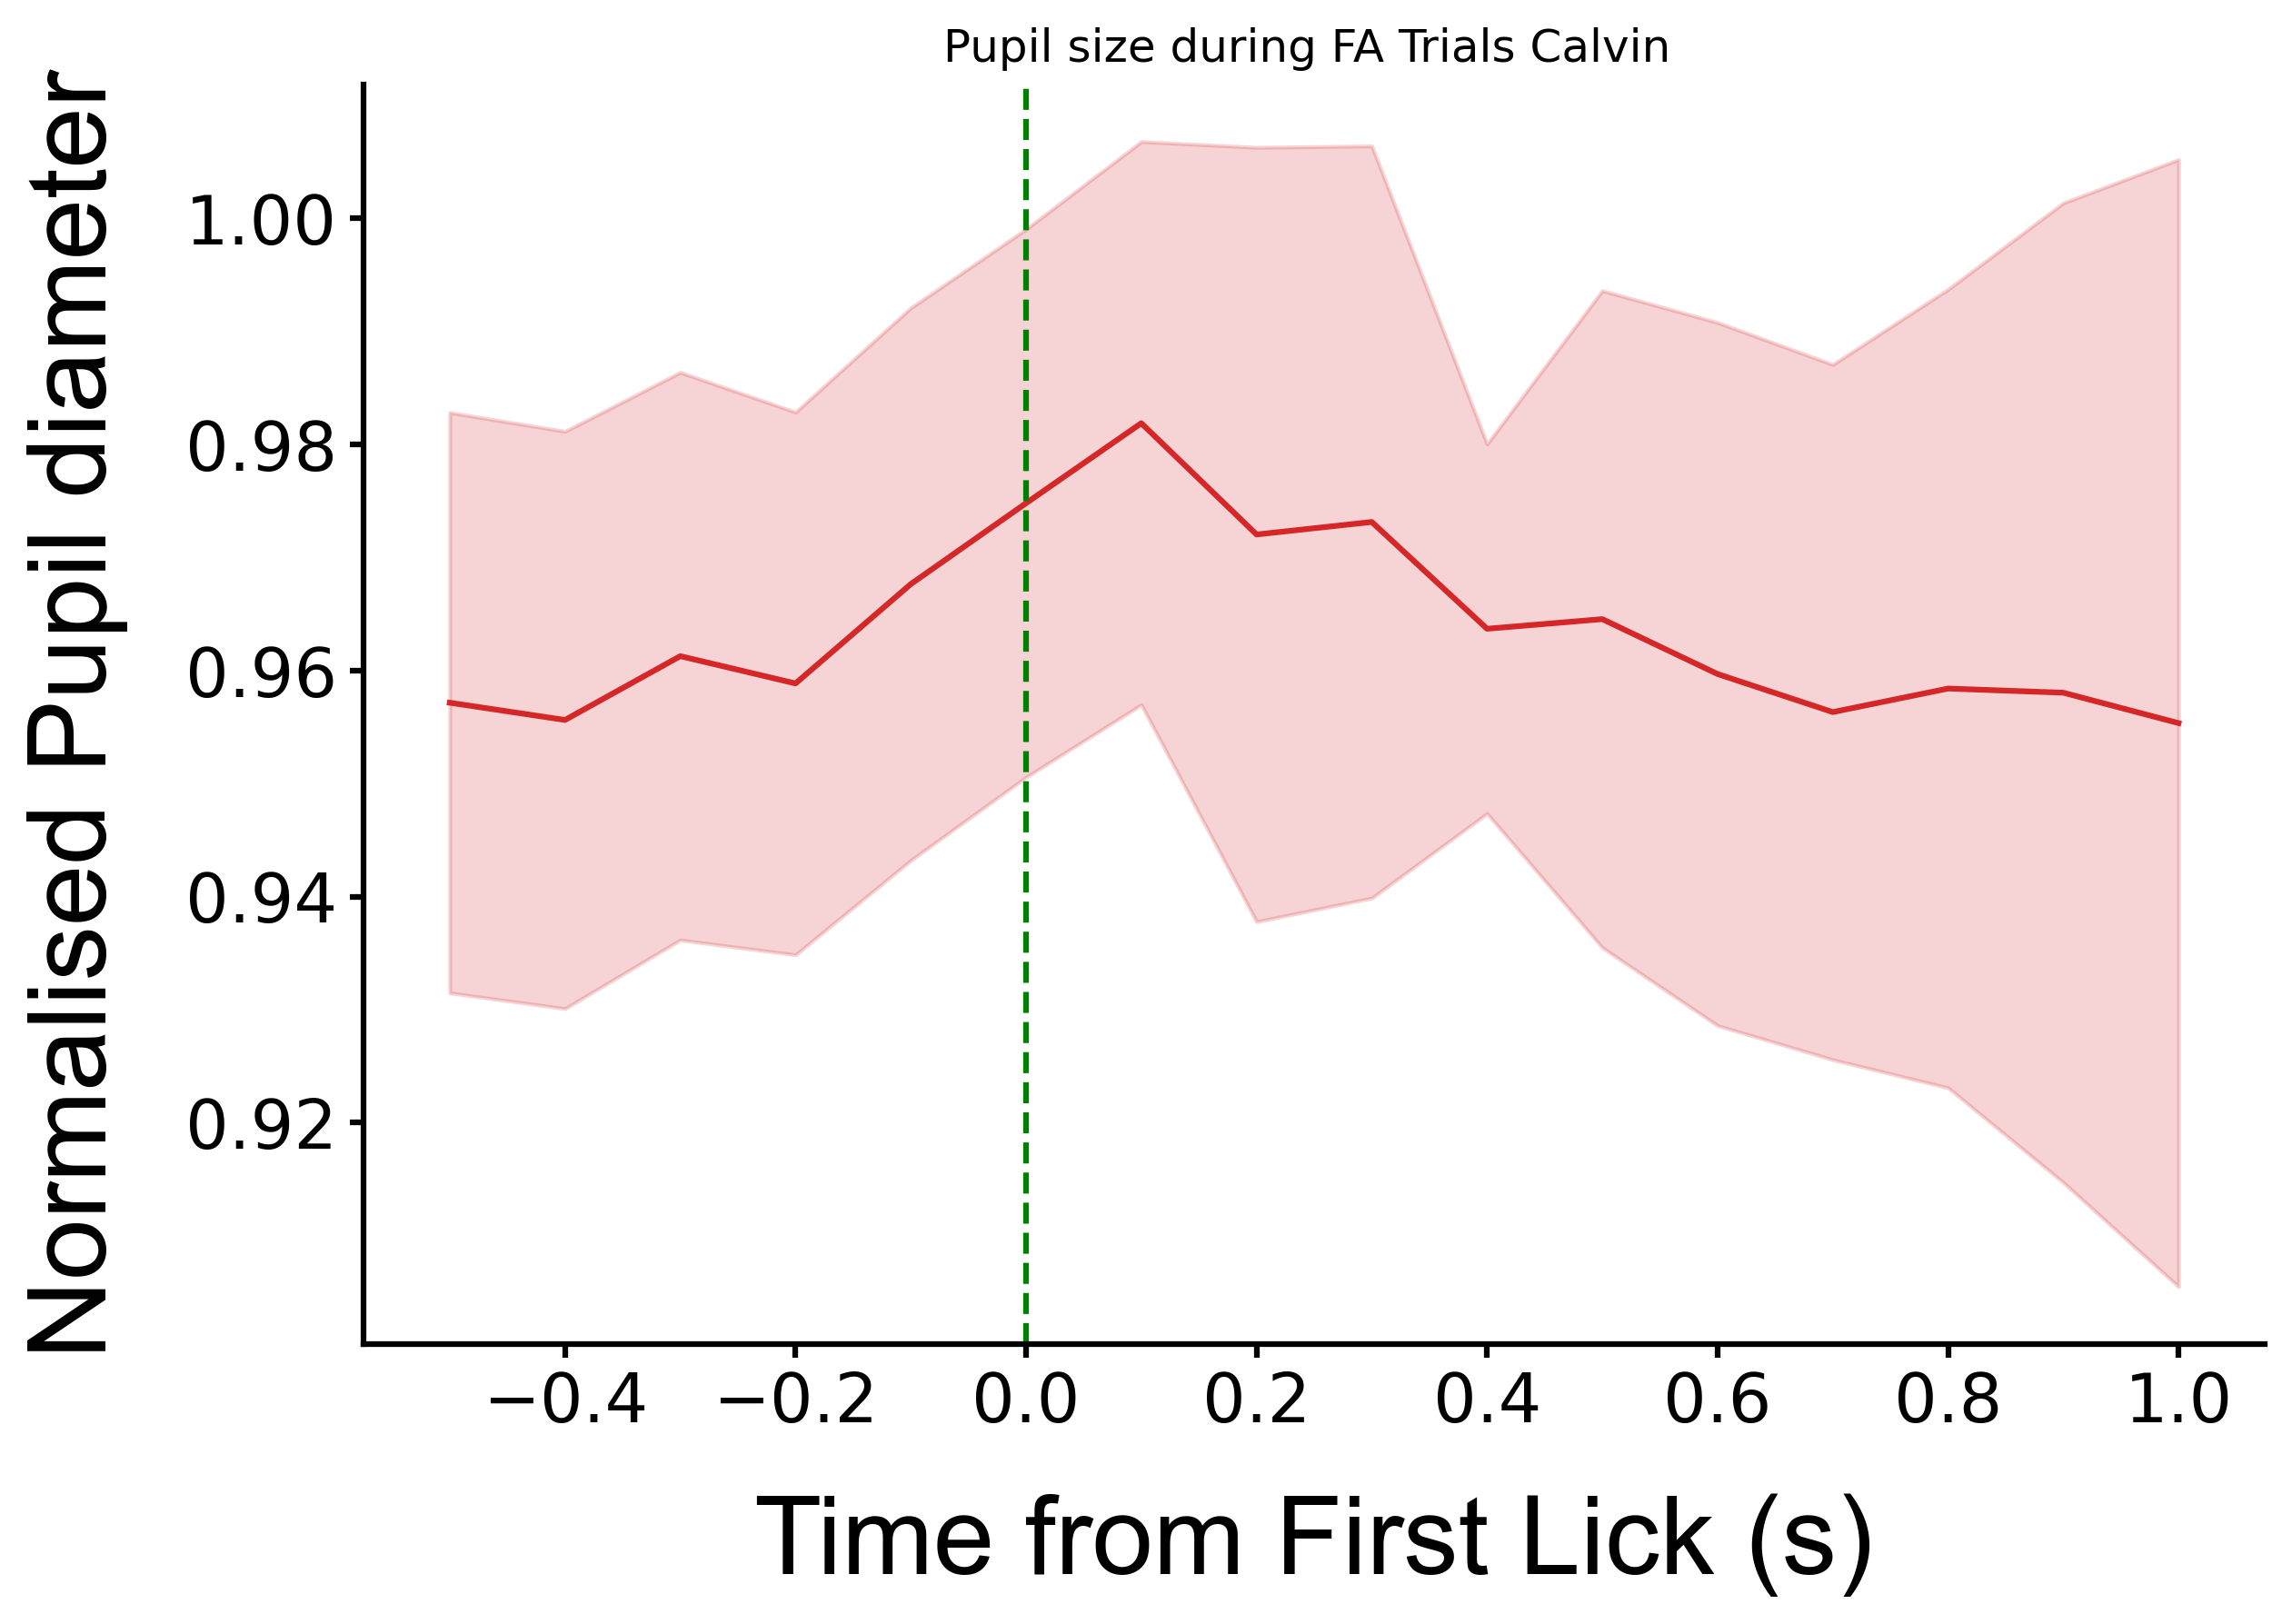

In [86]:
# FA aligned with reward
time_before_change = 0.5 #how much time to plot before the reward
duration = 1.75

delay_duration = 0.25

bin_size = 0.1
time_bins = np.arange(0 - time_before_change, 1.1, bin_size)

dfs = {}  # Dictionary to store DataFrames for each day

individul_pupil_fa_reward = []

# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Pupil
# Directory where CSV files are located
for day, date, axi in zip(days, dates, axis):
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Pupil'
    filename_pupil = f'New_Pupil_Data_{date}_Day{day}_{name}.csv'
    file_path = os.path.join(directory, filename_pupil)
    
    # Read CSV file
    df_pupil = pd.read_csv(file_path)
    df_pupil['x'] = df_pupil['x']/100
    df_pupil['y'] = df_pupil['y']/100
    # Store DataFrame in the dictionary with the day as the key
    dfs[day] = df_pupil

    if name == 'Cole': 
        if day == 9:
            df_pupil = df_pupil[df_pupil['x'] >= 1.3]

        elif day == 10:
            ranges = [(1053.1, 1053.4)]

            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        elif day == 12:
            ranges = [
                        (79.7,79.9),
                        (410.89, 411.1),
                        (338.4, 338.5),
                        (1029.2, 1029.6),
                        (1487.5, 1487.9)
                    ]
            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        else:
            df_pupil = df_pupil

    # Read Trial Vstim Presentation
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Trial_Table'
    filename_vstim = f'New_trial_table_Day{day}_{date}_{name}.csv'
    file_path = os.path.join(directory, filename_vstim)
    df = pd.read_csv(file_path)
    day = int(day)

    #Hit

    # Find trial "start time" in each hit trial (including time before and after)
    fa_df = df[df['false_alarm'] == 1].reset_index(drop=True)
    fa_df['reward_start_time'] = fa_df['stim_start_time'] + delay_duration + fa_df['fl_latency']
    start_times = fa_df['reward_start_time'] - time_before_change

    end_times = start_times + duration
    df_start_end = pd.DataFrame()
    df_start_end['start_time'] = start_times
    df_start_end['end_time'] = end_times
    df_start_end = df_start_end.iloc[:]


    # Align pupil to trial time
    # Initialize a list to store interpolated data for each trial
    interpolated_pupil_data = []

    for index, row in df_start_end.iterrows():
        mask = (df_pupil['timestamp'] >= row['start_time']) & (df_pupil['timestamp'] <= row['end_time'])
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - row['start_time']
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows['y'].empty:  # Check if 'y' values are not empty
            # Interpolate pupil area data for the current trial
            interpolated_values = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])
            
            # Apply normalization

            max_val = np.max(interpolated_values)
            normalized_values = interpolated_values /max_val

            interpolated_pupil_data.append(normalized_values)

    # Mean pupil data on single day
    interpolated_data = np.mean(interpolated_pupil_data, axis=0)

    ax.plot(time_bins, interpolated_data)

    # Store mean pupil data in each day
    individul_pupil_fa_reward.append(interpolated_data)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='green', linestyle='--') # Vstim onset with reward
ax.set_title(f'Pupil size during FA Trials {name} ')
ax.set_ylabel('Normalised Pupil diameter', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)




# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot the mean of interpolated_data over time bins
mean_interpolated_data_hit = np.mean(individul_pupil_fa_reward, axis=0)

ax.plot(time_bins, mean_interpolated_data_hit, color='#d62728', label='Mean') 

# Calculate standard deviation of interpolated_data over time bins
std_interpolated_data_hit = np.std(individul_pupil_hit_reward, axis=0)

print(f'FA align with first lick {name}')
print(time_bins)
print(f'mean_pupil size is {mean_interpolated_data_hit}')
print(f'std_pupil size is {std_interpolated_data_hit}')

# Shade between the error bars
# ax.fill_between(time_bins, mean_interpolated_data_hit - std_interpolated_data_hit, mean_interpolated_data_hit + std_interpolated_data_hit, color='#1f77b4', alpha=0.2) # Blue hit
ax.fill_between(time_bins, mean_interpolated_data_hit - std_interpolated_data_hit, mean_interpolated_data_hit + std_interpolated_data_hit, color='#d62728', alpha=0.2) # Red FA


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='green', linestyle='--') # Vstim onset with delay
ax.set_title(f'Pupil size during FA Trials {name} ')
ax.set_ylabel('Normalised Pupil diameter', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)



## Group FA (Align with Reward) Figure 4d

Mean of group hit reward: [0.92000745 0.92497498 0.92502868 0.92698993 0.94650271 0.96033335
 0.96900165 0.96640534 0.95545988 0.94323604 0.94728371 0.93046066
 0.93179412 0.92841025 0.92791534 0.92054525]
Std of group hit reward: [0.02678868 0.02174151 0.02575798 0.02270283 0.01495363 0.01681606
 0.01513601 0.00600741 0.01647686 0.01685334 0.01290575 0.02067498
 0.01739847 0.02144856 0.02159271 0.02523007]


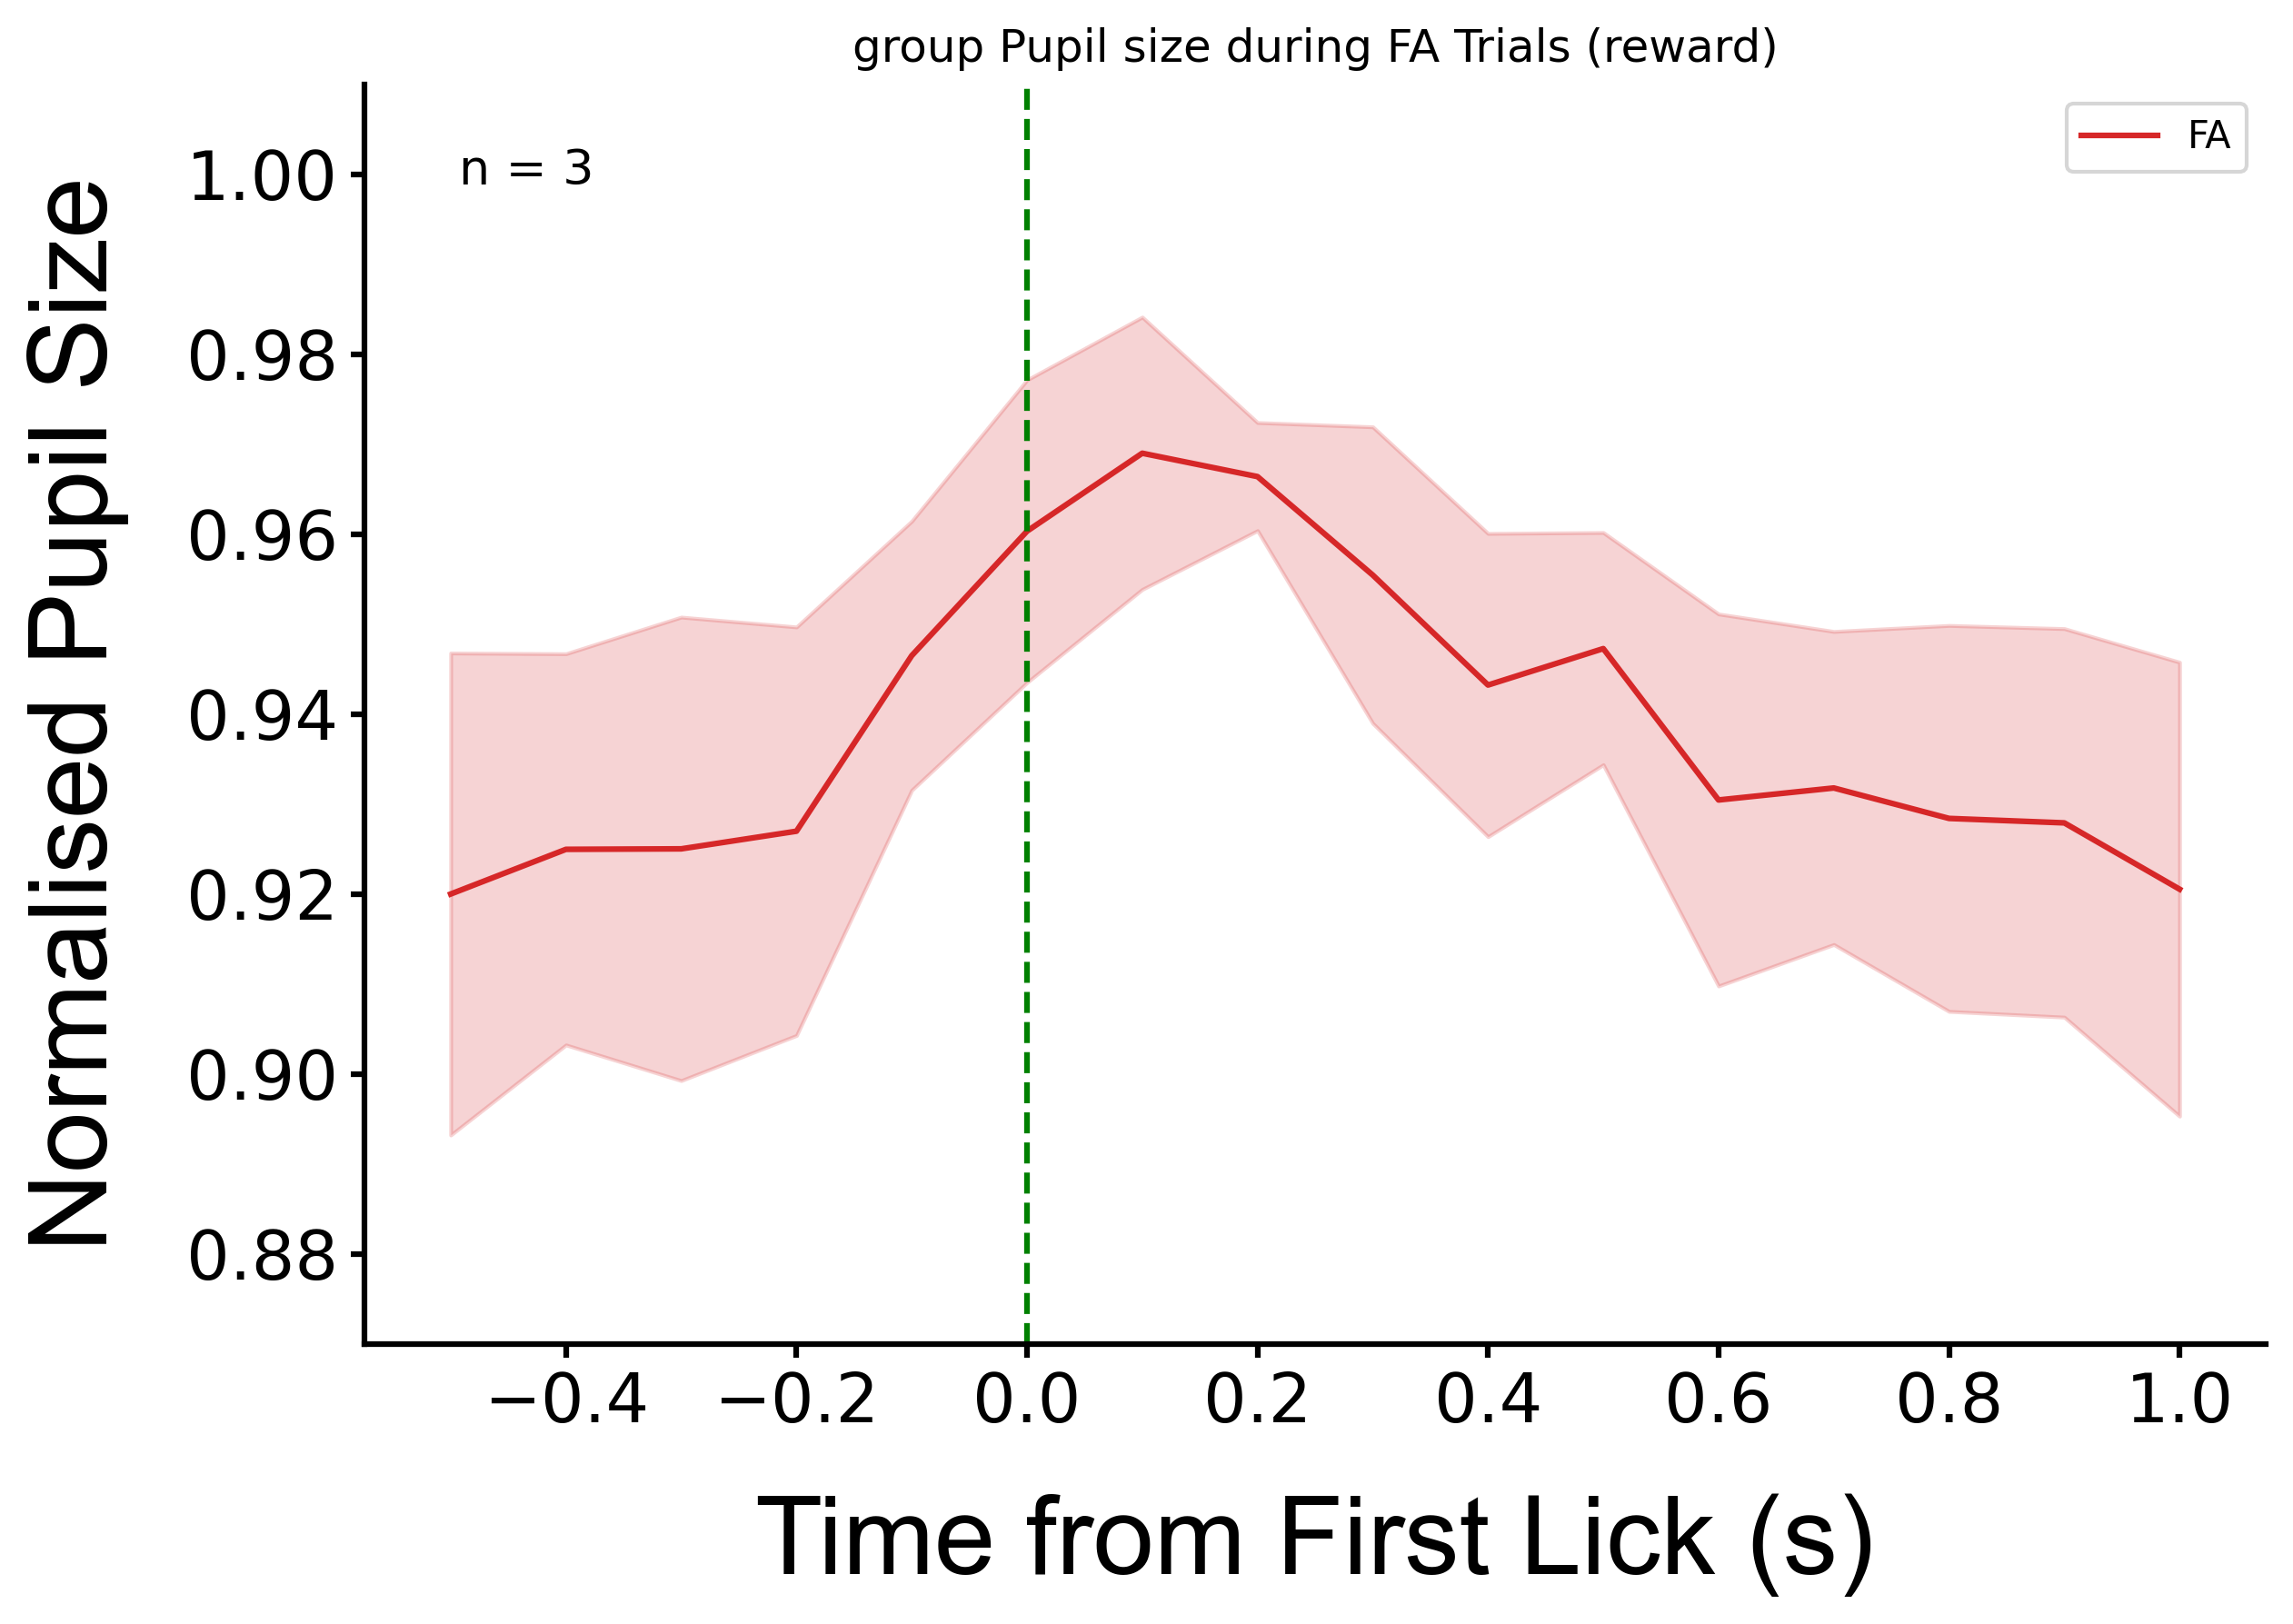

In [49]:
calvin_fa_reward = [0.95715207, 0.95562584, 0.96127415, 0.95885813, 0.96764874, 0.97481,
 0.98189012, 0.97204049, 0.97314747, 0.96369664, 0.96455013, 0.95969152,
 0.95632268, 0.9584068,  0.95803803, 0.95534731]

chase_fa_reward =  [0.90788946, 0.90754399, 0.91005391, 0.90767339, 0.93570514, 0.96943484,
 0.97735822 ,0.96909387, 0.95975352,0.9435923 , 0.93352794, 0.91525388,
 0.91784984, 0.91731278, 0.91719401, 0.90995939]


cole_fa_reward = [0.89498082, 0.91175512, 0.90375798, 0.91443827, 0.93615425, 0.9367552,
 0.94775661, 0.95808166, 0.93347865, 0.92241917, 0.94377305, 0.91643657,
 0.92120984, 0.90951118, 0.90851399, 0.89632904]


time_stamp = [-5.00000000e-01, -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
 -1.00000000e-01, -1.11022302e-16,  1.00000000e-01,  2.00000000e-01,
  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,  6.00000000e-01,
  7.00000000e-01,  8.00000000e-01 , 9.00000000e-01,  1.00000000e+00]

group_fa_reward = [cole_fa_reward, chase_fa_reward, calvin_fa_reward]


# Convert to numpy arrays for easier calculations
group_fa_reward = np.array(group_fa_reward)

# Calculate mean and standard deviation
mean_fa_reward = np.mean(group_fa_reward, axis=0)
std_fa_reward = np.std(group_fa_reward, axis=0)

print("Mean of group hit reward:", mean_fa_reward)
print("Std of group hit reward:", std_fa_reward)

fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot hit data
ax.plot(time_stamp, mean_fa_reward, label='FA', color='#d62728')
ax.fill_between(time_stamp, mean_fa_reward - std_fa_reward, mean_fa_reward + std_fa_reward, color='#d62728', alpha=0.2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
ax.set_ylim(0.87,1.01)

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

ax.axvline(x=0, color='green', linestyle='--') # reward
ax.set_title(f'group Pupil size during FA Trials (reward)')
ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

ax.legend()

## Hit vs FA (aligned with reward)

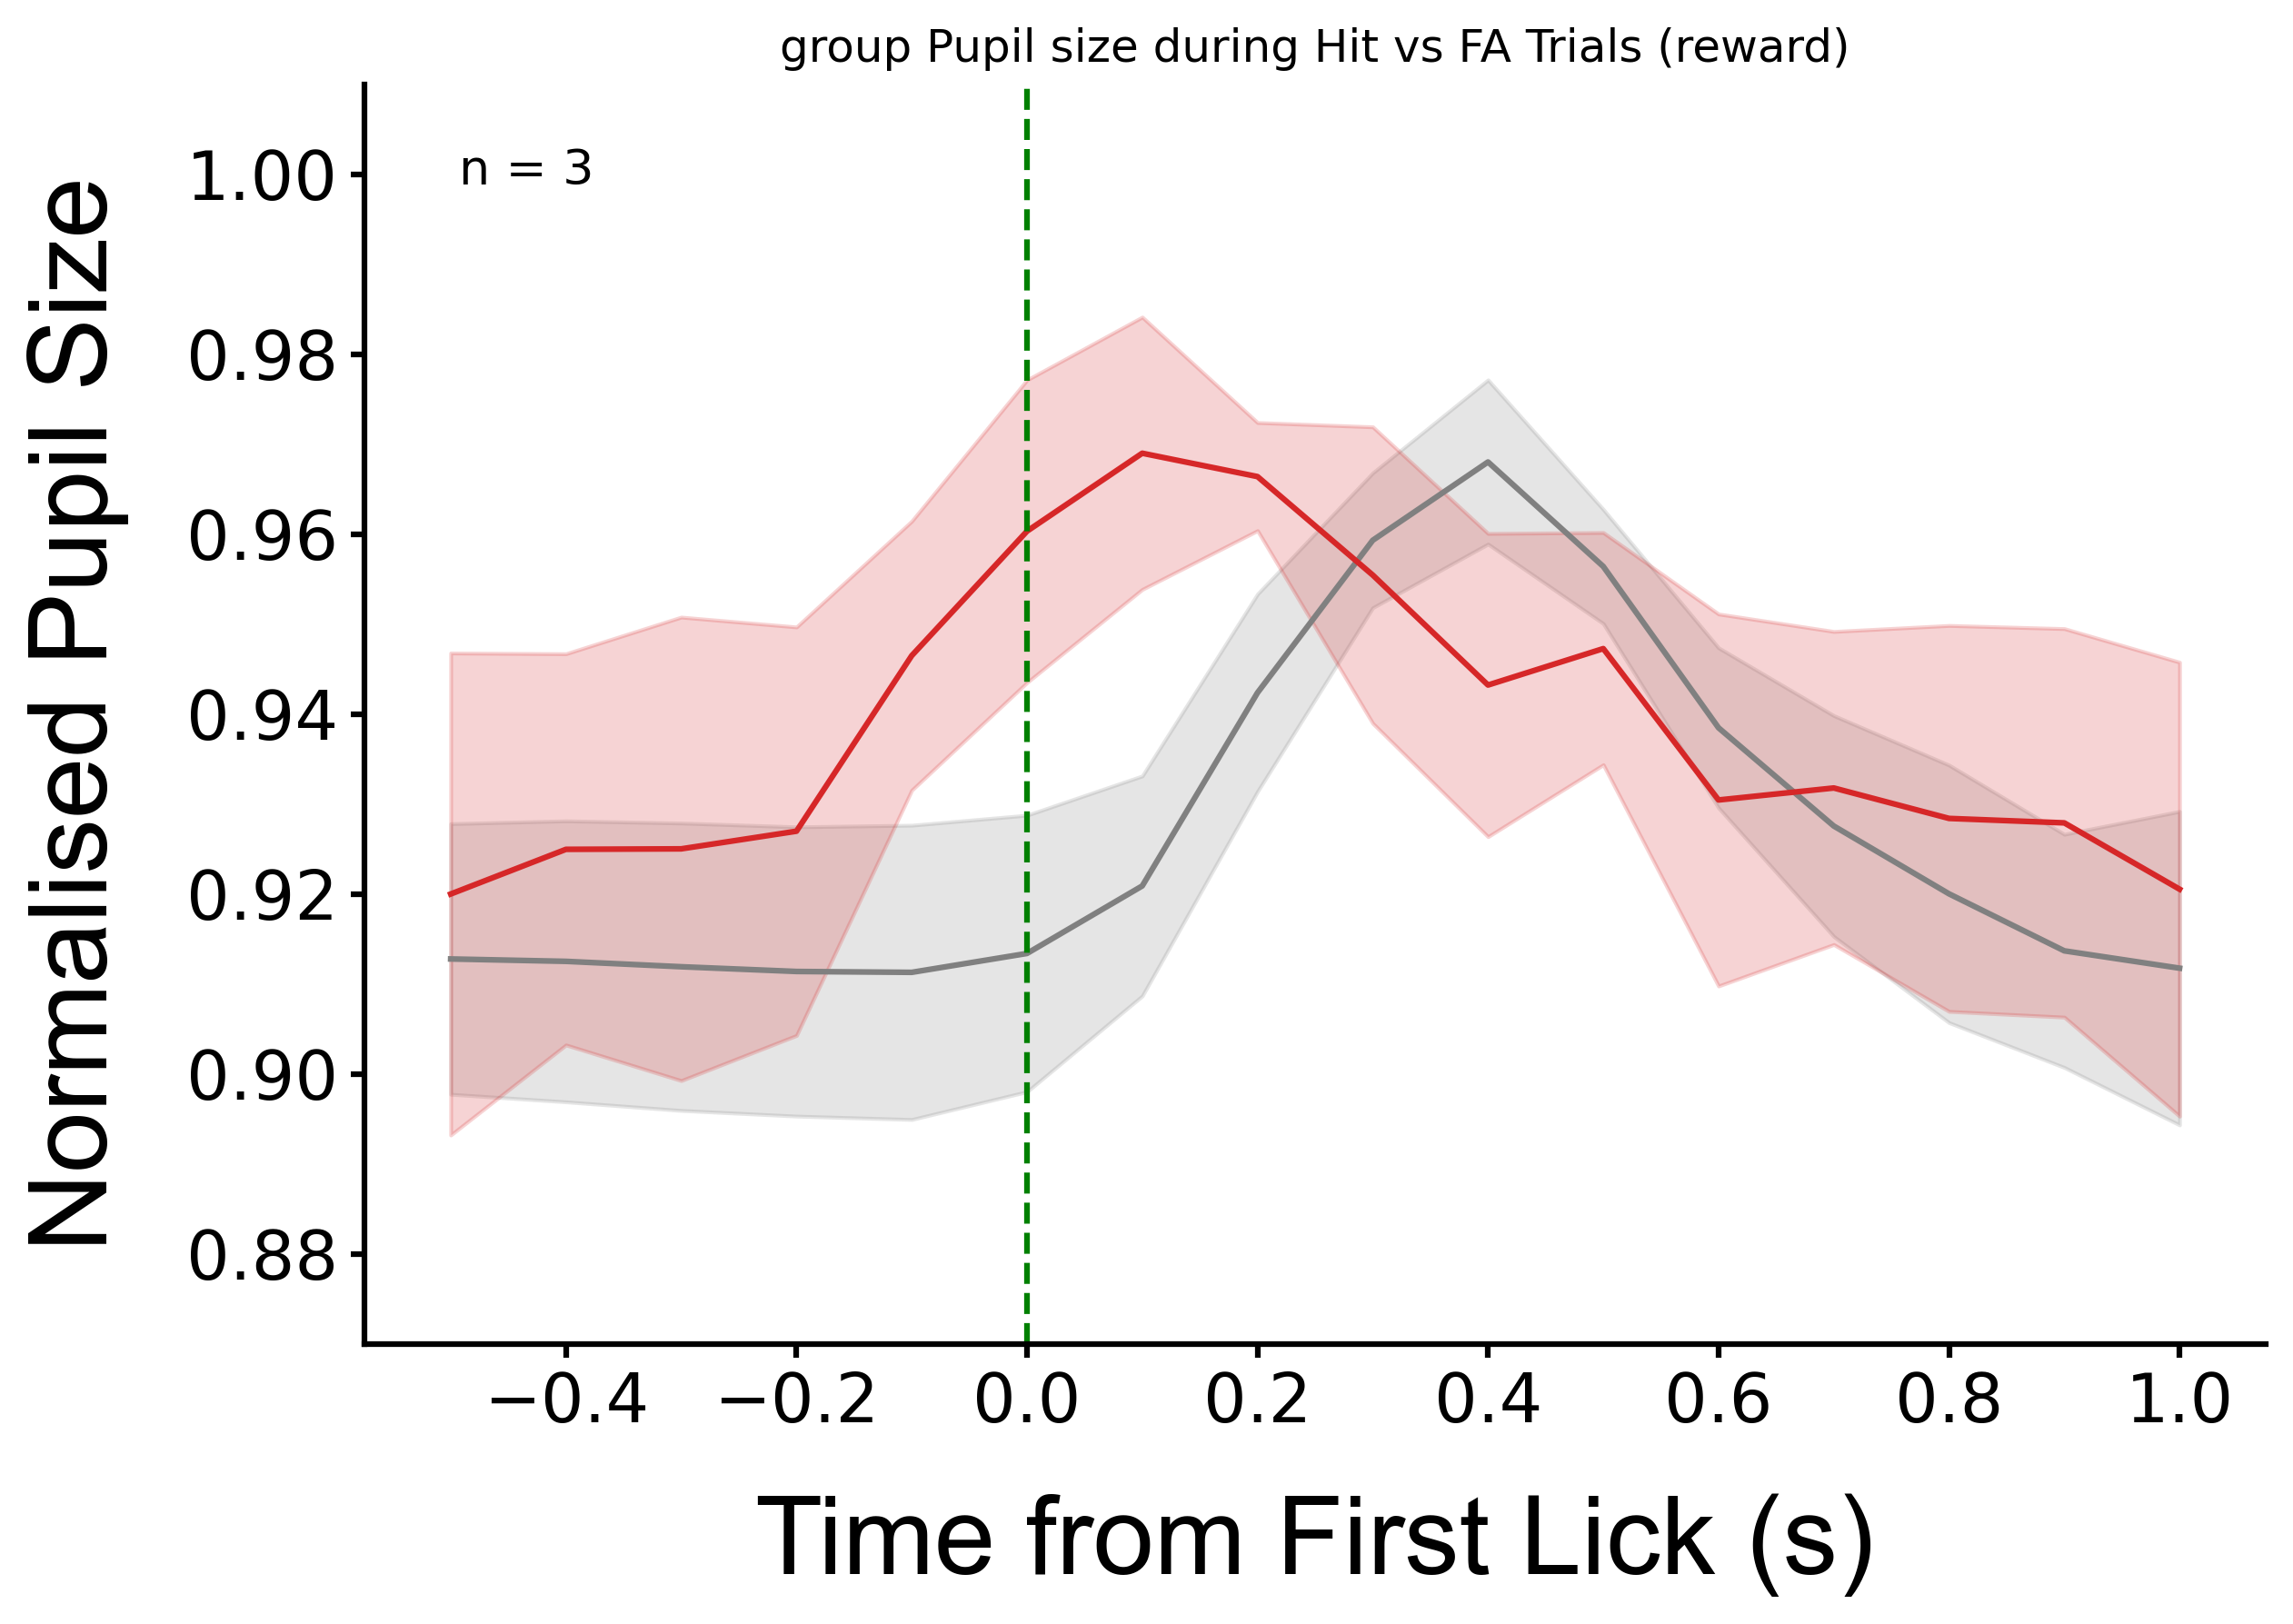

In [50]:
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot hit reward data
ax.plot(time_stamp, mean_hit_reward, label='Hit', color='grey')
ax.fill_between(time_stamp, mean_hit_reward - std_hit_reward, mean_hit_reward + std_hit_reward, color='grey', alpha=0.2)

# Plot fa reward data
ax.plot(time_stamp, mean_fa_reward, label='FA', color='#d62728')
ax.fill_between(time_stamp, mean_fa_reward - std_fa_reward, mean_fa_reward + std_fa_reward, color='#d62728', alpha=0.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
ax.set_ylim(0.87,1.01)

ax.text(0.05, 0.95, f'n = 3', fontsize=13, ha='left', va='top', transform=ax.transAxes)

ax.axvline(x=0, color='green', linestyle='--') # reward
ax.set_title(f'group Pupil size during Hit vs FA Trials (reward)')
ax.set_ylabel('Normalised Pupil Size', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

# ax.legend()

In [52]:
from scipy.stats import wilcoxon


# Perform the Wilcoxon signed-rank test on the normalized data
stat, p_value = wilcoxon(mean_hit_reward, mean_fa_reward)

# Output the test result
print(f'Wilcoxon signed-rank test statistic: {stat}, p-value: {p_value}')

Wilcoxon signed-rank test statistic: 25.0, p-value: 0.02496337890625


In [ ]:
# FA aligned with reward vs random lick example

time_before_change = 0.5 #how much time to plot before the reward
duration = 1.75

delay_duration = 0.25

bin_size = 0.1
time_bins = np.arange(0 - time_before_change, 1.1, bin_size)


individul_pupil_fa_reward = []

# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)


# Pupil
# Directory where CSV files are located
for day, date, axi in zip(days, dates, axis):
    # Directory where CSV files are located
    directory = f'/Users/zhangpan/MasterProject/{name}/New_Pupil'
    filename_pupil = f'New_Pupil_Data_{date}_Day{day}_{name}.csv'
    file_path = os.path.join(directory, filename_pupil)
    
    # Read CSV file
    df_pupil = pd.read_csv(file_path)
    df_pupil['x'] = df_pupil['x']/100
    df_pupil['y'] = df_pupil['y']/100
    # Store DataFrame in the dictionary with the day as the key
    dfs[day] = df_pupil

    if name == 'Cole': 
        if day == 9:
            df_pupil = df_pupil[df_pupil['x'] >= 1.3]

        elif day == 10:
            ranges = [(1053.1, 1053.4)]

            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        elif day == 12:
            ranges = [
                        (79.7,79.9),
                        (410.89, 411.1),
                        (338.4, 338.5),
                        (1029.2, 1029.6),
                        (1487.5, 1487.9)
                    ]
            # Replace pupil diameter with NaN for the specified timestamp ranges
            for start, end in ranges:
                mask = (df_pupil['timestamp'] >= start) & (df_pupil['timestamp'] <= end)
                df_pupil.loc[mask, 'x'] = np.nan
                df_pupil.loc[mask, 'y'] = np.nan

            df_pupil = df_pupil.dropna(subset=['x'])

        else:
            df_pupil = df_pupil

    # Read Trial Vstim Presentation 
    file_path = '/Users/zhangpan/Desktop/New_trial_table_Day9_01052024_Cole_FA_lick.csv'
    df = pd.read_csv(file_path)
    day = int(day)


    # Find trial "start time" in each hit trial (including time before and after)
    fa_df = df[df['false_alarm'] == 1].reset_index(drop=True)
    fa_df['reward_start_time'] = fa_df['Lick_from_ITI']
    start_times = fa_df['reward_start_time'] - time_before_change

    end_times = start_times + duration
    df_start_end = pd.DataFrame()
    df_start_end['start_time'] = start_times
    df_start_end['end_time'] = end_times
    df_start_end = df_start_end.iloc[:]


    # Align pupil to trial time
    # Initialize a list to store interpolated data for each trial
    interpolated_pupil_data = []

    for index, row in df_start_end.iterrows():
        mask = (df_pupil['timestamp'] >= row['start_time']) & (df_pupil['timestamp'] <= row['end_time'])
        filtered_rows = df_pupil.loc[mask].copy()
        filtered_rows['timestamp_diff'] = filtered_rows['timestamp'] - row['start_time']
        filtered_rows['Time from Change'] = filtered_rows['timestamp_diff'] - time_before_change

        if not filtered_rows['y'].empty:  # Check if 'y' values are not empty
            # Interpolate pupil area data for the current trial
            interpolated_values = np.interp(time_bins, filtered_rows['Time from Change'], filtered_rows[axi])
            
            # Apply normalization

            max_val = np.max(interpolated_values)
            normalized_values = interpolated_values /max_val

            interpolated_pupil_data.append(normalized_values)

    # Mean pupil data on single day
    interpolated_data = np.mean(interpolated_pupil_data, axis=0)

    ax.plot(time_bins, interpolated_data)

    # Store mean pupil data in each day
    individul_pupil_fa_reward.append(interpolated_data)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='green', linestyle='--') # Vstim onset with reward
ax.set_title(f'Pupil size during FA Trials {name} ')
ax.set_ylabel('Normalised Pupil diameter', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)




# plot mean
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9,6)

# Plot the mean of interpolated_data over time bins
mean_interpolated_data_hit = np.mean(individul_pupil_fa_reward, axis=0)

ax.plot(time_bins, mean_interpolated_data_hit, color='#d62728', label='Mean') 

# Calculate standard deviation of interpolated_data over time bins
std_interpolated_data_hit = np.std(individul_pupil_hit_reward, axis=0)

print(f'FA align with first lick {name}')
print(time_bins)
print(f'mean_pupil size is {mean_interpolated_data_hit}')
print(f'std_pupil size is {std_interpolated_data_hit}')

# Shade between the error bars
# ax.fill_between(time_bins, mean_interpolated_data_hit - std_interpolated_data_hit, mean_interpolated_data_hit + std_interpolated_data_hit, color='#1f77b4', alpha=0.2) # Blue hit
ax.fill_between(time_bins, mean_interpolated_data_hit - std_interpolated_data_hit, mean_interpolated_data_hit + std_interpolated_data_hit, color='#d62728', alpha=0.2) # Red FA


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)

# ax.set_ylim(2,2.6)
# ax.set_ylim(1,1.6)

ax.axvline(x=0, color='green', linestyle='--') # Vstim onset with delay
ax.set_title(f'Pupil size during FA Trials {name} ')
ax.set_ylabel('Normalised Pupil diameter', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_xlabel('Time from First Lick (s)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

